## OSRM (Open Source Routing Machine)

**Author**: SADDIK Imad
<br/>
**Date**: 26/12/2024

---

**Table of contents**<a id='toc0_'></a>    
- [Route service](#toc1_)    
  - [Setup](#toc1_1_)    
  - [Using the service](#toc1_2_)    
    - [General options](#toc1_2_1_)    
    - [Making the request](#toc1_2_2_)    
    - [Plotting the path](#toc1_2_3_)    
    - [Exploring legs](#toc1_2_4_)    
    - [Exploring the intersections](#toc1_2_5_)    
    - [Exploring the cost of the route](#toc1_2_6_)    
    - [Alternative routes](#toc1_2_7_)    

---

# <a id='toc1_'></a>[Route service](#toc0_)

Use this service if you want to find the fastest route between coordinates. Read more about it [here](https://project-osrm.org/docs/v5.24.0/api/?language=cURL#route-service).

## <a id='toc1_1_'></a>[Setup](#toc0_)

I selected four points from the map, designating one as the center. Using the `Folium` package, I will visualize these points on the map.

In [5]:
import folium
from folium import Map
from pydantic import BaseModel


class Point(BaseModel):
    latitude: float
    longitude: float


def get_folium_map(center_point: Point, points: list[Point], zoom_level: int = 14) -> Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude], zoom_start=zoom_level)

    for point in points:
        folium.Marker(location=[point.latitude, point.longitude],
                      popup='Point').add_to(folium_map)

    return folium_map


# نقاط داخل القاهرة
point_1 = Point(latitude=30.0444, longitude=31.2357)  # وسط البلد
point_2 = Point(latitude=30.0308, longitude=31.2109)  # الدقي
point_3 = Point(latitude=30.0186, longitude=31.4999)  # القاهرة الجديدة
center_point = Point(latitude=30.0459, longitude=31.2243)  # مركز الخريطة - القاهرة

# إنشاء الخريطة
folium_map = get_folium_map(center_point, [point_1, point_2, point_3])
folium_map


## <a id='toc1_2_'></a>[Using the service](#toc0_)

### <a id='toc1_2_1_'></a>[General options](#toc0_)

The general options are used in every OSRM service, read more about them [here](https://project-osrm.org/docs/v5.5.1/api/?language=cURL#general-options). Here is a table that summarizes the options with their description.


| Parameter | Description |
|-----------|-------------|
| service | One of the following values: `route`, `nearest`, `table`, `match`, `trip`, `tile` |
| version | Version of the protocol implemented by the service. `v1` for all OSRM 5.x installations |
| profile | Mode of transportation, is determined statically by the Lua profile that is used to prepare the data using `osrm-extract`. Typically `car`, `bike` or `foot` if using one of the supplied profiles. |
| coordinates | String of format `{longitude},{latitude};{longitude},{latitude};{longitude},{latitude} ...]` or `polyline({polyline})`. |
| format | Only `json` is supported at the moment. This parameter is optional and defaults to `json`. |

### <a id='toc1_2_2_'></a>[Making the request](#toc0_)

In [ ]:
service = 'route'
version = 'v1'
profile = 'driving'
host = 'http://localhost:5000'

The route endpoint follows this format: `/route/v1/{profile}/{coordinates}?alternatives={true|false}&steps={true|false}&geometries={polyline|polyline6|geojson}&overview={full|simplified|false}&annotations={true|false}`.

To request the shortest path between three points, the order of the points is crucial. If you want the route from point 1 to point 2 to point 3, make sure to list them in that sequence.

In [6]:
import requests

# تحديد الإحداثيات داخل مصر
coordinates_full = "31.2001,29.9187;30.0444,31.2357;25.6872,32.6396"  # الإسكندرية - القاهرة - الأقصر
coordinates_cairo_alex = "30.0444,31.2357;31.2001,29.9187"  # القاهرة - الإسكندرية
coordinates_luxor_aswan = "25.6872,32.6396;24.0889,32.8998"  # الأقصر - أسوان

# إعدادات OSRM
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# اختبار المسار الكامل
url = f"{host}/{service}/{version}/{profile}/{coordinates_full}?overview=full&steps=true&geometries=geojson"
print(f"Requesting full route URL: {url}")
response = requests.get(url)
print(f"Status code (full route): {response.status_code}")
if response.status_code == 200:
    print("Success! Full route found:")
    print(response.json())
else:
    print(f"Error (full route): {response.text}")

# اختبار مسار القاهرة - الإسكندرية
url = f"{host}/{service}/{version}/{profile}/{coordinates_cairo_alex}?overview=full&steps=true&geometries=geojson"
print(f"\nRequesting Cairo-Alexandria URL: {url}")
response = requests.get(url)
print(f"Status code (Cairo-Alexandria): {response.status_code}")
if response.status_code == 200:
    print("Success! Cairo-Alexandria route found:")
    print(response.json())
else:
    print(f"Error (Cairo-Alexandria): {response.text}")

# اختبار مسار الأقصر - أسوان
url = f"{host}/{service}/{version}/{profile}/{coordinates_luxor_aswan}?overview=full&steps=true&geometries=geojson"
print(f"\nRequesting Luxor-Aswan URL: {url}")
response = requests.get(url)
print(f"Status code (Luxor-Aswan): {response.status_code}")
if response.status_code == 200:
    print("Success! Luxor-Aswan route found:")
    print(response.json())
else:
    print(f"Error (Luxor-Aswan): {response.text}")

# اختبار API الخاصة بالجداول لحساب المسافات والوقت
table_url = f"{host}/table/v1/driving/{coordinates_full}"
print(f"\nRequesting Table API URL: {table_url}")
table_response = requests.get(table_url)
print(f"Table API status code: {table_response.status_code}")
if table_response.status_code == 200:
    print("Table API response:")
    print(table_response.json())
else:
    print(f"Table API error: {table_response.text}")


Requesting full route URL: http://localhost:5000/route/v1/driving/31.2001,29.9187;30.0444,31.2357;25.6872,32.6396?overview=full&steps=true&geometries=geojson
Status code (full route): 200
Success! Full route found:
{'code': 'Ok', 'routes': [{'geometry': {'coordinates': [[31.199705, 29.919509], [31.199398, 29.919396], [31.198777, 29.919157], [31.19864, 29.919307], [31.198303, 29.919645], [31.198098, 29.919856], [31.197837, 29.920125], [31.197733, 29.920241], [31.197712, 29.920257], [31.197682, 29.920264], [31.197651, 29.920264], [31.197541, 29.920234], [31.197149, 29.92013], [31.19672, 29.920011], [31.196463, 29.919938], [31.196293, 29.919879], [31.195932, 29.920327], [31.195825, 29.92045], [31.195753, 29.920524], [31.195683, 29.920584], [31.195613, 29.920624], [31.195557, 29.920648], [31.195482, 29.920671], [31.195413, 29.920685], [31.195341, 29.920691], [31.19528, 29.920689], [31.195236, 29.920682], [31.195185, 29.920675], [31.195129, 29.920662], [31.194293, 29.920477], [31.194187, 29

In [8]:
import requests
import folium
from folium.plugins import PolyLineOffset
import polyline

# تحديد الإحداثيات داخل مصر
coordinates_full = "31.2001,29.9187;30.0444,31.2357;25.6872,32.6396"  # الإسكندرية - القاهرة - الأقصر
coordinates_cairo_alex = "30.0444,31.2357;31.2001,29.9187"  # القاهرة - الإسكندرية
coordinates_luxor_aswan = "25.6872,32.6396;24.0889,32.8998"  # الأقصر - أسوان

# إعدادات OSRM
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# دالة لجلب بيانات المسار وعرضه على الخريطة
def get_route_and_display(coordinates, map_center, route_name):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=polyline"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        route_geometry = data["routes"][0]["geometry"]  # استخراج المسار المشفر
        decoded_route = polyline.decode(route_geometry)  # فك تشفير المسار
        
        # إنشاء خريطة مركزها المدينة الأولى في المسار
        folium_map = folium.Map(location=map_center, zoom_start=6)
        
        # إضافة المسار إلى الخريطة
        PolyLineOffset(decoded_route, color="blue", weight=5, opacity=0.7).add_to(folium_map)
        
        # إضافة نقاط المدن
        for coord in coordinates.split(";"):
            lat, lon = map(float, coord.split(","))
            folium.Marker(location=[lat, lon], popup=f"Point ({lat}, {lon})").add_to(folium_map)
        
        print(f"✅ Success! {route_name} route found.")
        return folium_map
    else:
        print(f"❌ Error ({route_name}): {response.text}")
        return None

# عرض مسار الإسكندرية - القاهرة - الأقصر
map_full = get_route_and_display(coordinates_full, [30.0444, 31.2357], "Alex-Cairo-Luxor")
map_full.save("full_route.html")

# عرض مسار القاهرة - الإسكندرية
map_cairo_alex = get_route_and_display(coordinates_cairo_alex, [30.0444, 31.2357], "Cairo-Alexandria")
map_cairo_alex.save("cairo_alex_route.html")

# عرض مسار الأقصر - أسوان
map_luxor_aswan = get_route_and_display(coordinates_luxor_aswan, [25.6872, 32.6396], "Luxor-Aswan")
map_luxor_aswan.save("luxor_aswan_route.html")

print("\n✅ جميع المسارات تم استخراجها وحفظها في ملفات HTML! افتحها لعرض الخريطة التفاعلية.")


✅ Success! Alex-Cairo-Luxor route found.
✅ Success! Cairo-Alexandria route found.
✅ Success! Luxor-Aswan route found.

✅ جميع المسارات تم استخراجها وحفظها في ملفات HTML! افتحها لعرض الخريطة التفاعلية.


In [10]:
import folium
import requests
import polyline
from IPython.display import display

# إعدادات OSRM
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# تحديد الإحداثيات داخل مصر
routes_data = {
    "Alexandria-Cairo": "31.2001,29.9187;30.0444,31.2357",
    "Cairo-Luxor": "30.0444,31.2357;25.6872,32.6396",
    "Luxor-Aswan": "25.6872,32.6396;24.0889,32.8998",
    "Alexandria-Luxor": "31.2001,29.9187;25.6872,32.6396"
}

# إعداد خريطة في نقطة القاهرة كمرجع
egypt_map = folium.Map(location=[30.0444, 31.2357], zoom_start=6)

# ألوان مختلفة لكل مسار
colors = ["blue", "red", "green", "purple"]

best_route = None
best_distance = float("inf")

# استدعاء OSRM لكل مسار وإضافته إلى الخريطة
for i, (route_name, coordinates) in enumerate(routes_data.items()):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=polyline"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        route_geometry = data["routes"][0]["geometry"]  # المسار المشفر
        decoded_route = polyline.decode(route_geometry)  # فك تشفير المسار
        distance = data["routes"][0]["distance"] / 1000  # المسافة بالكيلومترات
        duration = data["routes"][0]["duration"] / 60  # الزمن بالدقائق

        # تحديد أفضل مسار (الأقصر مسافة)
        if distance < best_distance:
            best_distance = distance
            best_route = route_name

        # إضافة المسار للخريطة
        folium.PolyLine(decoded_route, color=colors[i], weight=5, opacity=0.7, popup=f"{route_name}: {distance:.1f} km, {duration:.1f} min").add_to(egypt_map)

        # طباعة معلومات المسار
        print(f"{route_name}: {distance:.1f} km, {duration:.1f} min")
    else:
        print(f"Error fetching route {route_name}: {response.text}")

# إضافة نقاط المدن على الخريطة
cities = {
    "Alexandria": [31.2001, 29.9187],
    "Cairo": [30.0444, 31.2357],
    "Luxor": [25.6872, 32.6396],
    "Aswan": [24.0889, 32.8998]
}

for city, location in cities.items():
    folium.Marker(location=location, popup=city, icon=folium.Icon(color="black")).add_to(egypt_map)

# طباعة أفضل مسار
print(f"\n🚀 Best route: {best_route} with distance: {best_distance:.1f} km")

# عرض الخريطة في Jupyter Notebook
display(egypt_map)


Alexandria-Cairo: 239.1 km, 170.0 min
Cairo-Luxor: 439.8 km, 346.9 min
Luxor-Aswan: 106.8 km, 108.9 min
Alexandria-Luxor: 609.4 km, 433.6 min

🚀 Best route: Luxor-Aswan with distance: 106.8 km


In [11]:
import folium
import requests
import polyline
from IPython.display import display

# 🏠 إعدادات OSRM
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# 🚗 تحديد المسارات بين محطة قطار القاهرة ومدينة نصر فقط
routes_data = {
    "Route 1 (Direct)": "30.0626,31.2486;30.0561,31.3446",  # محطة القاهرة - مدينة نصر مباشرة
    "Route 2 (via Ramses)": "30.0626,31.2486;30.0688,31.2458;30.0561,31.3446",  # عبر رمسيس
    "Route 3 (via Heliopolis)": "30.0626,31.2486;30.0935,31.3170;30.0561,31.3446",  # عبر مصر الجديدة
    "Route 4 (via Abbasiya)": "30.0626,31.2486;30.0680,31.2700;30.0561,31.3446"  # عبر العباسية
}

# 🗺️ إنشاء خريطة تتمركز بين محطة القاهرة ومدينة نصر
egypt_map = folium.Map(location=[30.0593, 31.2966], zoom_start=13)

# 🎨 ألوان مختلفة لكل مسار
colors = ["blue", "red", "green", "purple"]

# 🔍 تحديد أفضل مسار
best_route = None
best_distance = float("inf")
best_geometry = None

# ⏳ استدعاء OSRM لكل مسار وإضافته إلى الخريطة
for i, (route_name, coordinates) in enumerate(routes_data.items()):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=polyline"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        route_geometry = data["routes"][0]["geometry"]  # المسار المشفر
        decoded_route = polyline.decode(route_geometry)  # فك تشفير المسار
        distance = data["routes"][0]["distance"] / 1000  # المسافة بالكيلومترات
        duration = data["routes"][0]["duration"] / 60  # الزمن بالدقائق

        # 📍 تحديد أفضل مسار (الأقصر مسافة)
        if distance < best_distance:
            best_distance = distance
            best_route = route_name
            best_geometry = decoded_route

        # ➕ إضافة المسار للخريطة
        folium.PolyLine(
            decoded_route, color=colors[i], weight=5, opacity=0.7,
            popup=f"{route_name}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(egypt_map)

        # 📌 طباعة تفاصيل المسار
        print(f"{route_name}: {distance:.1f} km, {duration:.1f} min")
    else:
        print(f"❌ Error fetching route {route_name}: {response.text}")

# 🌟 تمييز أفضل مسار بخط أسود سميك
if best_geometry:
    folium.PolyLine(
        best_geometry, color="black", weight=8, opacity=0.9,
        popup=f"Best Route: {best_route} - {best_distance:.1f} km"
    ).add_to(egypt_map)

# 🏙️ إضافة مواقع النقاط الرئيسية على الخريطة
locations = {
    "Cairo Train Station": [30.0626, 31.2486],
    "Nasr City": [30.0561, 31.3446],
    "Ramses Square": [30.0688, 31.2458],
    "Heliopolis": [30.0935, 31.3170],
    "Abbasiya": [30.0680, 31.2700]
}

for place, location in locations.items():
    folium.Marker(location=location, popup=place, icon=folium.Icon(color="black")).add_to(egypt_map)

# 🏷️ إضافة اسم الشركة "Trans IT" في الأسفل
folium.map.CustomPane("Trans IT", z_index=0).add_to(egypt_map)
egypt_map.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* إخفاء تعليق Leaflet الافتراضي */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* إضافة اسم الشركة */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# 🚀 طباعة أفضل مسار
print(f"\n🏆 Best route: {best_route} with distance: {best_distance:.1f} km")

# 📌 عرض الخريطة في Jupyter Notebook
display(egypt_map)

Route 1 (Direct): 10.9 km, 19.3 min
Route 2 (via Ramses): 19.4 km, 26.0 min
Route 3 (via Heliopolis): 14.6 km, 35.2 min
Route 4 (via Abbasiya): 14.8 km, 25.2 min

🏆 Best route: Route 1 (Direct) with distance: 10.9 km


In [12]:
import folium
import requests
import polyline
from IPython.display import display

# 🏠 OSRM Settings
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# 🚗 Routes between Cairo Train Station and Nasr City
routes_data = {
    "Route 1 (Direct)": "30.0626,31.2486;30.0561,31.3446",           # Direct route
    "Route 2 (via Ramses)": "30.0626,31.2486;30.0688,31.2458;30.0561,31.3446",  # Via Ramses Square
    "Route 3 (via Heliopolis)": "30.0626,31.2486;30.0935,31.3170;30.0561,31.3446",  # Via Heliopolis
    "Route 4 (via Abbasiya)": "30.0626,31.2486;30.0680,31.2700;30.0561,31.3446"     # Via Abbasiya
}

# 🗺️ Create map centered between Cairo Train Station and Nasr City
egypt_map = folium.Map(location=[30.0593, 31.2966], zoom_start=13, tiles="OpenStreetMap")

# 🎨 Colors for each route
colors = ["blue", "red", "green", "purple"]

# 🔍 Variables to track the best route
best_route = None
best_distance = float("inf")
best_geometry = None

# ⏳ Fetch and plot each route from OSRM
for i, (route_name, coordinates) in enumerate(routes_data.items()):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=polyline"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an exception for bad status codes

        data = response.json()
        route_geometry = data["routes"][0]["geometry"]
        decoded_route = polyline.decode(route_geometry)
        distance = data["routes"][0]["distance"] / 1000  # Convert to kilometers
        duration = data["routes"][0]["duration"] / 60    # Convert to minutes

        # 📍 Identify the best route (shortest distance)
        if distance < best_distance:
            best_distance = distance
            best_route = route_name
            best_geometry = decoded_route

        # ➕ Add route to the map
        folium.PolyLine(
            locations=decoded_route,
            color=colors[i],
            weight=5,
            opacity=0.7,
            popup=f"{route_name}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(egypt_map)

        print(f"{route_name}: {distance:.1f} km, {duration:.1f} min")
    except requests.RequestException as e:
        print(f"❌ Error fetching route {route_name}: {str(e)}")

# 🌟 Highlight the best route with a thick black line
if best_geometry:
    folium.PolyLine(
        locations=best_geometry,
        color="black",
        weight=8,
        opacity=0.9,
        popup=f"Best Route: {best_route} - {best_distance:.1f} km"
    ).add_to(egypt_map)

# 🏙️ Add markers for key locations
locations = {
    "Cairo Train Station": [30.0626, 31.2486],
    "Nasr City": [30.0561, 31.3446],
    "Ramses Square": [30.0688, 31.2458],
    "Heliopolis": [30.0935, 31.3170],
    "Abbasiya": [30.0680, 31.2700]
}

for place, location in locations.items():
    folium.Marker(
        location=location,
        popup=place,
        icon=folium.Icon(color="black", icon="info-sign")
    ).add_to(egypt_map)

# 🏷️ Add "Trans IT" branding instead of Leaflet attribution
egypt_map.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* Hide default Leaflet attribution */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# 🚀 Print the best route
if best_route:
    print(f"\n🏆 Best route: {best_route} with distance: {best_distance:.1f} km")
else:
    print("\n⚠️ No valid routes found.")

# 📌 Display the map in Jupyter Notebook
display(egypt_map)

Route 1 (Direct): 10.9 km, 19.3 min
Route 2 (via Ramses): 19.4 km, 26.0 min
Route 3 (via Heliopolis): 14.6 km, 35.2 min
Route 4 (via Abbasiya): 14.8 km, 25.2 min

🏆 Best route: Route 1 (Direct) with distance: 10.9 km


In [13]:
import folium
import requests
import polyline
from IPython.display import display

# 🏠 OSRM Settings
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# 🚗 Define routes from Rabaa Square to Ramses Square
routes_data = {
    "Route 1 (Direct)": "30.0588,31.3216;30.0688,31.2458",                     # Direct route
    "Route 2 (via Nasr City)": "30.0588,31.3216;30.0561,31.3446;30.0688,31.2458",  # Via Nasr City
    "Route 3 (via Heliopolis)": "30.0588,31.3216;30.0935,31.3170;30.0688,31.2458", # Via Heliopolis
    "Route 4 (via Abbasiya)": "30.0588,31.3216;30.0680,31.2700;30.0688,31.2458"    # Via Abbasiya
}

# 🗺️ Create map centered between Rabaa Square and Ramses Square
midpoint = [(30.0588 + 30.0688) / 2, (31.3216 + 31.2458) / 2]  # Average of start and end
egypt_map = folium.Map(location=midpoint, zoom_start=13, tiles="OpenStreetMap")

# 🎨 Colors for each route
colors = ["blue", "red", "green", "purple"]

# 🔍 Track the best route
best_route = None
best_distance = float("inf")
best_geometry = None

# ⏳ Fetch and plot routes from OSRM
for i, (route_name, coordinates) in enumerate(routes_data.items()):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=polyline"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        data = response.json()
        route_geometry = data["routes"][0]["geometry"]
        decoded_route = polyline.decode(route_geometry)
        distance = data["routes"][0]["distance"] / 1000  # Convert to kilometers
        duration = data["routes"][0]["duration"] / 60    # Convert to minutes

        # 📍 Identify the best route (shortest distance)
        if distance < best_distance:
            best_distance = distance
            best_route = route_name
            best_geometry = decoded_route

        # ➕ Add route to the map
        folium.PolyLine(
            locations=decoded_route,
            color=colors[i],
            weight=5,
            opacity=0.7,
            popup=f"{route_name}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(egypt_map)

        print(f"{route_name}: {distance:.1f} km, {duration:.1f} min")
    except requests.RequestException as e:
        print(f"❌ Error fetching route {route_name}: {str(e)}")

# 🌟 Highlight the best route with a thick black line
if best_geometry:
    folium.PolyLine(
        locations=best_geometry,
        color="black",
        weight=8,
        opacity=0.9,
        popup=f"Best Route: {best_route} - {best_distance:.1f} km"
    ).add_to(egypt_map)

# 🏙️ Add markers for key locations
locations = {
    "Rabaa Square": [30.0588, 31.3216],
    "Ramses Square": [30.0688, 31.2458],
    "Nasr City": [30.0561, 31.3446],
    "Heliopolis": [30.0935, 31.3170],
    "Abbasiya": [30.0680, 31.2700]
}

for place, location in locations.items():
    folium.Marker(
        location=location,
        popup=place,
        icon=folium.Icon(color="black", icon="info-sign")
    ).add_to(egypt_map)

# 🏷️ Add "Trans IT" branding
egypt_map.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* Hide default Leaflet attribution */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# 🚀 Print the best route
if best_route:
    print(f"\n🏆 Best route: {best_route} with distance: {best_distance:.1f} km")
else:
    print("\n⚠️ No valid routes found.")

# 📌 Display the map in Jupyter Notebook
display(egypt_map)

# 💾 Optional: Save the map as HTML for future use
egypt_map.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")

Route 1 (Direct): 18.2 km, 19.7 min
Route 2 (via Nasr City): 19.0 km, 26.1 min
Route 3 (via Heliopolis): 21.7 km, 37.1 min
Route 4 (via Abbasiya): 18.7 km, 23.1 min

🏆 Best route: Route 1 (Direct) with distance: 18.2 km


Map saved as 'rabaa_to_ramses_routes.html' for future tracking.


In [1]:
import requests
from requests.exceptions import ConnectionError, Timeout

# Test with snapped coordinates
coordinates_full = "-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986"
coordinates_rabat_casablanca = "-6.849747,34.013325;-7.609918,33.573075"
coordinates_casablanca_marrakech = "-7.609918,33.573075;-7.091953,31.791986"

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

def test_route(coordinates, description):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    print(f"\nRequesting {description} URL: {url}")
    try:
        response = requests.get(url, timeout=10)  # Add timeout to prevent hanging
        print(f"Status code ({description}): {response.status_code}")
        if response.status_code == 200:
            print(f"Success! {description} route found:")
            print(response.json())
        else:
            print(f"Error ({description}): {response.text}")
    except ConnectionError as e:
        print(f"Connection error ({description}): {str(e)}")
    except Timeout:
        print(f"Timeout error ({description}): Request took too long")

def test_table(coordinates, description):
    table_url = f"http://localhost:5000/table/v1/driving/{coordinates}"
    print(f"\nRequesting {description} Table API URL: {table_url}")
    try:
        response = requests.get(table_url, timeout=10)
        print(f"Table API status code ({description}): {response.status_code}")
        if response.status_code == 200:
            print(f"Table API response ({description}):")
            print(response.json())
        else:
            print(f"Table API error ({description}): {response.text}")
    except ConnectionError as e:
        print(f"Table API connection error ({description}): {str(e)}")
    except Timeout:
        print(f"Table API timeout error ({description}): Request took too long")

# Test routes
test_route(coordinates_full, "full route")
test_route(coordinates_rabat_casablanca, "Rabat-Casablanca")
test_route(coordinates_casablanca_marrakech, "Casablanca-Marrakech")

# Test Table API
test_table(coordinates_full, "full route")


Requesting full route URL: http://localhost:5000/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson
Connection error (full route): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024046C04590>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

Requesting Rabat-Casablanca URL: http://localhost:5000/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson


KeyboardInterrupt: 

In [2]:
import requests
from requests.exceptions import ConnectionError, Timeout, MaxRetryError
import time

# Test with snapped coordinates
coordinates_full = "-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986"
coordinates_rabat_casablanca = "-6.849747,34.013325;-7.609918,33.573075"
coordinates_casablanca_marrakech = "-7.609918,33.573075;-7.091953,31.791986"

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

def test_request(url, description, max_retries=3, retry_delay=5):
    """Make a request with retries and detailed error handling."""
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            print(f"Status code ({description}, attempt {attempt + 1}): {response.status_code}")
            if response.status_code == 200:
                print(f"Success! {description} found:")
                print(response.json())
                return response
            else:
                print(f"Error ({description}, attempt {time + 1}): {response.text}")
                return None
        except ConnectionError as e:
            print(f"Connection error ({description}, attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for {description}")
                return None
        except Timeout as e:
            print(f"Timeout error ({description}, attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for {description}")
                return None

# Test routes
test_request(
    f"{host}/{service}/{version}/{profile}/{coordinates_full}?overview=full&steps=true&geometries=geojson",
    "full route"
)
test_request(
    f"{host}/{service}/{version}/{profile}/{coordinates_rabat_casablanca}?overview=full&steps=true&geometries=geojson",
    "Rabat-Casablanca"
)
test_request(
    f"{host}/{service}/{version}/{profile}/{coordinates_casablanca_marrakech}?overview=full&steps=true&geometries=geojson",
    "Casablanca-Marrakech"
)

# Test Table API
test_request(
    f"http://localhost:5000/table/v1/driving/{coordinates_full}",
    "full route Table API"
)

ImportError: cannot import name 'MaxRetryError' from 'requests.exceptions' (c:\Users\User\anaconda3\Lib\site-packages\requests\exceptions.py)

In [1]:
import requests
from requests.exceptions import ConnectionError, Timeout
import time

# Test with snapped coordinates
coordinates_full = "-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986"
coordinates_rabat_casablanca = "-6.849747,34.013325;-7.609918,33.573075"
coordinates_casablanca_marrakech = "-7.609918,33.573075;-7.091953,31.791986"

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

def test_request(url, description, max_retries=3, retry_delay=5):
    """Make a request with retries and detailed error handling."""
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            print(f"Status code ({description}, attempt {attempt + 1}): {response.status_code}")
            if response.status_code == 200:
                print(f"Success! {description} found:")
                print(response.json())
                return response
            else:
                print(f"Error ({description}, attempt {attempt + 1}): {response.text}")
                return None
        except ConnectionError as e:
            print(f"Connection error ({description}, attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for {description}")
                return None
        except Timeout as e:
            print(f"Timeout error ({description}, attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for {description}")
                return None

# Test routes
test_request(
    f"{host}/{service}/{version}/{profile}/{coordinates_full}?overview=full&steps=true&geometries=geojson",
    "full route"
)
test_request(
    f"{host}/{service}/{version}/{profile}/{coordinates_rabat_casablanca}?overview=full&steps=true&geometries=geojson",
    "Rabat-Casablanca"
)
test_request(
    f"{host}/{service}/{version}/{profile}/{coordinates_casablanca_marrakech}?overview=full&steps=true&geometries=geojson",
    "Casablanca-Marrakech"
)

# Test Table API
test_request(
    f"http://localhost:5000/table/v1/driving/{coordinates_full}",
    "full route Table API"
)

Connection error (full route, attempt 1): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DB0D8145D0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
Connection error (full route, attempt 2): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DB0DB01F90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
Co

In [ ]:
import requests

# Define a simple Point class or use raw coordinates (adjust based on your data structure)
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Example points for Rabat, Casablanca, and Marrakech (Morocco)
point_1 = Point(34.013325, -6.849747)  # Rabat (snapped coordinates from Nearest API)
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# List of points
points = [point_1, point_2, point_3]

# Format coordinates for OSRM (longitude,latitude;longitude,latitude;...)
coordinates = ';'.join([f'{point.longitude},{point.latitude}' for point in points])

# OSRM configuration (assuming local OSRM server)
host = "http://localhost:5000"  # Ensure OSRM is running on this host and port
service = "route"
version = "v1"
profile = "driving"  # Could be "walking", "cycling", etc.

# Construct the URL with proper f-string syntax
url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"

# Make the request
try:
    response = requests.get(url, timeout=10)  # Add timeout to prevent hanging
    print(f"Status code: {response.status_code}")
    if response.status_code == 200:
        print("Success! Route found:")
        print(response.json())
    else:
        print(f"Error: {response.text}")
except requests.exceptions.ConnectionError as e:
    print(f"Connection error: {str(e)}")
except requests.exceptions.Timeout as e:
    print(f"Timeout error: {str(e)}")

Connection error: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56ABEF850>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))


The `200` status code signifies that the request was successful. Now, let's fetch the route and display it on the map.

In [ ]:
data = response.json()
data.keys()

NameError: name 'response' is not defined

In [ ]:
routes = data['routes']
print(f"Found {len(routes)} route(s)")

Found 1 route(s)


Since we didn't include the `alternatives` option in the request, the response contains only one route. From this route, we can extract the `coordinates`, the `distance` in meters, and the `duration` in seconds.

In [ ]:
route = routes[0]
route_coordinates = route['geometry']["coordinates"]
route_distance = route["distance"]  # unit: meters
route_duration = route["duration"]  # unit: seconds

route_coordinates[:5]

[[-6.849747, 34.013325],
 [-6.849695, 34.01325],
 [-6.849379, 34.012749],
 [-6.849454, 34.012716],
 [-6.849854, 34.012522]]

### <a id='toc1_2_3_'></a>[Plotting the path](#toc0_)

The route returned by `OSRM` is in the format `[[longitude, latitude], [longitude, latitude], ...]`. To plot the path on the Folium map, we need to swap the latitude and longitude for each point.

In [ ]:
route_coordinates = [[point[1], point[0]] for point in route_coordinates]
route_coordinates[:5]

[[34.013325, -6.849747],
 [34.01325, -6.849695],
 [34.012749, -6.849379],
 [34.012716, -6.849454],
 [34.012522, -6.849854]]

In [ ]:
import folium
from typing import List, Tuple

# Assuming you have a function to get a Folium map and points defined
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]]) -> folium.Map:
    """
    Create a Folium map centered at `center` with markers for `points`.
    """
    m = folium.Map(location=center, zoom_start=7)
    
    # Add markers for each point (optional, for visualization)
    for point in points:
        folium.Marker(location=point, popup=str(point)).add_to(m)
    
    return m

# Example points for Rabat, Casablanca, and Marrakech (Morocco) as (latitude, longitude)
point_1 = (34.013325, -6.849747)  # Rabat
point_2 = (33.573075, -7.609918)  # Casablanca
point_3 = (31.791986, -7.091953)  # Marrakech

# Center point (e.g., average of the points)
center_point = ((point_1[0] + point_2[0] + point_3[0]) / 3, 
                (point_1[1] + point_2[1] + point_3[1]) / 3)

# Example route data from OSRM (you’d get this from your OSRM response)
route_distance = 350000  # Example distance in meters (e.g., 350 km)
route_duration = 21600   # Example duration in seconds (e.g., 6 hours)
route_coordinates = [point_1, point_2, point_3]  # Example route coordinates (latitude, longitude pairs)

# Create the Folium map
folium_map = get_folium_map(center_point, [point_1, point_2, point_3])

# Create popup text with proper f-string syntax
popup_text = f"Distance: {route_distance} meters<br>Duration: {route_duration} seconds"
popup = folium.Popup(popup_text, max_width=300)

# Add PolyLine to the map with the popup
folium.PolyLine(
    locations=route_coordinates, 
    color='blue', 
    weight=5, 
    popup=popup
).add_to(folium_map)

# Display or save the map
folium_map.save("morocco_route_map.html")  # Save to an HTML file
# Or display in a Jupyter notebook: folium_map

note the routing base -------------------- **20 this base must be 1060--------------------

In [ ]:
import ipyleaflet
from ipywidgets import Dropdown, VBox, HTML
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time

# Define a simple Point class or use raw coordinates
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Points for Kasbat Ben Mchich, Oulad Ziane, and El Gara (approximate coordinates based on your image)
# Note: You’ll need to provide exact coordinates or use a geocoder (e.g., Nominatim) to get precise lat/lon
point_1 = Point(35.1817, -4.2703)  # Kasbat Ben Mchich (approximate, near Chefchaouen)
point_2 = Point(33.5899, -7.6201)  # Oulad Ziane (approximate, near Casablanca)
point_3 = Point(34.0380, -4.9925)  # El Gara (approximate, near Ouezzane)

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Function to get route data from OSRM, ensuring it follows roads
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                if data['routes']:
                    route = data['routes'][0]
                    return {
                        "name": f"Route {attempt + 1} (Road-Following)",
                        "distance": route['distance'],  # in meters
                        "duration": route['duration'],  # in seconds
                        "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]  # Convert GeoJSON to (lat, lon)
                    }
            print(f"OSRM response (attempt {attempt + 1}): Status {response.status_code}, Error: {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for OSRM request")
                return None

# Function to create and return an ipyLeaflet map with a route
def create_map(route_coords: List[Tuple[float, float]], route_info: Dict) -> ipyleaflet.Map:
    m = ipyleaflet.Map(center=center_point, zoom=7, basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik)
    
    # Add blue markers for each point (matching your image)
    for point in [(point_1.latitude, point_1.longitude), 
                  (point_2.latitude, point_2.longitude), 
                  (point_3.latitude, point_3.longitude)]:
        marker = ipyleaflet.Marker(
            location=point, 
            draggable=False, 
            title=str(point), 
            icon=ipyleaflet.Icon(color="blue", icon_color="white", icon_size=(25, 41))  # Blue marker
        )
        m.add_layer(marker)
    
    # Add purple polyline for the route (matching your image)
    polyline = ipyleaflet.Polyline(
        locations=route_coords,
        color="purple",  # Purple to match your image
        weight=5
    )
    m.add_layer(polyline)
    
    return m

# Fetch the OSRM route (ensuring it follows roads)
coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
route = get_osrm_route(coordinates, "driving")

# If OSRM fails, use a fallback route (straight-line as a placeholder)
if route is None:
    print("Falling back to simulated route due to OSRM failure.")
    route = {
        "name": "Fallback Route (Straight-Line)",
        "distance": 350000,  # Example distance in meters
        "duration": 21600,   # Example duration in seconds
        "coordinates": [(point_1.latitude, point_1.longitude), 
                        (point_2.latitude, point_2.longitude), 
                        (point_3.latitude, point_3.longitude)]
    }

# Create and display the map in the Jupyter notebook
map_widget = create_map(route["coordinates"], route)

# Create popup HTML for the route
popup_html = HTML(
    value=f"<h3>{route['name']}</h3>"
          f"Distance: {route['distance']} meters<br>"
          f"Duration: {route['duration']} seconds"
)
map_widget.add_control(ipyleaflet.WidgetControl(widget=popup_html, position="topright"))

# Display the map in the Jupyter notebook
display(map_widget)

In [ ]:
import ipyleaflet
from ipywidgets import interact, Dropdown, VBox, HTML
from typing import List, Tuple
import requests
from requests.exceptions import ConnectionError, Timeout

# Define a simple Point class or use raw coordinates
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech (Morocco) as (latitude, longitude)
point_1 = Point(34.013325, -6.849747)  # Rabat (snapped coordinates from Nearest API)
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Simulated route data (use OSRM if server is running; otherwise, use these placeholders)
routes = [
    {
        "name": "Route 1 (Fastest)",
        "distance": 350000,  # 350 km in meters (example)
        "duration": 21600,   # 6 hours in seconds (example)
        "coordinates": [(point_1.latitude, point_1.longitude), 
                        (point_2.latitude, point_2.longitude), 
                        (point_3.latitude, point_3.longitude)]
    }
]

# Function to create and return an ipyLeaflet map with a route
def create_map(route_coords: List[Tuple[float, float]]) -> ipyleaflet.Map:
    m = ipyleaflet.Map(center=center_point, zoom=7, basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik)
    
    # Add blue markers for each point (matching your image)
    for point in [(point_1.latitude, point_1.longitude), 
                  (point_2.latitude, point_2.longitude), 
                  (point_3.latitude, point_3.longitude)]:
        marker = ipyleaflet.Marker(
            location=point, 
            draggable=False, 
            title=str(point), 
            icon=ipyleaflet.Icon(color="blue", icon_color="white", icon_size=(25, 41))  # Blue marker
        )
        m.add_layer(marker)
    
    # Add purple polyline for the route (matching your image)
    polyline = ipyleaflet.Polyline(
        locations=route_coords,
        color="purple",  # Changed to purple to match your image
        weight=5
    )
    m.add_layer(polyline)
    
    return m

# Function to get route data from OSRM (optional, for real data)
def get_osrm_route(coordinates: str, profile: str = "driving") -> dict:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            data = response.json()
            if data['routes']:
                route = data['routes'][0]
                return {
                    "distance": route['distance'],  # in meters
                    "duration": route['duration'],  # in seconds
                    "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]  # Convert GeoJSON to (lat, lon)
                }
        return None
    except (ConnectionError, Timeout) as e:
        print(f"OSRM connection error: {str(e)}")
        return None

# Function to determine the "best" route (simplified for single route here)
def get_best_route(routes_list: List[dict], criterion: str = "distance") -> dict:
    if criterion == "distance":
        return min(routes_list, key=lambda x: x["distance"])
    elif criterion == "duration":
        return min(routes_list, key=lambda x: x["duration"])
    return routes_list[0]  # Default to first route if criterion is invalid

# Interactive widget to display the map (simplified to show one route for now)
def display_map():
    # Use the first (and only) route for simplicity
    route = routes[0]
    map_widget = create_map(route["coordinates"])
    
    # Create popup HTML for the route
    popup_html = HTML(
        value=f"<h3>{route['name']}</h3>"
              f"Distance: {route['distance']} meters<br>"
              f"Duration: {route['duration']} seconds"
    )
    map_widget.add_control(ipyleaflet.WidgetControl(widget=popup_html, position="topright"))
    
    # Display the map in the Jupyter notebook
    display(map_widget)

# Run the map display in the Jupyter notebook
display_map()

Map(center=[33.126128666666666, -7.183872666666667], controls=(ZoomControl(options=['position', 'zoom_in_text'…

### <a id='toc1_2_4_'></a>[Exploring legs](#toc0_)

Each path is referred to as a `leg`. In our case, there are two legs: one that takes us from point 1 to point 2, and the other that connects point 2 to point 3. Each leg contains multiple steps, where each step provides details about how the route changes at a specific point, such as a turn, a continuation in a straight line, or the start/end of the route.

Let's draw the 2 legs.

In [ ]:
folium_map = get_folium_map(center_point, [point_1, point_2, point_3])

colors = ['black', 'blue']

legs = data["routes"][0]["legs"]
for i, leg in enumerate(legs):
    steps = leg["steps"]
    for step in steps:
        geometry = step["geometry"]
        coordinates = [[point[1], point[0]]
                       for point in geometry["coordinates"]]
        color = colors[i % len(colors)]
        popup_text = f"""
        Leg number {i + 1}<br>
        Leg distance: {leg['distance']} meters<br>
        Leg duration: {leg['duration']} seconds<br>
        """
        popup = folium.Popup(popup_text, max_width=300)
        polyline = folium.PolyLine(
            locations=coordinates, color=color, weight=6, popup=popup)
        folium_map.add_child(polyline)

folium_map

TypeError: Location should be a sized variable, for example a list or a tuple, instead got <__main__.Point object at 0x000001B56ACCC210> of type <class '__main__.Point'>.

In [ ]:
import folium
from folium.plugins import MarkerCluster, LocateControl
from ipywidgets import interact, Dropdown, VBox, Button, HTML
from IPython.display import display
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time
import random
import os

# Define a simple Point class or use raw coordinates
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech (Morocco) as (latitude, longitude)
point_1 = Point(34.013325, -6.849747)  # Rabat (snapped coordinates from Nearest API)
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Function to create a Folium map
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]]) -> folium.Map:
    """
    Create a Folium map centered at `center` with markers for `points`.
    """
    m = folium.Map(location=center, zoom_start=7, tiles="OpenStreetMap")
    
    # Add markers for each point using MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(m)
    for point in points:
        folium.Marker(location=point, popup=str(point), icon=folium.Icon(color="blue")).add_to(marker_cluster)
    
    return m

# Function to get route data from OSRM, ensuring it follows roads
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                if data['routes']:
                    route = data['routes'][0]
                    return {
                        "name": f"Route {attempt + 1} (Road-Following)",
                        "distance": route['distance'],  # in meters
                        "duration": route['duration'],  # in seconds
                        "legs": route['legs'],  # For leg-based visualization
                        "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]  # Convert GeoJSON to (lat, lon)
                    }
            print(f"OSRM response (attempt {attempt + 1}): Status {response.status_code}, Error: {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for OSRM request")
                return None

# Simulated routes (fallback if OSRM fails)
routes = [
    {
        "name": "Route 1 (Fastest)",
        "distance": 350000,  # 350 km in meters
        "duration": 21600,   # 6 hours in seconds
        "legs": [
            {"distance": 150000, "duration": 9000, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.5, 33.6]]}, "name": "Rabat to Midway"}]},
            {"distance": 200000, "duration": 12600, "steps": [{"geometry": {"coordinates": [[-7.5, 33.6], [-7.091953, 31.791986]]}, "name": "Midway to Marrakech"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.6, -7.5), (31.791986, -7.091953)]
    },
    {
        "name": "Route 2 (Shortest)",
        "distance": 340000,  # 340 km in meters
        "duration": 25200,   # 7 hours in seconds
        "legs": [
            {"distance": 140000, "duration": 10800, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.609918, 33.573075]]}, "name": "Rabat to Casablanca"}]},
            {"distance": 200000, "duration": 14400, "steps": [{"geometry": {"coordinates": [[-7.609918, 33.573075], [-7.091953, 31.791986]]}, "name": "Casablanca to Marrakech"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.573075, -7.609918), (31.791986, -7.091953)]
    }
]

# Function to plot routes on the map with enhanced leg/step labels
def plot_routes(folium_map: folium.Map, route_data: Dict, colors: List[str] = ['black', 'blue']) -> None:
    legs = route_data["legs"]
    for i, leg in enumerate(legs):
        steps = leg["steps"]
        for j, step in enumerate(steps):
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]  # Convert to [lat, lon]
            color = colors[i % len(colors)]
            popup_text = f"""
            Leg {i + 1}, Step {j + 1}<br>
            Way: {step.get('name', 'Unnamed Way')}<br>
            Leg distance: {leg['distance']} meters<br>
            Leg duration: {leg['duration']} seconds<br>
            """
            popup = folium.Popup(popup_text, max_width=300)
            folium.PolyLine(
                locations=coordinates, 
                color=color, 
                weight=6, 
                popup=popup
            ).add_to(folium_map)
            
            # Add a label for the step/way at the midpoint of the polyline
            if coordinates:
                midpoint = coordinates[len(coordinates) // 2]
                folium.Marker(
                    location=midpoint,
                    icon=folium.DivIcon(html=f'<div style="font-size: 12px; color: {color}">{step.get("name", "Step")}</div>'),
                    popup=popup_text
                ).add_to(folium_map)

# Function to simulate tracking with a trail (showing path history)
def simulate_tracking(folium_map: folium.Map, route_coords: List[Tuple[float, float]], interval: float = 1.0) -> None:
    trail = []  # Store the trail of positions
    for i in range(len(route_coords)):
        time.sleep(interval)  # Simulate real-time movement
        current_pos = route_coords[i]
        
        # Add current position to trail
        trail.append(current_pos)
        
        # Remove previous car marker if it exists
        car_marker_key = None
        for key, layer in folium_map._children.items():
            if isinstance(layer, folium.Marker) and layer.location == route_coords[i-1] and layer.icon.options.get('color') == 'red':
                car_marker_key = key
                break
        
        if car_marker_key:
            del folium_map._children[car_marker_key]
        
        # Add car marker for current position
        folium.Marker(
            location=current_pos,
            icon=folium.Icon(color="red", icon="car", prefix="fa"),
            popup=f"Tracking at {current_pos}"
        ).add_to(folium_map)
        
        # Remove previous trail if it exists
        trail_polyline_key = None
        for key, layer in folium_map._children.items():
            if isinstance(layer, folium.PolyLine) and layer.options.get('dashArray') == '5, 5':
                trail_polyline_key = key
                break
        
        if trail_polyline_key:
            del folium_map._children[trail_polyline_key]
        
        # Plot the trail as a dashed line
        if len(trail) > 1:
            folium.PolyLine(
                locations=trail,
                color="gray",
                weight=3,
                dashArray="5, 5",  # Dashed line for trail
                popup="Tracking Trail"
            ).add_to(folium_map)
        
        # Update the map display in the notebook
        display(folium_map._repr_html_())  # Use _repr_html_() for dynamic updates

# Interactive widget to replot, show other routes, and add tracking
def display_interactive_map():
    # Initial Folium map (create and save to HTML string)
    folium_map = get_folium_map(center_point, [(point_1.latitude, point_1.longitude), 
                                              (point_2.latitude, point_2.longitude), 
                                              (point_3.latitude, point_3.longitude)])
    
    # Save the map to a temporary HTML string
    temp_html = folium_map._repr_html_()
    map_html = HTML(value=temp_html)
    
    # Fetch real OSRM route or use fallback
    coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    osrm_route = get_osrm_route(coordinates, "driving")
    if osrm_route:
        routes = [osrm_route]  # Use real OSRM route if available
    else:
        print("Falling back to simulated routes due to OSRM failure.")
    
    # Plot initial route (first route by default)
    plot_routes(folium_map, routes[0], colors=['black', 'blue'])
    
    # Add LocateControl for user location (optional for tracking)
    LocateControl().add_to(folium_map)
    
    # Dropdown for route selection
    route_options = {route["name"]: i for i, route in enumerate(routes)}
    dropdown = Dropdown(
        options=list(route_options.keys()),
        value=routes[0]["name"],
        description="Select Route:"
    )
    
    # Button to trigger tracking simulation
    track_button = Button(description="Start Tracking")
    
    # HTML widget for route info
    route_info = HTML(value=f"<h3>{routes[0]['name']}</h3>"
                         f"Total Distance: {routes[0]['distance']} meters<br>"
                         f"Total Duration: {routes[0]['duration']} seconds")
    
    def on_route_change(change):
        selected_route_name = change["new"]
        selected_route_idx = route_options[selected_route_name]
        selected_route = routes[selected_route_idx]
        
        # Clear existing polylines and labels (keep markers and base map)
        for key in list(folium_map._children.keys()):
            layer = folium_map._children[key]
            if isinstance(layer, (folium.PolyLine, folium.Marker)) and not isinstance(layer, folium.MarkerCluster):
                del folium_map._children[key]
        
        # Replot the selected route with legs and labels
        plot_routes(folium_map, selected_route, colors=['black', 'blue'])
        route_info.value = f"<h3>{selected_route['name']}</h3>" \
                          f"Total Distance: {selected_route['distance']} meters<br>" \
                          f"Total Duration: {selected_route['duration']} seconds"
        
        # Update the map HTML string
        new_html = folium_map._repr_html_()
        map_html.value = new_html
    
    def on_track_button_clicked(b):
        selected_route = routes[route_options[dropdown.value]]
        simulate_tracking(folium_map, selected_route["coordinates"])
    
    dropdown.observe(on_route_change, names='value')
    track_button.on_click(on_track_button_clicked)
    
    # Display the map HTML, dropdown, route info, and tracking button in a vertical box
    display(VBox([map_html, dropdown, route_info, track_button]))

# Run the interactive widget in the Jupyter notebook
display_interactive_map()

# No need to clean up a file since we’re using _repr_html_()

OSRM connection error (attempt 1): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56DE04F10>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection error (attempt 2): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56DE11C50>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection 

UnboundLocalError: cannot access local variable 'routes' where it is not associated with a value

In [ ]:
import folium
from folium.plugins import MarkerCluster, LocateControl
from ipywidgets import interact, Dropdown, VBox, Button, HTML, HBox, ToggleButton
from IPython.display import display, clear_output
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time
import random
import threading
import os

# Define a simple Point class or use raw coordinates
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech (Morocco) as (latitude, longitude)
point_1 = Point(34.013325, -6.849747)  # Rabat (snapped coordinates from Nearest API)
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Function to create a Folium map
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]]) -> folium.Map:
    """
    Create a Folium map centered at `center` with markers for `points`.
    """
    m = folium.Map(location=center, zoom_start=7, tiles="OpenStreetMap")
    
    # Add markers for each point using MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(m)
    for point in points:
        folium.Marker(location=point, popup=str(point), icon=folium.Icon(color="blue")).add_to(marker_cluster)
    
    return m

# Function to get route data from OSRM, ensuring it follows roads
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                if data['routes']:
                    route = data['routes'][0]
                    return {
                        "name": f"Route {attempt + 1} (Road-Following)",
                        "distance": route['distance'],  # in meters
                        "duration": route['duration'],  # in seconds
                        "legs": route['legs'],  # For leg-based visualization
                        "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]  # Convert GeoJSON to (lat, lon)
                    }
            print(f"OSRM response (attempt {attempt + 1}): Status {response.status_code}, Error: {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for OSRM request")
                return None

# Simulated routes (fallback if OSRM fails)
routes = [
    {
        "name": "Route 1 (Fastest)",
        "distance": 350000,  # 350 km in meters
        "duration": 21600,   # 6 hours in seconds
        "legs": [
            {"distance": 150000, "duration": 9000, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.5, 33.6]]}, "name": "Rabat to Midway"}]},
            {"distance": 200000, "duration": 12600, "steps": [{"geometry": {"coordinates": [[-7.5, 33.6], [-7.091953, 31.791986]]}, "name": "Midway to Marrakech"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.6, -7.5), (31.791986, -7.091953)]
    },
    {
        "name": "Route 2 (Shortest)",
        "distance": 340000,  # 340 km in meters
        "duration": 25200,   # 7 hours in seconds
        "legs": [
            {"distance": 140000, "duration": 10800, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.609918, 33.573075]]}, "name": "Rabat to Casablanca"}]},
            {"distance": 200000, "duration": 14400, "steps": [{"geometry": {"coordinates": [[-7.609918, 33.573075], [-7.091953, 31.791986]]}, "name": "Casablanca to Marrakech"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.573075, -7.609918), (31.791986, -7.091953)]
    }
]

# Function to plot routes on the map with enhanced leg/step labels
def plot_routes(folium_map: folium.Map, route_data: Dict, colors: List[str] = ['black', 'blue']) -> None:
    legs = route_data["legs"]
    for i, leg in enumerate(legs):
        steps = leg["steps"]
        for j, step in enumerate(steps):
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]  # Convert to [lat, lon]
            color = colors[i % len(colors)]
            popup_text = f"""
            Leg {i + 1}, Step {j + 1}<br>
            Way: {step.get('name', 'Unnamed Way')}<br>
            Leg distance: {leg['distance']} meters<br>
            Leg duration: {leg['duration']} seconds<br>
            """
            popup = folium.Popup(popup_text, max_width=300)
            folium.PolyLine(
                locations=coordinates, 
                color=color, 
                weight=6, 
                popup=popup
            ).add_to(folium_map)
            
            # Add a label for the step/way at the midpoint of the polyline
            if coordinates:
                midpoint = coordinates[len(coordinates) // 2]
                folium.Marker(
                    location=midpoint,
                    icon=folium.DivIcon(html=f'<div style="font-size: 12px; color: {color}">{step.get("name", "Step")}</div>'),
                    popup=popup_text
                ).add_to(folium_map)

# Function to determine the "best" route based on criteria (e.g., shortest distance or fastest duration)
def get_best_route(routes_list: List[Dict], criterion: str = "distance") -> Dict:
    if criterion == "distance":
        return min(routes_list, key=lambda x: x["distance"])
    elif criterion == "duration":
        return min(routes_list, key=lambda x: x["duration"])
    return routes_list[0]  # Default to first route if criterion is invalid

# Class to manage tracking with stop/move functionality
class Tracker:
    def __init__(self, folium_map: folium.Map, route_coords: List[Tuple[float, float]]):
        self.folium_map = folium_map
        self.route_coords = route_coords
        self.current_index = 0
        self.trail = []
        self.is_running = False
        self.thread = None

    def run_tracking(self, interval: float = 1.0):
        self.is_running = True
        while self.is_running and self.current_index < len(self.route_coords):
            current_pos = self.route_coords[self.current_index]
            self.trail.append(current_pos)
            
            # Remove previous car marker if it exists
            car_marker_key = None
            for key, layer in self.folium_map._children.items():
                if isinstance(layer, folium.Marker) and layer.location == self.route_coords[self.current_index-1] and layer.icon.options.get('color') == 'red':
                    car_marker_key = key
                    break
            
            if car_marker_key:
                del self.folium_map._children[car_marker_key]
            
            # Add car marker for current position
            folium.Marker(
                location=current_pos,
                icon=folium.Icon(color="red", icon="car", prefix="fa"),
                popup=f"Tracking at {current_pos}"
            ).add_to(self.folium_map)
            
            # Remove previous trail if it exists
            trail_polyline_key = None
            for key, layer in self.folium_map._children.items():
                if isinstance(layer, folium.PolyLine) and layer.options.get('dashArray') == '5, 5':
                    trail_polyline_key = key
                    break
            
            if trail_polyline_key:
                del self.folium_map._children[trail_polyline_key]
            
            # Plot the trail as a dashed line
            if len(self.trail) > 1:
                folium.PolyLine(
                    locations=self.trail,
                    color="gray",
                    weight=3,
                    dashArray="5, 5",  # Dashed line for trail
                    popup="Tracking Trail"
                ).add_to(self.folium_map)
            
            # Update the map display in the notebook
            display(self.folium_map._repr_html_())
            self.current_index += 1
            time.sleep(interval)

    def start(self, interval: float = 1.0):
        if not self.is_running:
            self.thread = threading.Thread(target=self.run_tracking, args=(interval,))
            self.thread.daemon = True  # Thread will stop when the main program exits
            self.thread.start()

    def stop(self):
        self.is_running = False
        if self.thread:
            self.thread.join()  # Wait for the thread to finish
        self.current_index = 0  # Reset position for next tracking

    def pause(self):
        self.is_running = False

    def resume(self):
        if not self.is_running and self.current_index < len(self.route_coords):
            self.is_running = True
            self.thread = threading.Thread(target=self.run_tracking, args=(1.0,))
            self.thread.daemon = True
            self.thread.start()

# Interactive widget to replot, show other routes, select best route, and add tracking with stop/move
def display_interactive_map():
    # Initial Folium map (create and save to HTML string)
    folium_map = get_folium_map(center_point, [(point_1.latitude, point_1.longitude), 
                                              (point_2.latitude, point_2.longitude), 
                                              (point_3.latitude, point_3.longitude)])
    
    # Save the map to a temporary HTML string
    temp_html = folium_map._repr_html_()
    map_html = HTML(value=temp_html)
    
    # Fetch real OSRM route or use fallback
    coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    osrm_route = get_osrm_route(coordinates, "driving")
    if osrm_route:
        routes = [osrm_route]  # Use real OSRM route if available
    else:
        print("Falling back to simulated routes due to OSRM failure.")
    
    # Plot initial route (first route by default)
    plot_routes(folium_map, routes[0], colors=['black', 'blue'])
    
    # Add LocateControl for user location (optional for tracking)
    LocateControl().add_to(folium_map)
    
    # Dropdown for route selection (including "Best by Distance" and "Best by Duration")
    route_options = {route["name"]: i for i, route in enumerate(routes)}
    route_options["Best by Distance"] = len(routes)
    route_options["Best by Duration"] = len(routes) + 1
    dropdown = Dropdown(
        options=list(route_options.keys()),
        value=routes[0]["name"],
        description="Select Route:"
    )
    
    # Buttons for tracking control
    start_button = Button(description="Start Tracking")
    pause_button = Button(description="Pause Tracking")
    stop_button = Button(description="Stop Tracking")
    
    # HTML widget for route info
    route_info = HTML(value=f"<h3>{routes[0]['name']}</h3>"
                         f"Total Distance: {routes[0]['distance']} meters<br>"
                         f"Total Duration: {routes[0]['duration']} seconds")
    
    tracker = None  # Initialize tracker

    def on_route_change(change):
        global tracker
        selected_route_name = change["new"]
        if selected_route_name == "Best by Distance":
            selected_route = get_best_route(routes, "distance")
        elif selected_route_name == "Best by Duration":
            selected_route = get_best_route(routes, "duration")
        else:
            selected_route_idx = route_options[selected_route_name]
            selected_route = routes[selected_route_idx]
        
        # Clear existing polylines and labels (keep markers and base map)
        for key in list(folium_map._children.keys()):
            layer = folium_map._children[key]
            if isinstance(layer, (folium.PolyLine, folium.Marker)) and not isinstance(layer, folium.MarkerCluster):
                del folium_map._children[key]
        
        # Replot the selected route with legs and labels
        plot_routes(folium_map, selected_route, colors=['black', 'blue'])
        route_info.value = f"<h3>{selected_route['name']}</h3>" \
                          f"Total Distance: {selected_route['distance']} meters<br>" \
                          f"Total Duration: {selected_route['duration']} seconds"
        
        # Update the map HTML string
        new_html = folium_map._repr_html_()
        map_html.value = new_html
        
        # Reset tracker if it exists
        if tracker:
            tracker.stop()

    def on_start_tracking(b):
        global tracker
        selected_route = routes[route_options[dropdown.value]] if dropdown.value not in ["Best by Distance", "Best by Duration"] else get_best_route(routes, "distance" if dropdown.value == "Best by Distance" else "duration")
        tracker = Tracker(folium_map, selected_route["coordinates"])
        tracker.start()

    def on_pause_tracking(b):
        global tracker
        if tracker:
            tracker.pause()

    def on_stop_tracking(b):
        global tracker
        if tracker:
            tracker.stop()
            # Clear trail and car marker
            for key in list(folium_map._children.keys()):
                layer = folium_map._children[key]
                if isinstance(layer, (folium.Marker, folium.PolyLine)) and (layer.icon.options.get('color') == 'red' if isinstance(layer, folium.Marker) else layer.options.get('dashArray') == '5, 5'):
                    del folium_map._children[key]
            display(folium_map._repr_html_())

    dropdown.observe(on_route_change, names='value')
    start_button.on_click(on_start_tracking)
    pause_button.on_click(on_pause_tracking)
    stop_button.on_click(on_stop_tracking)
    
    # Display the map HTML, dropdown, route info, and tracking buttons in a vertical box
    display(VBox([map_html, dropdown, route_info, HBox([start_button, pause_button, stop_button])]))

# Run the interactive widget in the Jupyter notebook
display_interactive_map()

# No need to clean up a file since we’re using _repr_html_()

OSRM connection error (attempt 1): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56DFB6A90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection error (attempt 2): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56DF538D0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection 

UnboundLocalError: cannot access local variable 'routes' where it is not associated with a value

Let's focus on a single leg and break it down into its individual steps. Each step provides instructions on where to go, what action to take, and the distance to travel before transitioning to the next step.

To illustrate, let's consider the first two segments of the leg.

In [ ]:
import folium
from folium.plugins import MarkerCluster, LocateControl
from ipywidgets import interact, Dropdown, VBox, Button, HTML, HBox
from IPython.display import display, clear_output
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time
import threading

# Define a Point class for coordinates
class Point:
    def __init__(self, latitude: float, longitude: float):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech (Morocco)
point_1 = Point(34.013325, -6.849747)  # Rabat
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Function to create a Folium map
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]]) -> folium.Map:
    """Create a Folium map centered at `center` with markers for `points`."""
    m = folium.Map(location=center, zoom_start=7, tiles="OpenStreetMap")
    marker_cluster = MarkerCluster().add_to(m)
    for point in points:
        folium.Marker(location=point, popup=f"Lat: {point[0]}, Lon: {point[1]}", 
                     icon=folium.Icon(color="blue")).add_to(marker_cluster)
    return m

# Function to get route data from OSRM
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    """Fetch route data from OSRM server."""
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            data = response.json()
            if data.get('routes'):
                route = data['routes'][0]
                return {
                    "name": "OSRM Route (Road-Following)",
                    "distance": route['distance'],
                    "duration": route['duration'],
                    "legs": route['legs'],
                    "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]
                }
            print(f"OSRM Error: No routes found - {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                time.sleep(retry_delay)
            else:
                print("Max retries exceeded for OSRM request")
                return None

# Simulated fallback routes
routes = [
    {
        "name": "Route 1 (Fastest)",
        "distance": 350000,
        "duration": 21600,
        "legs": [
            {"distance": 150000, "duration": 9000, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.5, 33.6]]}, "name": "Rabat to Midway"}]},
            {"distance": 200000, "duration": 12600, "steps": [{"geometry": {"coordinates": [[-7.5, 33.6], [-7.091953, 31.791986]]}, "name": "Midway to Marrakech"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.6, -7.5), (31.791986, -7.091953)]
    },
    {
        "name": "Route 2 (Shortest)",
        "distance": 340000,
        "duration": 25200,
        "legs": [
            {"distance": 140000, "duration": 10800, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.609918, 33.573075]]}, "name": "Rabat to Casablanca"}]},
            {"distance": 200000, "duration": 14400, "steps": [{"geometry": {"coordinates": [[-7.609918, 33.573075], [-7.091953, 31.791986]]}, "name": "Casablanca to Marrakech"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.573075, -7.609918), (31.791986, -7.091953)]
    }
]

# Function to plot routes on the map
def plot_routes(folium_map: folium.Map, route_data: Dict, colors: List[str] = ['black', 'blue']) -> None:
    """Plot route legs and steps on the map with labels."""
    legs = route_data["legs"]
    for i, leg in enumerate(legs):
        steps = leg["steps"]
        for j, step in enumerate(steps):
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
            color = colors[i % len(colors)]
            popup_text = f"Leg {i + 1}, Step {j + 1}<br>Way: {step.get('name', 'Unnamed')}<br>Distance: {leg['distance']/1000:.1f} km<br>Duration: {leg['duration']/3600:.1f} hrs"
            folium.PolyLine(locations=coordinates, color=color, weight=6, popup=popup_text).add_to(folium_map)
            if coordinates:
                midpoint = coordinates[len(coordinates) // 2]
                folium.Marker(
                    location=midpoint,
                    icon=folium.DivIcon(html=f'<div style="font-size: 12px; color: {color}">{step.get("name", "Step")}</div>'),
                    popup=popup_text
                ).add_to(folium_map)

# Function to determine the best route
def get_best_route(routes_list: List[Dict], criterion: str = "distance") -> Dict:
    """Return the best route based on the given criterion."""
    return min(routes_list, key=lambda x: x[criterion]) if criterion in ["distance", "duration"] else routes_list[0]

# Tracker class for real-time tracking simulation
class Tracker:
    def __init__(self, folium_map: folium.Map, route_coords: List[Tuple[float, float]]):
        self.folium_map = folium_map
        self.route_coords = route_coords
        self.current_index = 0
        self.trail = []
        self.is_running = False
        self.thread = None

    def run_tracking(self, interval: float = 1.0):
        self.is_running = True
        while self.is_running and self.current_index < len(self.route_coords):
            current_pos = self.route_coords[self.current_index]
            self.trail.append(current_pos)
            
            # Clear previous car marker and trail
            for key in list(self.folium_map._children.keys()):
                layer = self.folium_map._children[key]
                if (isinstance(layer, folium.Marker) and layer.icon.options.get('color') == 'red') or \
                   (isinstance(layer, folium.PolyLine) and layer.options.get('dashArray') == '5, 5'):
                    del self.folium_map._children[key]
            
            # Add new car marker
            folium.Marker(location=current_pos, icon=folium.Icon(color="red", icon="car", prefix="fa"),
                         popup=f"Tracking at {current_pos}").add_to(self.folium_map)
            
            # Plot trail
            if len(self.trail) > 1:
                folium.PolyLine(locations=self.trail, color="gray", weight=3, dash_array="5, 5",
                               popup="Tracking Trail").add_to(self.folium_map)
            
            display(self.folium_map)
            self.current_index += 1
            time.sleep(interval)

    def start(self, interval: float = 1.0):
        if not self.is_running:
            self.thread = threading.Thread(target=self.run_tracking, args=(interval,))
            self.thread.daemon = True
            self.thread.start()

    def stop(self):
        self.is_running = False
        if self.thread:
            self.thread.join()
        self.current_index = 0

    def pause(self):
        self.is_running = False

    def resume(self):
        if not self.is_running and self.current_index < len(self.route_coords):
            self.start()

# Interactive map display
def display_interactive_map():
    """Display an interactive map with route selection and tracking."""
    folium_map = get_folium_map(center_point, [(point_1.latitude, point_1.longitude), 
                                              (point_2.latitude, point_2.longitude), 
                                              (point_3.latitude, point_3.longitude)])
    map_html = HTML(value=folium_map._repr_html_())
    
    # Fetch OSRM route or use fallback
    coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    osrm_route = get_osrm_route(coordinates)
    route_list = [osrm_route] if osrm_route else routes
    
    plot_routes(folium_map, route_list[0])
    LocateControl().add_to(folium_map)
    
    # Widgets
    route_options = {route["name"]: i for i, route in enumerate(route_list)}
    route_options.update({"Best by Distance": len(route_list), "Best by Duration": len(route_list) + 1})
    dropdown = Dropdown(options=list(route_options.keys()), value=route_list[0]["name"], description="Route:")
    start_button = Button(description="Start Tracking")
    pause_button = Button(description="Pause Tracking")
    stop_button = Button(description="Stop Tracking")
    route_info = HTML(value=f"<h3>{route_list[0]['name']}</h3>Distance: {route_list[0]['distance']/1000:.1f} km<br>Duration: {route_list[0]['duration']/3600:.1f} hrs")
    
    tracker = None

    def on_route_change(change):
        nonlocal tracker
        selected = change["new"]
        route = get_best_route(route_list, "distance" if selected == "Best by Distance" else "duration") if "Best" in selected else route_list[route_options[selected]]
        
        # Clear previous route layers
        for key in list(folium_map._children.keys()):
            if isinstance(folium_map._children[key], (folium.PolyLine, folium.Marker)) and not isinstance(folium_map._children[key], folium.MarkerCluster):
                del folium_map._children[key]
        
        plot_routes(folium_map, route)
        route_info.value = f"<h3>{route['name']}</h3>Distance: {route['distance']/1000:.1f} km<br>Duration: {route['duration']/3600:.1f} hrs"
        map_html.value = folium_map._repr_html_()
        if tracker:
            tracker.stop()

    def on_start_tracking(b):
        nonlocal tracker
        selected_route = get_best_route(route_list, "distance" if dropdown.value == "Best by Distance" else "duration") if "Best" in dropdown.value else route_list[route_options[dropdown.value]]
        tracker = Tracker(folium_map, selected_route["coordinates"])
        tracker.start()

    def on_pause_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.pause()

    def on_stop_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.stop()
            for key in list(folium_map._children.keys()):
                layer = folium_map._children[key]
                if (isinstance(layer, folium.Marker) and layer.icon.options.get('color') == 'red') or \
                   (isinstance(layer, folium.PolyLine) and layer.options.get('dashArray') == '5, 5'):
                    del folium_map._children[key]
            map_html.value = folium_map._repr_html_()

    dropdown.observe(on_route_change, names='value')
    start_button.on_click(on_start_tracking)
    pause_button.on_click(on_pause_tracking)
    stop_button.on_click(on_stop_tracking)
    
    display(VBox([map_html, dropdown, route_info, HBox([start_button, pause_button, stop_button])]))

# Run the interactive map
if __name__ == "__main__":
    display_interactive_map()

OSRM connection error (attempt 1): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56D6C1810>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
OSRM connection error (attempt 2): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56D6B5510>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
OSRM connection error (attempt 3): HTTPConnectionPool(host='localh

In [ ]:
folium_map = get_folium_map(
    point_1, [point_1, point_2, point_3], zoom_level=16)

colors = ['black', 'blue']

legs = data["routes"][0]["legs"]
for leg in legs:
    steps = leg["steps"]
    for i, step in enumerate(steps[:2]):
        geometry = step["geometry"]
        coordinates = [[point[1], point[0]]
                       for point in geometry["coordinates"]]
        color = colors[i % len(colors)]
        popup_text = f"""
        Distance: {step['distance']} meters
        <br>Duration: {step['duration']} seconds
        <br>Name: {step['name']}
        <br>Driving side: {step['driving_side']}
        <br>Instruction: {step['maneuver']['modifier']}
        <br>Type of maneuver: {step['maneuver']['type']}
        <br>Intersections: {len(step['intersections'])}
        """
        popup = folium.Popup(popup_text, max_width=300)
        polyline = folium.PolyLine(
            locations=coordinates, color=color, weight=6, popup=popup)
        folium_map.add_child(polyline)
    break

folium_map

TypeError: get_folium_map() got an unexpected keyword argument 'zoom_level'

In [ ]:
import folium
from folium.plugins import MarkerCluster
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time

# Define a simple Point class or use raw coordinates
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech (Morocco) as (latitude, longitude)
point_1 = Point(34.013325, -6.849747)  # Rabat (snapped coordinates from Nearest API)
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Function to create a Folium map with customizable zoom level
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]], zoom_level: int = 7) -> folium.Map:
    """
    Create a Folium map centered at `center` with markers for `points` and specified zoom level.
    """
    m = folium.Map(location=center, zoom_start=zoom_level, tiles="OpenStreetMap")
    
    # Add markers for each point using MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(m)
    for point in points:
        folium.Marker(location=point, popup=str(point), icon=folium.Icon(color="blue")).add_to(marker_cluster)
    
    return m

# Function to get route data from OSRM, ensuring it follows roads
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                if data['routes']:
                    return data  # Return the full OSRM response
            print(f"OSRM response (attempt {attempt + 1}): Status {response.status_code}, Error: {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for OSRM request")
                return None

# Colors for polylines
colors = ['black', 'blue']

# Fetch OSRM route data for Rabat, Casablanca, and Marrakech
coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
data = get_osrm_route(coordinates, "driving")

# Create the Folium map centered at point_1 with zoom level 16
if data and "routes" in data and data["routes"]:
    folium_map = get_folium_map(
        (point_1.latitude, point_1.longitude),  # Center at Rabat
        [(point_1.latitude, point_1.longitude), (point_2.latitude, point_2.longitude), (point_3.latitude, point_3.longitude)],
        zoom_level=16
    )

    # Plot only the first two steps of the first leg of the first route
    legs = data["routes"][0]["legs"]
    for leg in legs:
        steps = leg["steps"]
        for i, step in enumerate(steps[:2]):  # Limit to first 2 steps
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]  # Convert to [lat, lon]
            color = colors[i % len(colors)]
            popup_text = f"""
            Distance: {step['distance']} meters
            <br>Duration: {step['duration']} seconds
            <br>Name: {step.get('name', 'Unnamed Way')}
            <br>Driving side: {step.get('driving_side', 'Right')}
            <br>Instruction: {step.get('maneuver', {}).get('modifier', 'None')}
            <br>Type of maneuver: {step.get('maneuver', {}).get('type', 'None')}
            <br>Intersections: {len(step.get('intersections', []))}
            """
            popup = folium.Popup(popup_text, max_width=300)
            polyline = folium.PolyLine(
                locations=coordinates, 
                color=color, 
                weight=6, 
                popup=popup
            )
            folium_map.add_child(polyline)
        break  # Exit after processing the first leg (as per your code with `break`)

    # Display the map in the Jupyter notebook
    display(folium_map)
else:
    print("No route data available from OSRM. Falling back to simulated map.")
    folium_map = get_folium_map(
        (point_1.latitude, point_1.longitude),  # Center at Rabat
        [(point_1.latitude, point_1.longitude), (point_2.latitude, point_2.longitude), (point_3.latitude, point_3.longitude)],
        zoom_level=16
    )
    display(folium_map)

OSRM connection error (attempt 1): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56DE3CE10>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection error (attempt 2): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56DEB5850>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection 

Each segment contains details such as the `distance`, `duration`, `name` of the road, and other relevant information. This helps to describe the specifics of the route for each step, guiding us on the actions to take and the duration and distance of each segment.

In [ ]:
import folium
from folium.plugins import MarkerCluster
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time

# Define a simple Point class or use raw coordinates
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech (Morocco) as (latitude, longitude)
point_1 = Point(34.013325, -6.849747)  # Rabat (snapped coordinates from Nearest API)
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Function to create a Folium map with customizable zoom level
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]], zoom_level: int = 7) -> folium.Map:
    """
    Create a Folium map centered at `center` with markers for `points` and specified zoom level.
    """
    m = folium.Map(location=center, zoom_start=zoom_level, tiles="OpenStreetMap")
    
    # Add markers for each point using MarkerCluster for better visualization
    marker_cluster = MarkerCluster().add_to(m)
    for point in points:
        folium.Marker(location=point, popup=str(point), icon=folium.Icon(color="blue")).add_to(marker_cluster)
    
    return m

# Function to get route data from OSRM, ensuring it follows roads
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                if data['routes']:
                    return data  # Return the full OSRM response
            print(f"OSRM response (attempt {attempt + 1}): Status {response.status_code}, Error: {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Max retries exceeded for OSRM request")
                return None

# Colors for polylines
colors = ['black', 'blue']

# Fetch OSRM route data for Rabat, Casablanca, and Marrakech
coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
data = get_osrm_route(coordinates, "driving")

# Create the Folium map centered at point_1 with zoom level 16
if data and "routes" in data and data["routes"]:
    folium_map = get_folium_map(
        (point_1.latitude, point_1.longitude),  # Center at Rabat
        [(point_1.latitude, point_1.longitude), (point_2.latitude, point_2.longitude), (point_3.latitude, point_3.longitude)],
        zoom_level=16
    )

    # Plot only the first two steps of the first leg of the first route
    legs = data["routes"][0]["legs"]
    for leg in legs:
        steps = leg["steps"]
        for i, step in enumerate(steps[:2]):  # Limit to first 2 steps
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]  # Convert to [lat, lon]
            color = colors[i % len(colors)]
            popup_text = f"""
            Distance: {step['distance']} meters
            <br>Duration: {step['duration']} seconds
            <br>Name: {step.get('name', 'Unnamed Way')}
            <br>Driving side: {step.get('driving_side', 'Right')}
            <br>Instruction: {step.get('maneuver', {}).get('modifier', 'None')}
            <br>Type of maneuver: {step.get('maneuver', {}).get('type', 'None')}
            <br>Intersections: {len(step.get('intersections', []))}
            """
            popup = folium.Popup(popup_text, max_width=300)
            polyline = folium.PolyLine(
                locations=coordinates, 
                color=color, 
                weight=6, 
                popup=popup
            )
            folium_map.add_child(polyline)
        break  # Exit after processing the first leg (as per your code with `break`)

    # Display the map in the Jupyter notebook
    display(folium_map)
else:
    print("No route data available from OSRM. Falling back to simulated map.")
    folium_map = get_folium_map(
        (point_1.latitude, point_1.longitude),  # Center at Rabat
        [(point_1.latitude, point_1.longitude), (point_2.latitude, point_2.longitude), (point_3.latitude, point_3.longitude)],
        zoom_level=16
    )
    display(folium_map)

In [14]:
import folium
import requests
import polyline
from IPython.display import display

# 🏠 OSRM Settings
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# 🚗 Define routes from Rabaa Square to Ramses Square with multiple possibilities
routes_data = {
    "Route 1 (Direct via Salah Salem)": "30.0588,31.3216;30.0688,31.2458",  # Direct route via Salah Salem
    "Route 2 (via Nasr City and 6th October Bridge)": "30.0588,31.3216;30.0561,31.3446;30.0688,31.2458",  # Via Nasr City
    "Route 3 (via Heliopolis and Al-Orouba)": "30.0588,31.3216;30.0935,31.3170;30.0688,31.2458",  # Via Heliopolis
    "Route 4 (via Abbasiya and Al-Faggala)": "30.0588,31.3216;30.0680,31.2700;30.0688,31.2458",  # Via Abbasiya
    "Route 5 (via El-Mokattam and Autostrad)": "30.0588,31.3216;30.0300,31.3000;30.0688,31.2458"  # Via Mokattam
}

# 🗺️ Create map centered between Rabaa Square and Ramses Square
midpoint = [(30.0588 + 30.0688) / 2, (31.3216 + 31.2458) / 2]
egypt_map = folium.Map(location=midpoint, zoom_start=14, tiles="OpenStreetMap")

# 🎨 Colors for each route
colors = ["blue", "red", "green", "purple", "orange"]

# 🔍 Track the best route
best_route = None
best_distance = float("inf")
best_geometry = None
best_steps = None

# ⏳ Fetch and plot routes from OSRM
for i, (route_name, coordinates) in enumerate(routes_data.items()):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=polyline"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        data = response.json()
        route_geometry = data["routes"][0]["geometry"]
        decoded_route = polyline.decode(route_geometry)
        distance = data["routes"][0]["distance"] / 1000  # Convert to kilometers
        duration = data["routes"][0]["duration"] / 60    # Convert to minutes
        steps = data["routes"][0]["legs"][0]["steps"]    # Get step-by-step instructions

        # 📍 Identify the best route (shortest distance)
        if distance < best_distance:
            best_distance = distance
            best_route = route_name
            best_geometry = decoded_route
            best_steps = steps

        # ➕ Add route to the map
        folium.PolyLine(
            locations=decoded_route,
            color=colors[i],
            weight=5,
            opacity=0.7,
            popup=f"{route_name}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(egypt_map)

        # 📜 Print route details with steps
        print(f"\n{route_name}: {distance:.1f} km, {duration:.1f} min")
        print("Steps:")
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            step_distance = step.get("distance", 0) / 1000  # Convert to km
            print(f"- {instruction} for {step_distance:.1f} km")
    except requests.RequestException as e:
        print(f"❌ Error fetching route {route_name}: {str(e)}")

# 🌟 Highlight the best route with a thick black line
if best_geometry:
    folium.PolyLine(
        locations=best_geometry,
        color="black",
        weight=8,
        opacity=0.9,
        popup=f"Best Route: {best_route} - {best_distance:.1f} km"
    ).add_to(egypt_map)

# 🏙️ Add markers for key locations
locations = {
    "Rabaa Square": [30.0588, 31.3216],
    "Ramses Square": [30.0688, 31.2458],
    "Nasr City": [30.0561, 31.3446],
    "Heliopolis": [30.0935, 31.3170],
    "Abbasiya": [30.0680, 31.2700],
    "El-Mokattam": [30.0300, 31.3000]
}

for place, location in locations.items():
    icon_color = "blue" if place in ["Rabaa Square", "Ramses Square"] else "gray"
    folium.Marker(
        location=location,
        popup=place,
        icon=folium.Icon(color=icon_color, icon="info-sign")
    ).add_to(egypt_map)

# 🏷️ Add "Trans IT" branding
egypt_map.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* Hide default Leaflet attribution */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# 🚀 Print the best route with detailed steps
if best_route:
    print(f"\n🏆 Best Route: {best_route} with distance: {best_distance:.1f} km")
    print("Detailed Steps for Best Route:")
    for step in best_steps:
        instruction = step.get("maneuver", {}).get("instruction", "Continue")
        step_distance = step.get("distance", 0) / 1000
        print(f"- {instruction} for {step_distance:.1f} km")
else:
    print("\n⚠️ No valid routes found.")

# 📌 Display the map in Jupyter Notebook
display(egypt_map)

# 💾 Save the map as HTML for future tracking
egypt_map.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")


Route 1 (Direct via Salah Salem): 18.2 km, 19.7 min
Steps:
- Continue for 0.3 km
- Continue for 3.1 km
- Continue for 0.1 km
- Continue for 1.5 km
- Continue for 0.4 km
- Continue for 9.0 km
- Continue for 3.7 km
- Continue for 0.1 km
- Continue for 0.0 km

Route 2 (via Nasr City and 6th October Bridge): 19.0 km, 26.1 min
Steps:
- Continue for 0.1 km
- Continue for 0.0 km
- Continue for 0.3 km
- Continue for 0.0 km
- Continue for 0.6 km
- Continue for 0.2 km
- Continue for 0.1 km
- Continue for 0.0 km
- Continue for 0.2 km
- Continue for 0.1 km
- Continue for 0.0 km

Route 3 (via Heliopolis and Al-Orouba): 21.7 km, 37.1 min
Steps:
- Continue for 0.1 km
- Continue for 0.0 km
- Continue for 0.3 km
- Continue for 0.0 km
- Continue for 0.6 km
- Continue for 0.4 km
- Continue for 1.3 km
- Continue for 0.0 km
- Continue for 0.4 km
- Continue for 0.0 km

Route 4 (via Abbasiya and Al-Faggala): 18.7 km, 23.1 min
Steps:
- Continue for 0.3 km
- Continue for 3.1 km
- Continue for 0.0 km
- Continu

Map saved as 'rabaa_to_ramses_routes.html' for future tracking.


In [16]:
import folium
import requests
import polyline
from IPython.display import display
import time
from math import radians, sin, cos, sqrt, atan2

# Constants
OSRM_HOST = "http://router.project-osrm.org"  # Using public OSRM instance
# OSRM_HOST = "http://localhost:5000"  # Alternative local host

def calculate_distance(lat1, lon1, lat2, lon2):
    # Haversine formula to calculate distance between two points
    R = 6371.0  # Earth radius in km
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R * c

# Define locations with more precise coordinates
LOCATIONS = {
    "Rabaa Square": (30.0588, 31.3216),
    "Ramses Square": (30.0688, 31.2458),
    "Nasr City Intersection": (30.0561, 31.3446),
    "Heliopolis Intersection": (30.0935, 31.3170),
    "Abbasiya Square": (30.0680, 31.2700),
    "Mokattam Entrance": (30.0300, 31.3000),
    "6th October Bridge": (30.0450, 31.2350),
    "Salah Salem Entrance": (30.0650, 31.3100)
}

# Define more realistic routes with intermediate points
ROUTES = {
    "Route 1 (Direct via Salah Salem)": [
        LOCATIONS["Rabaa Square"],
        LOCATIONS["Salah Salem Entrance"],
        LOCATIONS["Ramses Square"]
    ],
    "Route 2 (via Nasr City & 6th Oct Bridge)": [
        LOCATIONS["Rabaa Square"],
        LOCATIONS["Nasr City Intersection"],
        LOCATIONS["6th October Bridge"],
        LOCATIONS["Ramses Square"]
    ],
    "Route 3 (via Heliopolis & Al-Orouba)": [
        LOCATIONS["Rabaa Square"],
        LOCATIONS["Heliopolis Intersection"],
        (30.0850, 31.2800),  # Al-Orouba intersection
        LOCATIONS["Ramses Square"]
    ],
    "Route 4 (via Abbasiya & Al-Faggala)": [
        LOCATIONS["Rabaa Square"],
        LOCATIONS["Abbasiya Square"],
        (30.0650, 31.2550),  # Al-Faggala
        LOCATIONS["Ramses Square"]
    ],
    "Route 5 (via Mokattam & Autostrad)": [
        LOCATIONS["Rabaa Square"],
        LOCATIONS["Mokattam Entrance"],
        (30.0400, 31.2700),  # Autostrad
        LOCATIONS["Ramses Square"]
    ]
}

# Create map centered on midpoint with better styling
midpoint = [(LOCATIONS["Rabaa Square"][0] + LOCATIONS["Ramses Square"][0])/2,
             (LOCATIONS["Rabaa Square"][1] + LOCATIONS["Ramses Square"][1])/2]

m = folium.Map(
    location=midpoint,
    zoom_start=13,
    tiles="cartodbpositron",  # Cleaner looking tiles
    control_scale=True
)

# Add traffic layer (simulated)
folium.TileLayer(
    tiles='https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
    name='Traffic View',
    attr='Simulated Traffic'
).add_to(m)

# Track best route
best_route = None
best_distance = float('inf')
best_duration = float('inf')
best_geometry = None
best_steps = None
route_details = []

COLORS = ['#4285F4', '#34A853', '#EA4335', '#FBBC05', '#673AB7']  # Google palette

def get_route(coords, route_name, color):
    global best_route, best_distance, best_duration, best_geometry, best_steps
    
    coord_string = ";".join([f"{lon},{lat}" for lat, lon in coords])
    url = f"{OSRM_HOST}/route/v1/driving/{coord_string}?overview=full&steps=true&alternatives=false"
    
    try:
        response = requests.get(url, timeout=15)
        response.raise_for_status()
        data = response.json()
        
        if data['code'] != 'Ok':
            print(f"⚠️ Route error for {route_name}: {data.get('message', 'Unknown error')}")
            return None
            
        route = data['routes'][0]
        geometry = route['geometry']
        distance = route['distance'] / 1000  # km
        duration = route['duration'] / 60  # minutes
        steps = route['legs'][0]['steps']
        
        # Decode polyline
        decoded = polyline.decode(geometry)
        
        # Calculate straight-line distance for comparison
        straight_dist = calculate_distance(*coords[0], *coords[-1])
        detour_factor = distance / straight_dist if straight_dist > 0 else 1
        
        route_details.append({
            'name': route_name,
            'distance': distance,
            'duration': duration,
            'steps': steps,
            'geometry': decoded,
            'color': color,
            'detour': detour_factor
        })
        
        # Update best route
        if distance < best_distance:
            best_route = route_name
            best_distance = distance
            best_duration = duration
            best_geometry = decoded
            best_steps = steps
            
        return decoded
        
    except Exception as e:
        print(f"❌ Failed to get route {route_name}: {str(e)}")
        return None

# Get all routes with rate limiting
for i, (name, coords) in enumerate(ROUTES.items()):
    decoded = get_route(coords, name, COLORS[i % len(COLORS)])
    time.sleep(1)  # Rate limiting

# Add all routes to map
for detail in route_details:
    folium.PolyLine(
        locations=detail['geometry'],
        color=detail['color'],
        weight=6 if detail['name'] == best_route else 4,
        opacity=0.8,
        popup=(f"<b>{detail['name']}</b><br>"
               f"Distance: {detail['distance']:.1f} km<br>"
               f"Duration: {detail['duration']:.1f} min<br>"
               f"Detour factor: {detail['detour']:.2f}x"),
        tooltip=detail['name']
    ).add_to(m)

# Add markers with better icons
for name, (lat, lon) in LOCATIONS.items():
    if name in ["Rabaa Square", "Ramses Square"]:
        icon_color = "red" if name == "Rabaa Square" else "blue"
        folium.Marker(
            location=[lat, lon],
            popup=f"<b>{name}</b>",
            icon=folium.Icon(color=icon_color, icon="circle", prefix="fa")
        ).add_to(m)
    else:
        folium.CircleMarker(
            location=[lat, lon],
            radius=4,
            color='gray',
            fill=True,
            fill_color='gray',
            fill_opacity=0.7,
            popup=name
        ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Add custom legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: auto;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; padding: 10px;
     border-radius: 5px;">
     <b>Route Legend</b><br>
'''
for i, detail in enumerate(route_details):
    legend_html += f'''
    <i class="fa fa-circle" style="color:{detail['color']};font-size:12px"></i> {detail['name']}<br>
    '''
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

# Add custom branding
m.get_root().html.add_child(folium.Element(
    '''
    <style>
        .leaflet-control-attribution {
            font-size: 11px !important;
            background: rgba(255,255,255,0.8) !important;
        }
    </style>
    <div style="position: fixed; bottom: 5px; right: 50px; z-index: 1000;
                background: white; padding: 5px 10px; border-radius: 3px;
                border: 1px solid #ddd; font-size: 12px;">
        Route Simulation © 2024 | Trans IT
    </div>
    '''
))

# Display route information
print("=== Route Comparison ===")
for detail in sorted(route_details, key=lambda x: x['distance']):
    print(f"\n🔹 {detail['name']}")
    print(f"   Distance: {detail['distance']:.1f} km")
    print(f"   Duration: {detail['duration']:.1f} min")
    print(f"   Detour Factor: {detail['detour']:.2f}x")

if best_route:
    print(f"\n🏆 Best Route: {best_route} ({best_distance:.1f} km, {best_duration:.1f} min)")
    print("\nStep-by-step directions:")
    for i, step in enumerate(best_steps, 1):
        name = step.get('name', 'Unnamed road')
        dist = step['distance']/1000
        instr = step['maneuver'].get('instruction', 'Continue')
        print(f"{i}. {instr} on {name} ({dist:.1f} km)")

# Display and save map
display(m)
m.save("cairo_routes_simulation.html")
print("\nMap saved as 'cairo_routes_simulation.html'")

# Add layer

=== Route Comparison ===

🔹 Route 1 (Direct via Salah Salem)
   Distance: 11.9 km
   Duration: 16.2 min
   Detour Factor: 1.61x

🔹 Route 4 (via Abbasiya & Al-Faggala)
   Distance: 13.2 km
   Duration: 15.5 min
   Detour Factor: 1.78x

🔹 Route 3 (via Heliopolis & Al-Orouba)
   Distance: 18.8 km
   Duration: 24.3 min
   Detour Factor: 2.55x

🔹 Route 5 (via Mokattam & Autostrad)
   Distance: 21.0 km
   Duration: 28.7 min
   Detour Factor: 2.85x

🔹 Route 2 (via Nasr City & 6th Oct Bridge)
   Distance: 21.6 km
   Duration: 24.9 min
   Detour Factor: 2.93x

🏆 Best Route: Route 1 (Direct via Salah Salem) (11.9 km, 16.2 min)

Step-by-step directions:
1. Continue on  (0.3 km)
2. Continue on  (0.0 km)
3. Continue on شارع عبد العزيز الشناوى (1.3 km)
4. Continue on طريق النصر (0.6 km)
5. Continue on  (0.0 km)
6. Continue on طريق النصر (0.8 km)
7. Continue on  (0.2 km)
8. Continue on  (0.2 km)
9. Continue on  (0.0 km)
10. Continue on  (0.0 km)
11. Continue on  (0.0 km)



Map saved as 'cairo_routes_simulation.html'


In [ ]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen, PolyLineTextPath
import requests
import polyline

def get_route_osrm(start, end):
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    url = f"{base_url}{coordinates}?overview=full&geometries=polyline"
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        route = data['routes'][0]['geometry']
        return polyline.decode(route)  # Decode polyline to a list of lat/lon
    else:
        print("Error fetching route")
        return None

# Define start and end points
start_point = (30.0444, 31.2357)  # Cairo, Egypt
end_point = (29.9792, 31.1342)    # Giza Pyramids

# Create map
m = folium.Map(location=start_point, zoom_start=12)

# Add start and end markers
Marker(start_point, popup="Start: Cairo", icon=folium.Icon(color='green')).add_to(m)
Marker(end_point, popup="End: Giza Pyramids", icon=folium.Icon(color='red')).add_to(m)

# Get route and add to map
route = get_route_osrm(start_point, end_point)
if route:
    folium.PolyLine(route, color='blue', weight=5, opacity=0.7).add_to(m)

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Save map to an HTML file
m.save("map.html")

# Display map (if running in Jupyter Notebook)
m


ModuleNotFoundError: No module named 'osmnx'

In [21]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen
import requests
import polyline

def get_all_routes_osrm(start, end):
    """Fetch all possible routes from OSRM and return them as decoded polylines."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    url = f"{base_url}{coordinates}?alternatives=true&overview=full&geometries=polyline"
    
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        routes = []
        for route in data['routes']:
            decoded_route = polyline.decode(route['geometry'])
            duration = route['duration']  # Travel time in seconds
            routes.append((decoded_route, duration))
        return routes
    else:
        print("Error fetching routes")
        return None

# Define start and end points
start_point = (30.0561, 31.3450)  # Nasr City, Cairo
end_point = (30.0631, 31.2472)    # Ramses Square, Cairo

# Create map
m = folium.Map(location=start_point, zoom_start=13)

# Add start and end markers
Marker(start_point, popup="Start: Nasr City", icon=folium.Icon(color='green')).add_to(m)
Marker(end_point, popup="End: Ramses Square", icon=folium.Icon(color='red')).add_to(m)

# Get all routes
routes = get_all_routes_osrm(start_point, end_point)
if routes:
    # Sort routes by duration (best route first)
    routes.sort(key=lambda x: x[1])

    for i, (route, duration) in enumerate(routes):
        color = 'blue' if i == 0 else 'gray'  # Best route is blue, others are gray
        folium.PolyLine(route, color=color, weight=5, opacity=0.7,
                        tooltip=f"Route {i+1}: {round(duration/60, 2)} mins").add_to(m)

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Save map to an HTML file
m.save("map.html")

# Display map (if running in Jupyter Notebook)
m


In [22]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen
import requests
import polyline

def get_all_routes_osrm(start, end):
    """Fetch all possible routes from OSRM and return them as decoded polylines with details."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    url = f"{base_url}{coordinates}?alternatives=true&overview=full&geometries=polyline&steps=true"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        routes = []
        for route in data['routes']:
            decoded_route = polyline.decode(route['geometry'])
            distance = route['distance'] / 1000  # Convert to kilometers
            duration = route['duration'] / 60    # Convert to minutes
            steps = route['legs'][0]['steps']    # Get step-by-step instructions
            routes.append((decoded_route, distance, duration, steps))
        return routes
    except requests.RequestException as e:
        print(f"Error fetching routes: {str(e)}")
        return None

# Define start and end points (Rabaa Square to Ramses Square)
start_point = (30.0588, 31.3216)  # Rabaa Square
end_point = (30.0688, 31.2458)    # Ramses Square

# Create map centered between the two points
midpoint = [(start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2]
m = folium.Map(location=midpoint, zoom_start=14, tiles="OpenStreetMap")

# Add start and end markers (Google Maps-style)
Marker(
    start_point,
    popup="Start: Rabaa Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)
Marker(
    end_point,
    popup="End: Ramses Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)

# Get all routes
routes = get_all_routes_osrm(start_point, end_point)
if routes:
    # Sort routes by duration (best route first)
    routes.sort(key=lambda x: x[2])  # Sort by duration (in minutes)

    # Track the best route for highlighting
    best_route_geometry = routes[0][0]  # Geometry of the best route
    best_distance = routes[0][1]
    best_duration = routes[0][2]
    best_steps = routes[0][3]

    # Plot all routes
    for i, (route, distance, duration, steps) in enumerate(routes):
        color = "blue" if i == 0 else "gray"  # Best route in blue, others in gray
        weight = 7 if i == 0 else 5  # Thicker line for the best route
        opacity = 0.9 if i == 0 else 0.6  # Higher opacity for the best route
        folium.PolyLine(
            route,
            color=color,
            weight=weight,
            opacity=opacity,
            tooltip=f"Route {i+1}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(m)

        # Print route details with steps
        print(f"\nRoute {i+1}: {distance:.1f} km, {duration:.1f} min")
        print("Steps:")
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

    # Highlight the best route
    print(f"\n🏆 Best Route: Route 1")
    print(f"Distance: {best_distance:.1f} km")
    print(f"Duration: {best_duration:.1f} min")
    print("Detailed Steps for Best Route:")
    for step in best_steps:
        instruction = step.get("maneuver", {}).get("instruction", "Continue")
        street_name = step.get("name", "Unnamed road")
        step_distance = step.get("distance", 0) / 1000
        print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

else:
    print("No routes found.")

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Add "Trans IT" branding
m.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* Hide default Leaflet attribution */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# Save map to an HTML file
m.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")

# Display map (if running in Jupyter Notebook)
m


Route 1: 11.0 km, 11.9 min
Steps:
- Continue on  for 0.3 km
- Continue on  for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 1.3 km
- Continue on طريق النصر for 0.6 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 1.8 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on  for 0.4 km
- Continue on  for 0.4 km
- Continue on  for 0.0 km
- Continue on شارع الشركات for 0.5 km
- Continue on شارع احمد بدوي for 0.7 km
- Continue on شارع احمد بدوي for 0.0 km

Route 2: 11.0 km, 12.5 min
Steps:
- Continue on  for 0.3 km
- Continue on  for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 0.4 km
- Continue on شارع الطيران for 0.5 km
- Continue on شارع الخليفه القاهر for 2.0 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on كوبرى 6 أكتوبر for 0.7 km
- Continue on  for 0.3 km
- Continue on امتداد شارع رمسيس for 1.2 km
- Continue on امتداد شا

In [23]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen
import requests
import polyline

def get_all_routes_osrm(start, end):
    """Fetch all possible routes from OSRM and return them as decoded polylines with details."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    url = f"{base_url}{coordinates}?alternatives=true&overview=full&geometries=polyline&steps=true"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        routes = []
        for route in data['routes']:
            decoded_route = polyline.decode(route['geometry'])
            distance = route['distance'] / 1000  # Convert to kilometers
            duration = route['duration'] / 60    # Convert to minutes
            steps = route['legs'][0]['steps']    # Get step-by-step instructions
            routes.append((decoded_route, distance, duration, steps))
        return routes
    except requests.RequestException as e:
        print(f"Error fetching routes: {str(e)}")
        return None

# Define start and end points (Rabaa Square to Ramses Square)
start_point = (30.0588, 31.3216)  # Rabaa Square
end_point = (30.0688, 31.2458)    # Ramses Square

# Create map centered between the two points
midpoint = [(start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2]
m = folium.Map(location=midpoint, zoom_start=14, tiles="OpenStreetMap")

# Add start and end markers (Google Maps-style)
Marker(
    start_point,
    popup="Start: Rabaa Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)
Marker(
    end_point,
    popup="End: Ramses Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)

# Define colors for different routes
route_colors = ["blue", "red", "green", "purple", "orange"]  # Unique color for each route

# Get all routes
routes = get_all_routes_osrm(start_point, end_point)
if routes:
    # Sort routes by duration (best route first)
    routes.sort(key=lambda x: x[2])  # Sort by duration (in minutes)

    # Track the best route for highlighting
    best_route_geometry = routes[0][0]  # Geometry of the best route
    best_distance = routes[0][1]
    best_duration = routes[0][2]
    best_steps = routes[0][3]

    # Plot all routes with distinct colors
    for i, (route, distance, duration, steps) in enumerate(routes):
        color = route_colors[i % len(route_colors)]  # Cycle through colors if more routes than colors
        weight = 7 if i == 0 else 5  # Thicker line for the best route
        opacity = 0.9 if i == 0 else 0.7  # Higher opacity for the best route
        folium.PolyLine(
            route,
            color=color,
            weight=weight,
            opacity=opacity,
            tooltip=f"Route {i+1}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(m)

        # Print route details with steps
        print(f"\nRoute {i+1} ({color.capitalize()}): {distance:.1f} km, {duration:.1f} min")
        print("Steps:")
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

    # Highlight the best route in the console
    print(f"\n🏆 Best Route: Route 1 (Blue)")
    print(f"Distance: {best_distance:.1f} km")
    print(f"Duration: {best_duration:.1f} min")
    print("Detailed Steps for Best Route:")
    for step in best_steps:
        instruction = step.get("maneuver", {}).get("instruction", "Continue")
        street_name = step.get("name", "Unnamed road")
        step_distance = step.get("distance", 0) / 1000
        print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

else:
    print("No routes found.")

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Add "Trans IT" branding
m.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* Hide default Leaflet attribution */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# Save map to an HTML file
m.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")

# Display map (if running in Jupyter Notebook)
m


Route 1 (Blue): 11.0 km, 11.9 min
Steps:
- Continue on  for 0.3 km
- Continue on  for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 1.3 km
- Continue on طريق النصر for 0.6 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 1.8 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on  for 0.4 km
- Continue on  for 0.4 km
- Continue on  for 0.0 km
- Continue on شارع الشركات for 0.5 km
- Continue on شارع احمد بدوي for 0.7 km
- Continue on شارع احمد بدوي for 0.0 km

Route 2 (Red): 11.0 km, 12.5 min
Steps:
- Continue on  for 0.3 km
- Continue on  for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 0.4 km
- Continue on شارع الطيران for 0.5 km
- Continue on شارع الخليفه القاهر for 2.0 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on كوبرى 6 أكتوبر for 0.7 km
- Continue on  for 0.3 km
- Continue on امتداد شارع رمسيس for 1.2 km
- Continue

In [6]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen
import requests
import polyline

def get_all_routes_osrm(start, end):
    """Fetch all possible routes from OSRM and return them as decoded polylines with details."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    url = f"{base_url}{coordinates}?alternatives=true&overview=full&geometries=polyline&steps=true"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        routes = []
        for route in data['routes']:
            decoded_route = polyline.decode(route['geometry'])
            distance = route['distance'] / 1000  # Convert to kilometers
            duration = route['duration'] / 60    # Convert to minutes
            steps = route['legs'][0]['steps']    # Get step-by-step instructions
            routes.append((decoded_route, distance, duration, steps))
        return routes
    except requests.RequestException as e:
        print(f"Error fetching routes: {str(e)}")
        return None

# Define start and end points (Rabaa Square to Ramses Square)
start_point = (30.06729423130604, 31.325388275589052)  # Rabaa Square
end_point = (30.064289746955886, 31.246803759357224)    # Ramses Square
# Create map centered between the two points
midpoint = [(start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2]
m = folium.Map(location=midpoint, zoom_start=14, tiles="OpenStreetMap")

# Add start and end markers (Google Maps-style)
Marker(
    start_point,
    popup="Start: Rabaa Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)
Marker(
    end_point,
    popup="End: Ramses Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)

# Define colors for different routes
route_colors = ["blue", "red", "green", "purple", "orange"]  # Unique color for each route

# Get all routes
routes = get_all_routes_osrm(start_point, end_point)
if routes:
    # Sort routes by duration (best route first)
    routes.sort(key=lambda x: x[2])  # Sort by duration (in minutes)

    # Track the best route for highlighting
    best_route_geometry = routes[0][0]  # Geometry of the best route
    best_distance = routes[0][1]
    best_duration = routes[0][2]
    best_steps = routes[0][3]

    # Plot all routes with distinct colors
    for i, (route, distance, duration, steps) in enumerate(routes):
        color = route_colors[i % len(route_colors)]  # Cycle through colors if more routes than colors
        weight = 7 if i == 0 else 5  # Thicker line for the best route
        opacity = 0.9 if i == 0 else 0.7  # Higher opacity for the best route
        folium.PolyLine(
            route,
            color=color,
            weight=weight,
            opacity=opacity,
            tooltip=f"Route {i+1}: {distance:.1f} km, {duration:.1f} min"
        ).add_to(m)

        # Print route details with steps
        print(f"\nRoute {i+1} ({color.capitalize()}): {distance:.1f} km, {duration:.1f} min")
        print("Steps:")
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

    # Highlight the best route in the console
    print(f"\n🏆 Best Route: Route 1 (Blue)")
    print(f"Distance: {best_distance:.1f} km")
    print(f"Duration: {best_duration:.1f} min")
    print("Detailed Steps for Best Route:")
    for step in best_steps:
        instruction = step.get("maneuver", {}).get("instruction", "Continue")
        street_name = step.get("name", "Unnamed road")
        step_distance = step.get("distance", 0) / 1000
        print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

else:
    print("No routes found.")

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Add "Trans IT" branding
m.get_root().html.add_child(folium.Element(
    """
    <style>
        .leaflet-control-attribution {
            display: none;  /* Hide default Leaflet attribution */
        }
        .leaflet-bottom.leaflet-right::after {
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }
    </style>
    """
))

# Save map to an HTML file
m.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")

# Display map (if running in Jupyter Notebook)
m


Route 1 (Blue): 12.1 km, 11.0 min
Steps:
- Continue on شارع الطيران for 0.0 km
- Continue on طريق النصر for 0.7 km
- Continue on طريق النصر for 0.3 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 3.4 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on شارع رمسيس for 1.9 km
- Continue on شارع الجلاء for 0.1 km
- Continue on كوبرى الليمون for 0.4 km
- Continue on شارع احمد حلمي for 0.3 km
- Continue on  for 0.1 km
- Continue on  for 0.0 km

🏆 Best Route: Route 1 (Blue)
Distance: 12.1 km
Duration: 11.0 min
Detailed Steps for Best Route:
- Continue on شارع الطيران for 0.0 km
- Continue on طريق النصر for 0.7 km
- Continue on طريق النصر for 0.3 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 3.4 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on شارع رمسيس for 1.9 km
- Continue on شارع الج

In [3]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen
import requests
import polyline
import json

def get_all_routes_osrm(start, end):
    """Fetch all possible routes from OSRM and return them as decoded polylines with details."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    url = f"{base_url}{coordinates}?alternatives=true&overview=full&geometries=polyline&steps=true"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        routes = []
        for route in data['routes']:
            decoded_route = polyline.decode(route['geometry'])
            distance = route['distance'] / 1000  # Convert to kilometers
            duration = route['duration'] / 60    # Convert to minutes
            steps = route['legs'][0]['steps']    # Get step-by-step instructions
            routes.append((decoded_route, distance, duration, steps))
        return routes
    except requests.RequestException as e:
        print(f"Error fetching routes: {str(e)}")
        return None

# Define start and end points (Rabaa Square to Ramses Square)

start_point = (30.06729423130604, 31.325388275589052)  # Rabaa Square
end_point = (30.064289746955886, 31.246803759357224)    # Ramses Square

# Create map centered between the two points
midpoint = [(start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2]
m = folium.Map(location=midpoint, zoom_start=14, tiles="OpenStreetMap")

# Add start and end markers (Google Maps-style)
Marker(
    start_point,
    popup="Start: Rabaa Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)
Marker(
    end_point,
    popup="End: Ramses Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)

# Define colors for different routes
route_colors = ["blue", "red", "green", "purple", "orange"]  # Unique color for each route

# Get all routes
routes = get_all_routes_osrm(start_point, end_point)

# Store route details for JavaScript
route_details = []
if routes:
    # Sort routes by duration (best route first)
    routes.sort(key=lambda x: x[2])  # Sort by duration (in minutes)

    # Track the best route for highlighting
    best_route_geometry = routes[0][0]  # Geometry of the best route
    best_distance = routes[0][1]
    best_duration = routes[0][2]
    best_steps = routes[0][3]

    # Plot all routes with distinct colors and make them clickable
    for i, (route, distance, duration, steps) in enumerate(routes):
        color = route_colors[i % len(route_colors)]  # Cycle through colors if more routes than colors
        weight = 7 if i == 0 else 5  # Thicker line for the best route
        opacity = 0.9 if i == 0 else 0.7  # Higher opacity for the best route

        # Prepare route details for the sidebar
        steps_text = ""
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            steps_text += f"<li>{instruction} on {street_name} for {step_distance:.1f} km</li>"

        route_info = {
            "id": f"route-{i}",
            "title": f"Route {i+1} ({color.capitalize()})",
            "distance": f"{distance:.1f} km",
            "duration": f"{duration:.1f} min",
            "steps": steps_text
        }
        route_details.append(route_info)

        # Add the route to the map with a click event
        folium.PolyLine(
            route,
            color=color,
            weight=weight,
            opacity=opacity,
            tooltip=f"Route {i+1}: {distance:.1f} km, {duration:.1f} min",
            tags=[f"route-{i}"]  # Add a tag for JavaScript to identify the route
        ).add_to(m)

        # Print route details with steps
        print(f"\nRoute {i+1} ({color.capitalize()}): {distance:.1f} km, {duration:.1f} min")
        print("Steps:")
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

    # Highlight the best route in the console
    print(f"\n🏆 Best Route: Route 1 (Blue)")
    print(f"Distance: {best_distance:.1f} km")
    print(f"Duration: {best_duration:.1f} min")
    print("Detailed Steps for Best Route:")
    for step in best_steps:
        instruction = step.get("maneuver", {}).get("instruction", "Continue")
        street_name = step.get("name", "Unnamed road")
        step_distance = step.get("distance", 0) / 1000
        print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

else:
    print("No routes found.")

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Add "Trans IT" branding and sidebar with JavaScript for interactivity
m.get_root().html.add_child(folium.Element(
    f"""
    <style>
        .leaflet-control-attribution {{
            display: none;  /* Hide default Leaflet attribution */
        }}
        .leaflet-bottom.leaflet-right::after {{
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }}
        /* Sidebar styling */
        #sidebar {{
            position: absolute;
            left: 0;
            top: 0;
            width: 300px;
            height: 100%;
            background: white;
            box-shadow: 2px 0 5px rgba(0,0,0,0.3);
            z-index: 1000;
            padding: 10px;
            overflow-y: auto;
        }}
        #sidebar h3 {{
            margin: 0 0 10px 0;
            font-size: 18px;
        }}
        #sidebar ul {{
            list-style-type: none;
            padding: 0;
        }}
        #sidebar li {{
            margin-bottom: 5px;
        }}
    </style>
    <!-- Sidebar HTML -->
    <div id="sidebar">
        <h3>Route Details</h3>
        <p>Select a route on the map to see details.</p>
        <div id="route-info"></div>
    </div>
    <!-- JavaScript for interactivity -->
    <script>
        // Route details data
        const routeDetails = {json.dumps(route_details)};

        // Function to update sidebar content
        function updateSidebar(routeId) {{
            const route = routeDetails.find(r => r.id === routeId);
            if (route) {{
                document.getElementById('route-info').innerHTML = `
                    <h4>${{route.title}}</h4>
                    <p><strong>Distance:</strong> ${{route.distance}}</p>
                    <p><strong>Duration:</strong> ${{route.duration}}</p>
                    <h5>Steps:</h5>
                    <ul>${{route.steps}}</ul>
                `;
            }}
        }}

        // Add click event to each route
        document.querySelectorAll('.leaflet-overlay-pane path').forEach(path => {{
            path.style.cursor = 'pointer';  // Make the route clickable
            path.addEventListener('click', function() {{
                const routeId = this.__folium_tags[0];  // Get the route ID from tags
                updateSidebar(routeId);
            }});
        }});
    </script>
    """
))

# Save map to an HTML file
m.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")

# Display map (if running in Jupyter Notebook)
m


Route 1 (Blue): 12.1 km, 11.0 min
Steps:
- Continue on شارع الطيران for 0.0 km
- Continue on طريق النصر for 0.7 km
- Continue on طريق النصر for 0.3 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 3.4 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on شارع رمسيس for 1.9 km
- Continue on شارع الجلاء for 0.1 km
- Continue on كوبرى الليمون for 0.4 km
- Continue on شارع احمد حلمي for 0.3 km
- Continue on  for 0.1 km
- Continue on  for 0.0 km

🏆 Best Route: Route 1 (Blue)
Distance: 12.1 km
Duration: 11.0 min
Detailed Steps for Best Route:
- Continue on شارع الطيران for 0.0 km
- Continue on طريق النصر for 0.7 km
- Continue on طريق النصر for 0.3 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 3.4 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on شارع رمسيس for 1.9 km
- Continue on شارع الج

In [2]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen
import requests
import polyline
import json

def get_route_osrm(coordinates):
    """Fetch a single route from OSRM with the given coordinates."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    url = f"{base_url}{coordinates}?overview=full&geometries=polyline&steps=true&annotations=true"
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        if 'routes' in data and data['routes']:
            route = data['routes'][0]
            decoded_route = polyline.decode(route['geometry'])
            distance = route['distance'] / 1000  # Convert to kilometers
            duration = route['duration'] / 60    # Convert to minutes
            steps = route['legs'][0]['steps']    # Get step-by-step instructions
            annotations = route.get('annotations', {})
            return (decoded_route, distance, duration, steps, annotations)
        else:
            print(f"No route found for coordinates: {coordinates}")
            return None
    except requests.RequestException as e:
        print(f"Error fetching route: {str(e)}")
        return None

def deduplicate_routes(routes, threshold=0.9):
    """Deduplicate routes based on geometry similarity."""
    if not routes:
        return []
    
    unique_routes = []
    for route in routes:
        route_geometry = route[0]  # The decoded polyline (list of coordinates)
        is_unique = True
        for unique_route in unique_routes:
            unique_geometry = unique_route[0]
            # Simple similarity check: compare the number of matching coordinates
            matching_points = sum(1 for p1, p2 in zip(route_geometry, unique_geometry) if p1 == p2)
            similarity = matching_points / min(len(route_geometry), len(unique_geometry))
            if similarity > threshold:
                is_unique = False
                break
        if is_unique:
            unique_routes.append(route)
    return unique_routes

def get_all_routes_osrm(start, end):
    """Fetch as many possible routes as feasible from OSRM using only start and end points."""
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    coordinates = f"{start[1]},{start[0]};{end[1]},{end[0]}"
    
    routes = []
    # Step 1: Get initial routes with alternatives=true
    url = f"{base_url}{coordinates}?alternatives=true&overview=full&geometries=polyline&steps=true&annotations=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        data = response.json()
        for route in data['routes']:
            decoded_route = polyline.decode(route['geometry'])
            distance = route['distance'] / 1000  # Convert to kilometers
            duration = route['duration'] / 60    # Convert to minutes
            steps = route['legs'][0]['steps']    # Get step-by-step instructions
            annotations = route.get('annotations', {})
            routes.append((decoded_route, distance, duration, steps, annotations))
    except requests.RequestException as e:
        print(f"Error fetching initial routes: {str(e)}")

    # Step 2: Generate additional routes by perturbing coordinates
    perturbations = [
        (start[0] + 0.001, start[1] + 0.001),
        (start[0] - 0.001, start[1] - 0.001),
        (end[0] + 0.001, end[1] + 0.001),
        (end[0] - 0.001, end[1] - 0.001),
    ]

    for pert_start in perturbations[:2]:
        for pert_end in perturbations[2:]:
            coords = f"{pert_start[1]},{pert_start[0]};{pert_end[1]},{pert_end[0]}"
            route_data = get_route_osrm(coords)
            if route_data:
                routes.append(route_data)

    # Step 3: Deduplicate routes
    routes = deduplicate_routes(routes)

    # Remove annotations from the final routes (we only needed them for identifying roads)
    routes = [(route[0], route[1], route[2], route[3]) for route in routes]

    return routes

# Define start and end points (Rabaa Square to Ramses Square)
start_point = (30.0588, 31.3216)  # Rabaa Square
end_point = (30.0688, 31.2458)    # Ramses Square
start_name = "Rabaa Square"
end_name = "Ramses Square"

# Create map centered between the two points
midpoint = [(start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2]
m = folium.Map(location=midpoint, zoom_start=14, tiles="OpenStreetMap")

# Add start and end markers (Google Maps-style)
Marker(
    start_point,
    popup="Start: Rabaa Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)
Marker(
    end_point,
    popup="End: Ramses Square",
    icon=folium.Icon(color="blue", icon="map-marker", prefix="fa")
).add_to(m)

# Define colors for different routes
route_colors = ["blue", "red", "green", "purple", "orange", "cyan", "magenta", "yellow", "lime", "pink", "teal", "indigo", "violet", "brown", "gray"]

# Get all routes
routes = get_all_routes_osrm(start_point, end_point)

# Store route details for JavaScript
route_details = []
route_layers = []  # To store references to PolyLine layers for JavaScript manipulation
if routes:
    # Sort routes by duration (best route first)
    routes.sort(key=lambda x: x[2])  # Sort by duration (in minutes)

    # Track the best route for highlighting
    best_route_geometry = routes[0][0]  # Geometry of the best route
    best_distance = routes[0][1]
    best_duration = routes[0][2]
    best_steps = routes[0][3]
    best_route_index = 0

    # Plot all routes with distinct colors
    for i, (route, distance, duration, steps) in enumerate(routes):
        color = route_colors[i % len(route_colors)]  # Cycle through colors if more routes than colors
        weight = 8 if i == 0 else 5  # Thicker line for the best route
        opacity = 1.0 if i == 0 else 0.7  # Higher opacity for the best route

        # Calculate the bounds of the route (min/max lat/lon)
        lats = [point[0] for point in route]
        lons = [point[1] for point in route]
        bounds = [[min(lats), min(lons)], [max(lats), max(lons)]]

        # Prepare route details for the sidebar
        steps_text = ""
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            steps_text += f"<li>{instruction} on {street_name} for {step_distance:.1f} km</li>"

        route_info = {
            "id": f"route-{i}",
            "title": f"Route {i+1} ({color.capitalize()})",
            "color": color,
            "start": start_name,
            "end": end_name,
            "distance": f"{distance:.1f} km",
            "duration": f"{duration:.1f} min",
            "steps": steps_text,
            "is_best": i == 0,  # Mark the best route
            "default_weight": 8 if i == 0 else 5,  # Store default weight
            "default_opacity": 1.0 if i == 0 else 0.7,  # Store default opacity
            "bounds": bounds  # Store the bounds for zooming
        }
        route_details.append(route_info)

        # Add the route to the map with an ID for JavaScript
        polyline_layer = folium.PolyLine(
            route,
            color=color,
            weight=weight,
            opacity=opacity,
            tooltip=f"Route {i+1}: {distance:.1f} km, {duration:.1f} min{' (Best Route)' if i == 0 else ''}",
            tags=[f"route-{i}"]
        ).add_to(m)
        route_layers.append(f"route-{i}")  # Store the route ID for JavaScript

        # Print route details with steps
        print(f"\nRoute {i+1} ({color.capitalize()}): {distance:.1f} km, {duration:.1f} min")
        print("Steps:")
        for step in steps:
            instruction = step.get("maneuver", {}).get("instruction", "Continue")
            street_name = step.get("name", "Unnamed road")
            step_distance = step.get("distance", 0) / 1000
            print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

    # Highlight the best route in the console
    print(f"\n🏆 Best Route: Route 1 (Blue)")
    print(f"Distance: {best_distance:.1f} km")
    print(f"Duration: {best_duration:.1f} min")
    print("Detailed Steps for Best Route:")
    for step in best_steps:
        instruction = step.get("maneuver", {}).get("instruction", "Continue")
        street_name = step.get("name", "Unnamed road")
        step_distance = step.get("distance", 0) / 1000
        print(f"- {instruction} on {street_name} for {step_distance:.1f} km")

else:
    print("No routes found.")

# Add extra plugins
MarkerCluster().add_to(m)
LocateControl().add_to(m)
Fullscreen().add_to(m)

# Add "Trans IT" branding and sidebar with dropdown for route selection
m.get_root().html.add_child(folium.Element(
    f"""
    <style>
        .leaflet-control-attribution {{
            display: none;  /* Hide default Leaflet attribution */
        }}
        .leaflet-bottom.leaflet-right::after {{
            content: "© Trans IT 2025";  /* Custom branding */
            font-size: 12px;
            color: #444;
            padding: 5px;
            background: rgba(255, 255, 255, 0.7);
        }}
        /* Floating sidebar styling */
        #sidebar {{
            position: absolute;
            left: 10px;
            top: 10px;
            width: 300px;
            height: 80%;
            background: white;
            box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
            z-index: 1000;
            padding: 15px;
            overflow-y: auto;
            border-radius: 5px;
            border: 1px solid #ccc;
        }}
        #sidebar h3 {{
            margin: 0 0 15px 0;
            font-size: 18px;
            color: #333;
        }}
        #sidebar h4 {{
            margin: 15px 0 10px 0;
            font-size: 16px;
            color: #555;
            display: flex;
            align-items: center;
        }}
        #sidebar h4 .color-indicator {{
            width: 12px;
            height: 12px;
            display: inline-block;
            margin-right: 8px;
            border-radius: 3px;
        }}
        #sidebar h4 .best-route-star {{
            margin-left: 8px;
            color: gold;
            font-size: 14px;
        }}
        #sidebar p {{
            margin: 5px 0;
            font-size: 14px;
            line-height: 1.5;
        }}
        #sidebar ul {{
            list-style-type: none;
            padding: 0;
            margin: 0;
        }}
        #sidebar li {{
            margin-bottom: 8px;
            font-size: 13px;
            color: #666;
            line-height: 1.4;
        }}
        #sidebar select {{
            width: 100%;
            padding: 8px;
            font-size: 14px;
            margin-bottom: 15px;
            border-radius: 3px;
            border: 1px solid #ccc;
            background-color: #f9f9f9;
        }}
        /* Adjust map padding to avoid overlap with sidebar */
        .leaflet-container {{
            padding-left: 320px;  /* Space for the sidebar */
        }}
    </style>
    <!-- Sidebar HTML with Dropdown -->
    <div id="sidebar">
        <h3>Route Details</h3>
        <select id="route-select" onchange="updateRoute()">
            <option value="all">All Routes</option>
            {'' if not route_details else ''.join([f'<option value="route-{i}" {"selected" if i == 0 else ""}>{route["title"]}{" ★ (Best Route)" if route["is_best"] else ""}</option>' for i, route in enumerate(route_details)])}
            {'<option value="">No routes available</option>' if not route_details else ''}
        </select>
        <div id="route-info">
            {'<p>Please select a route from the dropdown above.</p>' if not route_details else f'''
                <h4>
                    <span class="color-indicator" style="background-color: {route_details[0]["color"]};"></span>
                    {route_details[0]["title"]}
                    {'<span class="best-route-star">★</span>' if route_details[0]["is_best"] else ''}
                </h4>
                <p><strong>From:</strong> {route_details[0]["start"]}</p>
                <p><strong>To:</strong> {route_details[0]["end"]}</p>
                <p><strong>Distance:</strong> {route_details[0]["distance"]}</p>
                <p><strong>Duration:</strong> {route_details[0]["duration"]}</p>
                <h4>Steps:</h4>
                <ul>{route_details[0]["steps"]}</ul>
            '''}
        </div>
    </div>
    <!-- JavaScript for interactivity -->
    <script>
        // Route details data
        const routeDetails = {json.dumps(route_details)};

        // Function to update sidebar content, highlight the selected route, and adjust map view
        function updateRoute() {{
            const routeId = document.getElementById('route-select').value;
            const routeInfoDiv = document.getElementById('route-info');

            // Update route styles (opacity and thickness)
            if (routeId === 'all') {{
                // Show all routes with their default styles
                document.querySelectorAll('.leaflet-overlay-pane path').forEach(path => {{
                    const route = routeDetails.find(r => r.id === path.__folium_tags[0]);
                    if (route) {{
                        path.setAttribute('stroke-width', route.default_weight);
                        path.setAttribute('stroke-opacity', route.default_opacity);
                    }}
                }});
                routeInfoDiv.innerHTML = '<p>All routes are displayed on the map.</p>';

                // Calculate bounds for all routes
                let allBounds = [];
                routeDetails.forEach(route => {{
                    allBounds.push(...route.bounds);
                }});
                const minLat = Math.min(...allBounds.map(b => b[0]));
                const minLon = Math.min(...allBounds.map(b => b[1]));
                const maxLat = Math.max(...allBounds.map(b => b[0]));
                const maxLon = Math.max(...allBounds.map(b => b[1]));
                const bounds = [[minLat, minLon], [maxLat, maxLon]];

                // Adjust map view to fit all routes
                map.fitBounds(bounds, {{ padding: [50, 50] }});
            }} else if (routeId) {{
                // Highlight the selected route, make others transparent
                document.querySelectorAll('.leaflet-overlay-pane path').forEach(path => {{
                    if (path.__folium_tags[0] === routeId) {{
                        path.setAttribute('stroke-width', 7);
                        path.setAttribute('stroke-opacity', 0.9);
                    }} else {{
                        path.setAttribute('stroke-width', 4);
                        path.setAttribute('stroke-opacity', 0.2);  // Make other routes transparent
                    }}
                }});

                const route = routeDetails.find(r => r.id === routeId);
                if (route) {{
                    routeInfoDiv.innerHTML = `
                        <h4>
                            <span class="color-indicator" style="background-color: ${{route.color}};"></span>
                            ${{route.title}}
                            ${{route.is_best ? '<span class="best-route-star">★</span>' : ''}}
                        </h4>
                        <p><strong>From:</strong> ${{route.start}}</p>
                        <p><strong>To:</strong> ${{route.end}}</p>
                        <p><strong>Distance:</strong> ${{route.distance}}</p>
                        <p><strong>Duration:</strong> ${{route.duration}}</p>
                        <h4>Steps:</h4>
                        <ul>${{route.steps}}</ul>
                    `;

                    // Adjust map view to fit the selected route
                    map.fitBounds(route.bounds, {{ padding: [50, 50] }});
                }}
            }} else {{
                // If no route is selected, show all routes with default styles
                document.querySelectorAll('.leaflet-overlay-pane path').forEach(path => {{
                    const route = routeDetails.find(r => r.id === path.__folium_tags[0]);
                    if (route) {{
                        path.setAttribute('stroke-width', route.default_weight);
                        path.setAttribute('stroke-opacity', route.default_opacity);
                    }}
                }});
                routeInfoDiv.innerHTML = '<p>Please select a route from the dropdown above.</p>';

                // Fit map to all routes
                let allBounds = [];
                routeDetails.forEach(route => {{
                    allBounds.push(...route.bounds);
                }});
                const minLat = Math.min(...allBounds.map(b => b[0]));
                const minLon = Math.min(...allBounds.map(b => b[1]));
                const maxLat = Math.max(...allBounds.map(b => b[0]));
                const maxLon = Math.max(...allBounds.map(b => b[1]));
                const bounds = [[minLat, minLon], [maxLat, maxLon]];
                map.fitBounds(bounds, {{ padding: [50, 50] }});
            }}
        }}

        // Automatically trigger the update for the default selected route (best route)
        window.onload = function() {{
            updateRoute();
        }};
    </script>
    """
))

# Save map to an HTML file
m.save("rabaa_to_ramses_routes.html")
print("Map saved as 'rabaa_to_ramses_routes.html' for future tracking.")

# Display map (if running in Jupyter Notebook)
m


Route 1 (Blue): 11.1 km, 11.7 min
Steps:
- Continue on شارع يوسف عباس for 0.2 km
- Continue on شارع يوسف عباس for 0.5 km
- Continue on شارع عمارات السينما for 0.3 km
- Continue on شارع المهندسين العسكريين for 0.1 km
- Continue on شارع يوسف عباس for 0.2 km
- Continue on طريق النصر for 0.4 km
- Continue on طريق النصر for 2.3 km
- Continue on امتداد شارع رمسيس for 1.8 km
- Continue on امتداد شارع رمسيس for 0.6 km
- Continue on شارع لطفي السيد for 2.4 km
- Continue on  for 0.4 km
- Continue on  for 0.4 km
- Continue on  for 0.0 km
- Continue on شارع الشركات for 0.5 km
- Continue on شارع احمد بدوي for 0.7 km
- Continue on شارع الترعه البولاقيه for 0.1 km
- Continue on حارة برسوم for 0.0 km
- Continue on حارة برسوم for 0.0 km

Route 2 (Red): 11.0 km, 11.9 min
Steps:
- Continue on  for 0.3 km
- Continue on  for 0.0 km
- Continue on شارع عبد العزيز الشناوى for 1.3 km
- Continue on طريق النصر for 0.6 km
- Continue on  for 0.0 km
- Continue on طريق النصر for 1.8 km
- Continue on امتداد شارع رمس

In [ ]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen, PolyLineTextPath
from ipywidgets import VBox, Button, HTML
from IPython.display import display, clear_output
from typing import List, Tuple, Dict, Optional
import requests
import time
import threading

class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

point_1 = Point(34.013325, -6.849747)  # Rabat
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]], zoom_level: int = 7) -> folium.Map:
    m = folium.Map(location=center, zoom_start=zoom_level, tiles="CartoDB positron")
    Fullscreen().add_to(m)
    LocateControl().add_to(m)
    marker_cluster = MarkerCluster().add_to(m)
    
    for point in points:
        marker = Marker(location=point, icon=folium.Icon(color="blue"))
        marker.add_to(marker_cluster)
    
    return m

def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    url = f"http://router.project-osrm.org/route/v1/{profile}/{coordinates}?overview=full&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            data = response.json()
            if data['routes']:
                route = data['routes'][0]
                return {
                    "distance": route['distance'],
                    "duration": route['duration'],
                    "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]
                }
    except requests.RequestException as e:
        print(f"OSRM Error: {e}")
    return None

def plot_route(folium_map: folium.Map, route_data: Dict):
    if route_data:
        folium.PolyLine(route_data["coordinates"], color="blue", weight=5, opacity=0.7).add_to(folium_map)
    return folium_map

class Tracker:
    def __init__(self, folium_map: folium.Map, route_coords: List[Tuple[float, float]]):
        self.folium_map = folium_map
        self.route_coords = route_coords
        self.current_index = 0
        self.is_running = False
        self.thread = None

    def run_tracking(self, interval: float = 1.0):
        self.is_running = True
        while self.is_running and self.current_index < len(self.route_coords):
            current_pos = self.route_coords[self.current_index]
            folium.Marker(location=current_pos, icon=folium.Icon(color="red", icon="car", prefix="fa")).add_to(self.folium_map)
            display(self.folium_map._repr_html_())
            self.current_index += 1
            time.sleep(interval)
    
    def start(self, interval: float = 1.0):
        if not self.is_running:
            self.thread = threading.Thread(target=self.run_tracking, args=(interval,))
            self.thread.daemon = True
            self.thread.start()
            self.is_running = True

    def stop(self):
        self.is_running = False
        if self.thread:
            self.thread.join()

target_coords = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
route_data = get_osrm_route(target_coords)

folium_map = get_folium_map(center_point, [(point_1.latitude, point_1.longitude), (point_2.latitude, point_2.longitude), (point_3.latitude, point_3.longitude)])
if route_data:
    plot_route(folium_map, route_data)
display(folium_map)


OSRM connection error (attempt 1): HTTPConnectionPool(host='localhost', port=4000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000028D6042CC90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...
OSRM connection error (attempt 2): HTTPConnectionPool(host='localhost', port=4000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000028D603F6590>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Retrying in 5 seconds...


KeyboardInterrupt: 

In [27]:
let map;
let directionsService;
let directionsRenderer;
let locations = [
  { name: "Ramses Square", lat: 30.0631, lng: 31.2465 },
  { name: "Nasr City", lat: 30.0561, lng: 31.3450 }
];

function initMap() {
  map = new google.maps.Map(document.getElementById("map"), {
    center: { lat: 30.06, lng: 31.30 }, // Centered between Ramses and Nasr City
    zoom: 12
  });

  directionsService = new google.maps.DirectionsService();
  directionsRenderer = new google.maps.DirectionsRenderer();
  directionsRenderer.setMap(map);

  for (let i = 0; i < locations.length; i++) {
    new google.maps.Marker({
      position: { lat: locations[i].lat, lng: locations[i].lng },
      map,
      title: locations[i].name
    });
  }

  calculateRoute();
}

function calculateRoute() {
  let request = {
    origin: { lat: 30.0631, lng: 31.2465 }, // Ramses Square
    destination: { lat: 30.0561, lng: 31.3450 }, // Nasr City
    travelMode: google.maps.TravelMode.DRIVING
  };

  directionsService.route(request, function (result, status) {
    if (status == google.maps.DirectionsStatus.OK) {
      directionsRenderer.setDirections(result);
    } else {
      console.error("Could not display route: " + status);
    }
  });
}

// Load the script dynamically
function loadScript() {
  let script = document.createElement("script");
  script.src = "https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&callback=initMap";
  script.defer = true;
  document.head.appendChild(script);
}

window.onload = loadScript;


SyntaxError: invalid syntax (3734434307.py, line 1)

In [ ]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen, PolyLineTextPath
from ipywidgets import interact, Dropdown, VBox, Button, HTML, HBox
from IPython.display import display, clear_output
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time
import threading

# Define a Point class
class Point:
    def __init__(self, latitude: float, longitude: float):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech
point_1 = Point(34.013325, -6.849747)  # Rabat
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Function to create a stunning Folium map
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]], zoom_level: int = 7) -> folium.Map:
    m = folium.Map(
        location=center, 
        zoom_start=zoom_level, 
        tiles="CartoDB positron",
        attr='© <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
    )
    Fullscreen().add_to(m)
    LocateControl().add_to(m)
    
    marker_cluster = MarkerCluster(options={'showCoverageOnHover': False, 'maxClusterRadius': 50}).add_to(m)
    for point in points:
        icon = folium.Icon(icon="map-pin", prefix="fa", color="blue", icon_color="white")
        Marker(
            location=point,
            popup=folium.Popup(f"Location: {point}", max_width=200),
            icon=icon,
            tooltip=f"Click for details at {point}"
        ).add_to(marker_cluster)
    return m

# Function to get route data from OSRM
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"  # Changed to 5000 (default OSRM port)
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            data = response.json()
            if data.get('routes'):
                route = data['routes'][0]
                return {
                    "name": "OSRM Route (Road-Following)",
                    "distance": route['distance'],
                    "duration": route['duration'],
                    "legs": route['legs'],
                    "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']]
                }
            print(f"OSRM Error (attempt {attempt + 1}): {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            print(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print("Max retries exceeded for OSRM request")
                return None

# Simulated routes (fallback)
routes = [
    {
        "name": "Route 1 (Fastest)",
        "distance": 350000,
        "duration": 21600,
        "legs": [
            {"distance": 150000, "duration": 9000, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.5, 33.6]]}, "name": "Rabat to Midway (A1 Highway)", "maneuver": {"modifier": "straight", "type": "continue"}, "driving_side": "right"}]},
            {"distance": 200000, "duration": 12600, "steps": [{"geometry": {"coordinates": [[-7.5, 33.6], [-7.091953, 31.791986]]}, "name": "Midway to Marrakech (A3 Highway)", "maneuver": {"modifier": "slight right", "type": "turn"}, "driving_side": "right"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.6, -7.5), (31.791986, -7.091953)]
    },
    {
        "name": "Route 2 (Shortest)",
        "distance": 340000,
        "duration": 25200,
        "legs": [
            {"distance": 140000, "duration": 10800, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.609918, 33.573075]]}, "name": "Rabat to Casablanca (N1 Road)", "maneuver": {"modifier": "straight", "type": "continue"}, "driving_side": "right"}]},
            {"distance": 200000, "duration": 14400, "steps": [{"geometry": {"coordinates": [[-7.609918, 33.573075], [-7.091953, 31.791986]]}, "name": "Casablanca to Marrakech (A7 Highway)", "maneuver": {"modifier": "slight left", "type": "turn"}, "driving_side": "right"}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.573075, -7.609918), (31.791986, -7.091953)]
    }
]

# Function to plot routes
def plot_routes(folium_map: folium.Map, route_data: Dict, colors: List[str] = ['#FF6B6B', '#4ECDC4']) -> None:
    legs = route_data["legs"]
    for i, leg in enumerate(legs):
        steps = leg["steps"]
        for j, step in enumerate(steps):
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
            color = colors[i % len(colors)]
            popup_text = f"""
            <div style="font-family: Arial; font-size: 14px; color: #333;">
                <h3 style="color: {color};">Step {i + 1}.{j + 1}</h3>
                <p><strong>Way:</strong> {step.get('name', 'Unnamed Way')}</p>
                <p><strong>Distance:</strong> {leg['distance']/1000:.1f} km</p>
                <p><strong>Duration:</strong> {leg['duration']/3600:.1f} hrs</p>
                <p><strong>Driving Side:</strong> {step.get('driving_side', 'Right')}</p>
                <p><strong>Instruction:</strong> {step.get('maneuver', {}).get('modifier', 'None')}</p>
            </div>
            """
            polyline = folium.PolyLine(
                locations=coordinates, 
                color=color, 
                weight=8, 
                opacity=0.8,
                popup=folium.Popup(popup_text, max_width=400)
            ).add_to(folium_map)
            
            if step.get('name'):
                PolyLineTextPath(
                    polyline,
                    text=step['name'],
                    offset=10,
                    attributes={'fill': color, 'font-weight': 'bold', 'font-size': '16px'}
                ).add_to(folium_map)
            
            if coordinates:
                midpoint = coordinates[len(coordinates) // 2]
                folium.Marker(
                    location=midpoint,
                    icon=folium.DivIcon(html=f'<div style="font-family: Arial; font-size: 14px; color: {color}; background: rgba(255,255,255,0.8); padding: 5px; border-radius: 3px;">{step.get("name", "Step")}</div>')
                ).add_to(folium_map)

# Function to determine the best route
def get_best_route(routes_list: List[Dict], criterion: str = "distance") -> Dict:
    return min(routes_list, key=lambda x: x[criterion]) if criterion in ["distance", "duration"] else routes_list[0]

# Tracker class
class Tracker:
    def __init__(self, folium_map: folium.Map, route_coords: List[Tuple[float, float]]):
        self.folium_map = folium_map
        self.route_coords = route_coords
        self.current_index = 0
        self.trail = []
        self.is_running = False
        self.thread = None

    def run_tracking(self, interval: float = 1.0):
        self.is_running = True
        while self.is_running and self.current_index < len(self.route_coords):
            current_pos = self.route_coords[self.current_index]
            self.trail.append(current_pos)
            
            # Clear previous car and trail
            for key in list(self.folium_map._children.keys()):
                layer = self.folium_map._children[key]
                if (isinstance(layer, folium.Marker) and layer.icon.options.get('color') == 'red') or \
                   (isinstance(layer, folium.PolyLine) and layer.options.get('dashArray') == '5, 5'):
                    del self.folium_map._children[key]
            
            # Add car marker
            folium.Marker(
                location=current_pos,
                icon=folium.Icon(color="red", icon="car", prefix="fa"),
                popup=f"Tracking at {current_pos}"
            ).add_to(self.folium_map)
            
            # Plot trail
            if len(self.trail) > 1:
                folium.PolyLine(
                    locations=self.trail,
                    color="gray",
                    weight=5,
                    dash_array="5, 5",
                    popup="Tracking Trail"
                ).add_to(self.folium_map)
            
            display(self.folium_map)
            self.current_index += 1
            time.sleep(interval)

    def start(self, interval: float = 1.0):
        if not self.is_running:
            self.thread = threading.Thread(target=self.run_tracking, args=(interval,))
            self.thread.daemon = True
            self.thread.start()

    def stop(self):
        self.is_running = False
        if self.thread:
            self.thread.join()
        self.current_index = 0
        self.trail = []

    def pause(self):
        self.is_running = False

    def resume(self):
        if not self.is_running and self.current_index < len(self.route_coords):
            self.start()

# Interactive map display
def display_interactive_map():
    folium_map = get_folium_map(center_point, [(point_1.latitude, point_1.longitude), 
                                              (point_2.latitude, point_2.longitude), 
                                              (point_3.latitude, point_3.longitude)])
    map_html = HTML(value=folium_map._repr_html_())
    
    coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    osrm_route = get_osrm_route(coordinates)
    route_list = [osrm_route] if osrm_route else routes
    
    plot_routes(folium_map, route_list[0])
    
    route_options = {route["name"]: i for i, route in enumerate(route_list)}
    route_options.update({"Best by Distance": len(route_list), "Best by Duration": len(route_list) + 1})
    dropdown = Dropdown(options=list(route_options.keys()), value=route_list[0]["name"], description="Route:")
    start_button = Button(description="Start Tracking", button_style='success')
    pause_button = Button(description="Pause Tracking", button_style='warning')
    stop_button = Button(description="Stop Tracking", button_style='danger')
    route_info = HTML(value=f"""
        <div style="font-family: Arial; font-size: 16px; color: #333; padding: 10px; background: #f9f9f9; border-radius: 5px;">
            <h3 style="color: #FF6B6B;">{route_list[0]['name']}</h3>
            <p><strong>Total Distance:</strong> {route_list[0]['distance']/1000:.1f} km</p>
            <p><strong>Total Duration:</strong> {route_list[0]['duration']/3600:.1f} hrs</p>
        </div>
    """)
    
    tracker = None

    def on_route_change(change):
        nonlocal tracker
        selected = change["new"]
        route = get_best_route(route_list, "distance" if selected == "Best by Distance" else "duration") if "Best" in selected else route_list[route_options[selected]]
        
        for key in list(folium_map._children.keys()):
            if isinstance(folium_map._children[key], (folium.PolyLine, folium.Marker)) and not isinstance(folium_map._children[key], folium.plugins.MarkerCluster):
                del folium_map._children[key]
        
        plot_routes(folium_map, route)
        route_info.value = f"""
            <div style="font-family: Arial; font-size: 16px; color: #333; padding: 10px; background: #f9f9f9; border-radius: 5px;">
                <h3 style="color: #FF6B6B;">{route['name']}</h3>
                <p><strong>Total Distance:</strong> {route['distance']/1000:.1f} km</p>
                <p><strong>Total Duration:</strong> {route['duration']/3600:.1f} hrs</p>
            </div>
        """
        map_html.value = folium_map._repr_html_()
        if tracker:
            tracker.stop()

    def on_start_tracking(b):
        nonlocal tracker
        selected_route = get_best_route(route_list, "distance" if dropdown.value == "Best by Distance" else "duration") if "Best" in dropdown.value else route_list[route_options[dropdown.value]]
        tracker = Tracker(folium_map, selected_route["coordinates"])
        tracker.start()

    def on_pause_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.pause()

    def on_stop_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.stop()
            map_html.value = folium_map._repr_html_()

    dropdown.observe(on_route_change, names='value')
    start_button.on_click(on_start_tracking)
    pause_button.on_click(on_pause_tracking)
    stop_button.on_click(on_stop_tracking)
    
    display(VBox([map_html, dropdown, route_info, HBox([start_button, pause_button, stop_button])]))

if __name__ == "__main__":
    display_interactive_map()

In [ ]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, LocateControl, Fullscreen, PolyLineTextPath
from ipywidgets import Dropdown, VBox, Button, HTML, HBox, FloatSlider
from IPython.display import display
from typing import List, Tuple, Dict, Optional
import requests
from requests.exceptions import ConnectionError, Timeout
import time
import threading
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define a Point class
class Point:
    def __init__(self, latitude: float, longitude: float):
        self.latitude = latitude
        self.longitude = longitude

# Points for Rabat, Casablanca, and Marrakech
point_1 = Point(34.013325, -6.849747)  # Rabat
point_2 = Point(33.573075, -7.609918)  # Casablanca
point_3 = Point(31.791986, -7.091953)  # Marrakech

# Center point (average of the points)
center_point = ((point_1.latitude + point_2.latitude + point_3.latitude) / 3, 
                (point_1.longitude + point_2.longitude + point_3.longitude) / 3)

# Function to create a powerful Folium map
def get_folium_map(center: Tuple[float, float], points: List[Tuple[float, float]], zoom_level: int = 7) -> folium.Map:
    m = folium.Map(
        location=center, 
        zoom_start=zoom_level, 
        tiles="CartoDB positron",
        attr='© <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
        control_scale=True
    )
    Fullscreen().add_to(m)
    LocateControl(auto_start=False).add_to(m)
    
    marker_cluster = MarkerCluster(options={'showCoverageOnHover': False, 'maxClusterRadius': 50}).add_to(m)
    for point in points:
        icon = folium.Icon(icon="map-pin", prefix="fa", color="blue", icon_color="white")
        Marker(
            location=point,
            popup=folium.Popup(f"Lat: {point[0]:.6f}, Lon: {point[1]:.6f}", max_width=200),
            icon=icon,
            tooltip=f"Coordinates: {point}"
        ).add_to(marker_cluster)
    return m

# Function to get route data from OSRM
def get_osrm_route(coordinates: str, profile: str = "driving") -> Optional[Dict]:
    host = "http://localhost:5000"
    url = f"{host}/route/v1/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&annotations=true"
    max_retries = 3
    retry_delay = 5
    
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=15)
            response.raise_for_status()
            data = response.json()
            if data.get('routes'):
                route = data['routes'][0]
                logging.info(f"OSRM Route fetched for {profile} profile")
                return {
                    "name": f"OSRM {profile.capitalize()} Route",
                    "distance": route['distance'],
                    "duration": route['duration'],
                    "legs": route['legs'],
                    "coordinates": [(coord[1], coord[0]) for coord in route['geometry']['coordinates']],
                    "annotations": route.get('annotations', {})
                }
            logging.warning(f"OSRM Error (attempt {attempt + 1}): {response.text}")
            return None
        except (ConnectionError, Timeout) as e:
            logging.error(f"OSRM connection error (attempt {attempt + 1}): {str(e)}")
            if attempt < max_retries - 1:
                time.sleep(retry_delay)
            else:
                logging.error("Max retries exceeded for OSRM request")
                return None

# Fetch multiple OSRM routes
def fetch_all_routes(coordinates: str) -> List[Dict]:
    profiles = ["driving", "cycling", "foot"]
    routes = []
    for profile in profiles:
        route = get_osrm_route(coordinates, profile)
        if route:
            routes.append(route)
    return routes if routes else None

# Simulated routes (fallback)
simulated_routes = [
    {
        "name": "Simulated Route 1 (Fastest)",
        "distance": 350000,
        "duration": 21600,
        "legs": [
            {"distance": 150000, "duration": 9000, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.5, 33.6]]}, "name": "Rabat to Midway (A1)", "maneuver": {"modifier": "straight"}}]},
            {"distance": 200000, "duration": 12600, "steps": [{"geometry": {"coordinates": [[-7.5, 33.6], [-7.091953, 31.791986]]}, "name": "Midway to Marrakech (A3)", "maneuver": {"modifier": "slight right"}}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.6, -7.5), (31.791986, -7.091953)]
    },
    {
        "name": "Simulated Route 2 (Shortest)",
        "distance": 340000,
        "duration": 25200,
        "legs": [
            {"distance": 140000, "duration": 10800, "steps": [{"geometry": {"coordinates": [[-6.849747, 34.013325], [-7.609918, 33.573075]]}, "name": "Rabat to Casablanca (N1)", "maneuver": {"modifier": "straight"}}]},
            {"distance": 200000, "duration": 14400, "steps": [{"geometry": {"coordinates": [[-7.609918, 33.573075], [-7.091953, 31.791986]]}, "name": "Casablanca to Marrakech (A7)", "maneuver": {"modifier": "slight left"}}]}
        ],
        "coordinates": [(34.013325, -6.849747), (33.573075, -7.609918), (31.791986, -7.091953)]
    }
]

# Function to plot routes
def plot_routes(folium_map: folium.Map, route_data: Dict, colors: List[str] = ['#FF6B6B', '#4ECDC4', '#45B7D1']) -> None:
    legs = route_data["legs"]
    for i, leg in enumerate(legs):
        steps = leg["steps"]
        for j, step in enumerate(steps):
            geometry = step["geometry"]
            coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
            color = colors[i % len(colors)]
            popup_text = f"""
            <div style="font-family: Arial; font-size: 14px; color: #333;">
                <h3 style="color: {color};">Step {i + 1}.{j + 1}</h3>
                <p><strong>Way:</strong> {step.get('name', 'Unnamed')}</p>
                <p><strong>Distance:</strong> {leg['distance']/1000:.1f} km</p>
                <p><strong>Duration:</strong> {leg['duration']/3600:.2f} hrs</p>
                <p><strong>Instruction:</strong> {step.get('maneuver', {}).get('modifier', 'None')}</p>
            </div>
            """
            polyline = folium.PolyLine(
                locations=coordinates, 
                color=color, 
                weight=8, 
                opacity=0.8,
                popup=folium.Popup(popup_text, max_width=400)
            ).add_to(folium_map)
            
            if step.get('name'):
                PolyLineTextPath(
                    polyline,
                    text=step['name'],
                    offset=10,
                    attributes={'fill': color, 'font-weight': 'bold', 'font-size': '16px'}
                ).add_to(folium_map)
            
            if coordinates:
                midpoint = coordinates[len(coordinates) // 2]
                folium.Marker(
                    location=midpoint,
                    icon=folium.DivIcon(html=f'<div style="font-size: 14px; color: {color}; background: rgba(255,255,255,0.8); padding: 5px; border-radius: 3px;">{step.get("name", "Step")}</div>')
                ).add_to(folium_map)

# Function to determine the best route
def get_best_route(routes_list: List[Dict], criterion: str = "distance") -> Dict:
    return min(routes_list, key=lambda x: x[criterion]) if criterion in ["distance", "duration"] else routes_list[0]

# Enhanced Tracker class
class Tracker:
    def __init__(self, folium_map: folium.Map, route_coords: List[Tuple[float, float]], map_html: HTML):
        self.folium_map = folium_map
        self.route_coords = route_coords
        self.map_html = map_html
        self.current_index = 0
        self.trail = []
        self.is_running = False
        self.is_paused = False
        self.speed = 1.0
        self.thread = None

    def run_tracking(self):
        while self.is_running and self.current_index < len(self.route_coords):
            if not self.is_paused:
                current_pos = self.route_coords[self.current_index]
                self.trail.append(current_pos)
                
                # Clear previous car and trail
                for key in list(self.folium_map._children.keys()):
                    layer = self.folium_map._children[key]
                    if (isinstance(layer, folium.Marker) and layer.icon.options.get('color') == 'red') or \
                       (isinstance(layer, folium.PolyLine) and layer.options.get('dash_array') == '5, 5'):
                        del self.folium_map._children[key]
                
                # Add car marker
                folium.Marker(
                    location=current_pos,
                    icon=folium.Icon(color="red", icon="car", prefix="fa", icon_size=(30, 30)),
                    popup=f"Tracking at {current_pos}"
                ).add_to(self.folium_map)
                
                # Plot trail
                if len(self.trail) > 1:
                    folium.PolyLine(
                        locations=self.trail,
                        color="gray",
                        weight=5,
                        dash_array="5, 5",
                        popup="Tracking Trail"
                    ).add_to(self.folium_map)
                
                self.map_html.value = self.folium_map._repr_html_()
                self.current_index += 1
            time.sleep(self.speed)

    def start(self):
        if not self.is_running:
            self.is_running = True
            self.is_paused = False
            self.thread = threading.Thread(target=self.run_tracking)
            self.thread.daemon = True
            self.thread.start()

    def stop(self):
        self.is_running = False
        self.is_paused = False
        if self.thread:
            self.thread.join()
        self.current_index = 0
        self.trail = []
        self.map_html.value = self.folium_map._repr_html_()

    def pause(self):
        if self.is_running:
            self.is_paused = True

    def resume(self):
        if self.is_running and self.is_paused:
            self.is_paused = False

    def set_speed(self, speed: float):
        self.speed = max(0.1, min(5.0, speed))

# Interactive map display
def display_interactive_map():
    folium_map = get_folium_map(center_point, [(point_1.latitude, point_1.longitude), 
                                              (point_2.latitude, point_2.longitude), 
                                              (point_3.latitude, point_3.longitude)])
    map_html = HTML(value=folium_map._repr_html_())
    
    coordinates = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    osrm_routes = fetch_all_routes(coordinates)
    route_list = osrm_routes if osrm_routes else simulated_routes
    if not osrm_routes:
        logging.warning("Falling back to simulated routes due to OSRM failure")
    
    plot_routes(folium_map, route_list[0])
    map_html.value = folium_map._repr_html_()
    
    # UI Elements
    route_options = {route["name"]: i for i, route in enumerate(route_list)}
    route_options.update({"Best by Distance": len(route_list), "Best by Duration": len(route_list) + 1})
    dropdown = Dropdown(options=list(route_options.keys()), value=route_list[0]["name"], description="Route:", style={'description_width': 'initial'})
    speed_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description="Speed (s):", style={'description_width': 'initial'})
    start_button = Button(description="Start", button_style='success', tooltip="Start tracking")
    pause_button = Button(description="Pause", button_style='warning', tooltip="Pause tracking")
    resume_button = Button(description="Resume", button_style='info', tooltip="Resume tracking")
    stop_button = Button(description="Stop", button_style='danger', tooltip="Stop tracking")
    route_info = HTML(value=f"""
        <div style="font-family: Arial; font-size: 16px; color: #333; padding: 10px; background: #f9f9f9; border-radius: 5px;">
            <h3 style="color: #FF6B6B;">{route_list[0]['name']}</h3>
            <p><strong>Distance:</strong> {route_list[0]['distance']/1000:.1f} km</p>
            <p><strong>Duration:</strong> {route_list[0]['duration']/3600:.2f} hrs</p>
        </div>
    """)
    
    tracker = None

    def on_route_change(change):
        nonlocal tracker
        selected = change["new"]
        route = get_best_route(route_list, "distance" if selected == "Best by Distance" else "duration") if "Best" in selected else route_list[route_options[selected]]
        
        for key in list(folium_map._children.keys()):
            if isinstance(folium_map._children[key], (folium.PolyLine, folium.Marker)) and not isinstance(folium_map._children[key], folium.plugins.MarkerCluster):
                del folium_map._children[key]
        
        plot_routes(folium_map, route)
        route_info.value = f"""
            <div style="font-family: Arial; font-size: 16px; color: #333; padding: 10px; background: #f9f9f9; border-radius: 5px;">
                <h3 style="color: #FF6B6B;">{route['name']}</h3>
                <p><strong>Distance:</strong> {route['distance']/1000:.1f} km</p>
                <p><strong>Duration:</strong> {route['duration']/3600:.2f} hrs</p>
            </div>
        """
        map_html.value = folium_map._repr_html_()
        if tracker:
            tracker.stop()
            tracker = None

    def on_start_tracking(b):
        nonlocal tracker
        selected_route = get_best_route(route_list, "distance" if dropdown.value == "Best by Distance" else "duration") if "Best" in dropdown.value else route_list[route_options[dropdown.value]]
        tracker = Tracker(folium_map, selected_route["coordinates"], map_html)
        tracker.set_speed(speed_slider.value)
        tracker.start()

    def on_pause_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.pause()

    def on_resume_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.resume()

    def on_stop_tracking(b):
        nonlocal tracker
        if tracker:
            tracker.stop()
            tracker = None

    def on_speed_change(change):
        nonlocal tracker
        if tracker:
            tracker.set_speed(change['new'])

    dropdown.observe(on_route_change, names='value')
    speed_slider.observe(on_speed_change, names='value')
    start_button.on_click(on_start_tracking)
    pause_button.on_click(on_pause_tracking)
    resume_button.on_click(on_resume_tracking)
    stop_button.on_click(on_stop_tracking)
    
    controls = VBox([
        dropdown,
        speed_slider,
        HBox([start_button, pause_button, resume_button, stop_button], layout={'justify_content': 'space-between'}),
        route_info
    ], layout={'margin': '10px', 'border': '1px solid #ccc', 'padding': '10px'})
    display(VBox([map_html, controls]))

if __name__ == "__main__":
    display_interactive_map()

2025-03-17 13:31:50,584 - ERROR - OSRM connection error (attempt 1): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson&annotations=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56E7308D0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
2025-03-17 13:31:59,696 - ERROR - OSRM connection error (attempt 2): HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson&annotations=true (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B56E731C10>: Failed to establish a new connection: [WinError 10061] No connection could be made because the ta

In [ ]:
from pprint import pprint

leg = data["routes"][0]["legs"][0]
step = leg["steps"][0]
pprint(step)

{'distance': 72.4,
 'driving_side': 'right',
 'duration': 12.1,
 'geometry': {'coordinates': [[-6.849747, 34.013325],
                              [-6.849695, 34.01325],
                              [-6.849379, 34.012749]],
              'type': 'LineString'},
 'intersections': [{'bearings': [150],
                    'entry': [True],
                    'location': [-6.849747, 34.013325],
                    'out': 0},
                   {'bearings': [60, 150, 240, 330],
                    'entry': [False, True, True, False],
                    'in': 3,
                    'location': [-6.849695, 34.01325],
                    'out': 1}],
 'maneuver': {'bearing_after': 150,
              'bearing_before': 0,
              'location': [-6.849747, 34.013325],
              'type': 'depart'},
 'mode': 'driving',
 'name': 'Rue Cameroun زنقة الكاميرون',
 'weight': 12.1}


Let's visualize one step of the route by drawing it on the map. We will display the relevant information as a popup, which can include details such as the distance, duration, road name, etc. Additionally, for the `bearing` angle, we will draw a line in the direction of movement to represent the heading at that point.

In [5]:
import math


def add_compass(folium_map: Map, location: tuple, bearing: int, size: int = 50):

    lat, lon = location
    end_lat = lat + (math.cos(math.radians(bearing)) * size * 1e-5)
    end_lon = lon + (math.sin(math.radians(bearing)) * size * 1e-5)

    folium.Marker(
        location=location,
        icon=folium.DivIcon(
            html="""<div style="font-size: 12px; color: red;">📍</div>"""),
        tooltip=f"Bearing: {bearing}°",
    ).add_to(folium_map)

    folium.PolyLine(
        locations=[location, (end_lat, end_lon)],
        color="red",
        weight=2,
    ).add_to(folium_map)


folium_map = get_folium_map(
    point_1, [point_1, point_2, point_3], zoom_level=16)

colors = ['black', 'blue']
legs = data["routes"][0]["legs"]
for leg in legs[:1]:
    steps = leg["steps"]
    for i, step in enumerate(steps[:1]):
        geometry = step["geometry"]
        coordinates = [[point[1], point[0]]
                       for point in geometry["coordinates"]]
        color = colors[i % len(colors)]

        popup_text = f"""
        Distance: {step['distance']} meters
        <br>Duration: {step['duration']} seconds
        <br>Name: {step['name']}
        <br>Driving side: {step['driving_side']}
        <br>Instruction: {step['maneuver']['modifier']}
        <br>Type of maneuver: {step['maneuver']['type']}
        <br>Intersections: {len(step['intersections'])}
        """
        popup = folium.Popup(popup_text, max_width=300)

        polyline = folium.PolyLine(
            locations=coordinates, color=color, weight=6, popup=popup
        )
        folium_map.add_child(polyline)

        maneuver_location = step["maneuver"]["location"]
        bearing = step["maneuver"].get("bearing_after", 0)
        add_compass(
            folium_map=folium_map,
            location=(maneuver_location[1], maneuver_location[0]),
            bearing=bearing
        )

folium_map

NameError: name 'Map' is not defined

### <a id='toc1_2_5_'></a>[Exploring the intersections](#toc0_)

Let’s explain what the values for `intersection` represent. Starting with the first step in the first leg, we encounter 2 objects, each providing detailed information about the road layout at the intersection.

- `out`: This indicates the index of the outgoing bearing from the intersection. In the first object, `out` is 0 because there is only one available bearing angle. In the second object, `out` is 2, as there are three possible options to choose from.
- `in`: The index of the incoming bearing, representing the road you arrived on.
- `entry`: A list of booleans, where each value corresponds to a `bearing` in the bearings array. A `True` value means the road is accessible, while a `False` value means it is not.
- `bearings`: An array of compass bearings (in degrees) that represent all the possible directions (roads) at this intersection. Each bearing corresponds to a road radiating out from the intersection.
- `location`: The precise [longitude, latitude] coordinates of the intersection.

In [ ]:
from pprint import pprint

leg = data["routes"][0]["legs"][0]
step = leg["steps"][0]
intersections = step["intersections"]
pprint(intersections)

[{'bearings': [256],
  'entry': [True],
  'location': [-5.500277, 33.892547],
  'out': 0},
 {'bearings': [75, 165, 255],
  'entry': [False, True, True],
  'in': 0,
  'location': [-5.500321, 33.892538],
  'out': 2}]


Let's plot the `bearing` directions on the map to visualize what these values represent. The first intersection object contains only one bearing value, indicating that there is only one option to choose from.

In [4]:
import math


def add_compass(
    folium_map: Map,
    location: tuple,
    bearing: int,
    size: int = 50,
    color: str = "red",
    weight: int = 2
):
    lat, lon = location
    end_lat = lat + (math.cos(math.radians(bearing)) * size * 1e-5)
    end_lon = lon + (math.sin(math.radians(bearing)) * size * 1e-5)

    folium.Marker(
        location=location,
        icon=folium.DivIcon(
            html="""<div style="font-size: 12px; color: red;">📍</div>"""),
    ).add_to(folium_map)

    folium.PolyLine(
        locations=[location, (end_lat, end_lon)],
        color=color,
        weight=weight,
        tooltip=f"Bearing: {bearing}°",
    ).add_to(folium_map)


folium_map = get_folium_map(
    point_1, [point_1, point_2, point_3], zoom_level=18)

colors = ['black', 'blue']
legs = data["routes"][0]["legs"]
for leg in legs[:1]:
    steps = leg["steps"]
    for i, step in enumerate(steps[:1]):
        geometry = step["geometry"]
        coordinates = [[point[1], point[0]]
                       for point in geometry["coordinates"]]
        color = colors[i % len(colors)]

        popup_text = f"""
        Distance: {step['distance']} meters
        <br>Duration: {step['duration']} seconds
        <br>Name: {step['name']}
        <br>Driving side: {step['driving_side']}
        <br>Instruction: {step['maneuver']['modifier']}
        <br>Type of maneuver: {step['maneuver']['type']}
        <br>Intersections: {len(step['intersections'])}
        """
        popup = folium.Popup(popup_text, max_width=300)

        polyline = folium.PolyLine(
            locations=coordinates, color=color, weight=6, popup=popup
        )
        folium_map.add_child(polyline)

        intersections = step["intersections"]
        for intersection in intersections[:1]:
            location = intersection["location"]
            bearings = intersection["bearings"]
            for j, bearing in enumerate(bearings):
                allowed_for_traversal = intersection["entry"][j]
                add_compass(
                    folium_map=folium_map,
                    location=(location[1], location[0]),
                    bearing=bearing,
                    color="green" if allowed_for_traversal else "red",
                    weight=5
                )

folium_map

NameError: name 'Map' is not defined

After a few steps, we encounter an intersection with three bearing values. These correspond to going straight, turning back, or turning left. The `entry` value for the first bearing, which corresponds to going back, is set to `False`, meaning we cannot reverse our direction. The other two routes, however, can be taken because their `entry` values are set to `True`.

In [ ]:
import math


def add_compass(
    folium_map: Map,
    location: tuple,
    bearing: int,
    size: int = 50,
    color: str = "red",
    weight: int = 2
):
    lat, lon = location
    end_lat = lat + (math.cos(math.radians(bearing)) * size * 1e-5)
    end_lon = lon + (math.sin(math.radians(bearing)) * size * 1e-5)

    folium.Marker(
        location=location,
        icon=folium.DivIcon(
            html="""<div style="font-size: 12px; color: black;">📍</div>"""),
    ).add_to(folium_map)

    folium.PolyLine(
        locations=[location, (end_lat, end_lon)],
        color=color,
        weight=weight,
        tooltip=f"Bearing: {bearing}°"
    ).add_to(folium_map)


folium_map = get_folium_map(
    point_1, [point_1, point_2, point_3], zoom_level=20)

colors = ['black', 'blue']
legs = data["routes"][0]["legs"]
for leg in legs[:1]:
    steps = leg["steps"]
    for i, step in enumerate(steps[:1]):
        geometry = step["geometry"]
        coordinates = [[point[1], point[0]]
                       for point in geometry["coordinates"]]
        color = colors[i % len(colors)]

        popup_text = f"""
        Distance: {step['distance']} meters
        <br>Duration: {step['duration']} seconds
        <br>Name: {step['name']}
        <br>Driving side: {step['driving_side']}
        <br>Instruction: {step['maneuver']['modifier']}
        <br>Type of maneuver: {step['maneuver']['type']}
        <br>Intersections: {len(step['intersections'])}
        """
        popup = folium.Popup(popup_text, max_width=300)

        polyline = folium.PolyLine(
            locations=coordinates, color=color, weight=6, popup=popup
        )
        folium_map.add_child(polyline)

        intersections = step["intersections"]
        for intersection in intersections[1:]:
            location = intersection["location"]
            bearings = intersection["bearings"]
            for j, bearing in enumerate(bearings):
                allowed_for_traversal = intersection["entry"][j]
                add_compass(
                    folium_map=folium_map,
                    location=(location[1], location[0]),
                    bearing=bearing,
                    color="green" if allowed_for_traversal else "red",
                    weight=5
                )

folium_map

### <a id='toc1_2_6_'></a>[Exploring the cost of the route](#toc0_)

Now, let's discuss `weights`. The `weight` value represents the cost of the route based on the profile's weighting algorithm. In this case, the weight is 499.8. With the default profile, the weight corresponds to the route's duration, but this can be modified in the `car` profile, which you can find [here](https://github.com/Project-OSRM/osrm-backend/blob/master/profiles/car.lua#L23).

If you're using a different profile, such as the [bike](https://github.com/Project-OSRM/osrm-backend/blob/master/profiles/bicycle.lua#L22) or [foot](https://github.com/Project-OSRM/osrm-backend/blob/master/profiles/foot.lua#L14) profiles, make sure to adjust the respective files.

In [ ]:
weight = route["weight"]
weight_name = route["weight_name"]
duration = route["duration"]
distance = route["distance"]

print(f"Weight: {weight} - {weight_name}")
print(f"Duration: {duration} seconds")
print(f"Distance: {distance} meters")

Weight: 499.8 - routability
Duration: 499.8 seconds
Distance: 6042.4 meters


### <a id='toc1_2_7_'></a>[Alternative routes](#toc0_)

By default, OSRM provides a single route corresponding to the shortest path. To view alternative routes, you need to enable the `alternatives` option and specify the number of alternatives you'd like to receive.

Note: Although you can request alternative routes, there is no guarantee that they will be available.

In [ ]:
import requests

points = [point_1, point_2, point_3]
coordinates = ';'.join(
    [f'{point.longitude},{point.latitude}' for point in points])

url = f"{host}/{service}/{version}/{profile}/{
    coordinates}?alternatives=3&overview=full&steps=true&geometries=geojson"

response = requests.get(url)
data = response.json()
routes = data['routes']
print(f"Found {len(routes)} route(s)")

Found 1 route(s)


The note confirms that even with `alternatives` set to 3, only one route was returned. However, if you're interested, you can modify certain values in the source code to force OSRM to return an alternative route. For more details, check this [thread](https://github.com/Project-OSRM/osrm-backend/issues/5663).

In [5]:
import folium
from pydantic import BaseModel
from folium import Map

class Point(BaseModel):
    latitude: float
    longitude: float

def get_folium_map(center_point: Point) -> Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
    )

    points = []
    for point in points:
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup="Point",
        ).add_to(folium_map)

    return folium_map

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center of the three points

# Create the Folium map
folium_map = get_folium_map(center_point)

# Add the points to the map (fix the loop by defining the points list)
points = [point_1, point_2, point_3]
for point in points:
    folium.Marker(
        location=[point.latitude, point.longitude],
        popup=f"Point ({point.latitude}, {point.longitude})",
    ).add_to(folium_map)

# Save or display the map
folium_map.save("morocco_route_map.html")

In [8]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features like tooltips

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:4200"
service = "route"
version = "v1"
profile = "driving"

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            route_data = response.json()
            if "routes" in route_data and route_data["routes"]:
                route = route_data["routes"][0]
                return {
                    "name": route_name,
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                }
            else:
                print(f"No routes found for {route_name}")
                return None
        else:
            print(f"Error fetching {route_name}: {response.text}")
            return None
    except ConnectionError as e:
        print(f"Connection error for {route_name}: {str(e)}")
        return None
    except Timeout:
        print(f"Timeout error for {route_name}: Request took too long")
        return None

# Function to create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    # Create the map with a specified zoom level
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,  # Adjusted zoom level to show all of Morocco
        tiles="OpenStreetMap",  # Default tile layer
    )

    # Add alternative tile layers for better visualization
    folium.TileLayer("CartoDB Positron").add_to(folium_map)
    folium.TileLayer("CartoDB Dark_Matter").add_to(folium_map)

    # Add markers for each point with tooltips
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for i, (point, city) in enumerate(zip(points, city_names), 1):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude}, {point.longitude})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(folium_map)

    # Add all routes to the map with different colors
    route_colors = ["blue", "green", "purple"]  # Colors for different routes
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, color=color: {
                    "color": color,
                    "weight": 5,
                    "opacity": 0.7,
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
            ).add_to(folium_map)

    # Highlight the best route (thick red line)
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 8,
                "opacity": 0.9,
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
        ).add_to(folium_map)

    # Add a legend (using a custom HTML div)
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 2px solid black; border-radius: 5px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">&#9473;</span> Rabat to Casablanca</p>
        <p><span style="color: green;">&#9473;</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">&#9473;</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">&#9473;</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add layer control to switch between tile layers
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center

# Create the list of points
points = [point_1, point_2, point_3]

# Fetch all possible routes
# Route 1: Rabat to Casablanca
coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")

# Route 2: Casablanca to Marrakech
coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")

# Route 3: Direct route from Rabat to Marrakech (for comparison)
coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"
route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

# Combine routes for comparison
routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

# Determine the best route (shortest total distance or duration)
# Option 1: Rabat -> Casablanca -> Marrakech (sum of two segments)
total_distance_option1 = 0
total_duration_option1 = 0
if route_rabat_casablanca and route_casablanca_marrakech:
    total_distance_option1 = route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
    total_duration_option1 = route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]

# Option 2: Rabat -> Marrakech (direct)
total_distance_option2 = route_rabat_marrakech["distance"] if route_rabat_marrakech else float("inf")
total_duration_option2 = route_rabat_marrakech["duration"] if route_rabat_marrakech else float("inf")

# Compare based on distance (you can change to duration if preferred)
best_route = None
if total_distance_option1 > 0 and total_distance_option1 < total_distance_option2:
    # Combine the two segments for visualization
    best_route = {
        "name": "Rabat -> Casablanca -> Marrakech",
        "geometry": {
            "type": "MultiLineString",
            "coordinates": [
                route_rabat_casablanca["geometry"]["coordinates"],
                route_casablanca_marrakech["geometry"]["coordinates"]
            ]
        },
        "distance": total_distance_option1,
        "duration": total_duration_option1
    }
    print(f"Best route: Rabat -> Casablanca -> Marrakech")
    print(f"Total Distance: {total_distance_option1:.2f} km")
    print(f"Total Duration: {total_duration_option1:.2f} min")
elif total_distance_option2 < float("inf"):
    best_route = route_rabat_marrakech
    print(f"Best route: Rabat -> Marrakech (Direct)")
    print(f"Total Distance: {total_distance_option2:.2f} km")
    print(f"Total Duration: {total_duration_option2:.2f} min")
else:
    print("Could not determine the best route due to missing route data.")

# Create and display the Folium map with routes
folium_map = get_folium_map(center_point, points, routes, best_route)
display(folium_map)

Connection error for Rabat to Casablanca: HTTPConnectionPool(host='localhost', port=4200): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E9289E58D0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Connection error for Casablanca to Marrakech: HTTPConnectionPool(host='localhost', port=4200): Max retries exceeded with url: /route/v1/driving/-7.609918,33.573075;-7.091953,31.791986?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E928B47890>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Connection error for Rabat to Marrakech (Direct): HTTPConnectionPool(host='localhost', p

In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features like tooltips

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"  # Using port 6000
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        if response.status_code == 200:
            print("OSRM server is running and accessible!")
            return True
        else:
            print(f"OSRM server responded with status code {response.status_code}: {response.text}")
            return False
    except ConnectionError as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:6000 (or update the 'host' variable).")
        return False
    except Timeout:
        print("Request to OSRM server timed out.")
        return False

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            route_data = response.json()
            if "routes" in route_data and route_data["routes"]:
                route = route_data["routes"][0]
                return {
                    "name": route_name,
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                }
            else:
                print(f"No routes found for {route_name}")
                return None
        else:
            print(f"Error fetching {route_name}: {response.text}")
            return None
    except ConnectionError as e:
        print(f"Connection error for {route_name}: {str(e)}")
        return None
    except Timeout:
        print(f"Timeout error for {route_name}: Request took too long")
        return None

# Function to create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    # Create the map with a specified zoom level
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,  # Adjusted zoom level to show all of Morocco
        tiles="OpenStreetMap",  # Default tile layer
    )

    # Add alternative tile layers for better visualization
    folium.TileLayer("CartoDB Positron").add_to(folium_map)
    folium.TileLayer("CartoDB Dark_Matter").add_to(folium_map)

    # Add markers for each point with tooltips
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for i, (point, city) in enumerate(zip(points, city_names), 1):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude}, {point.longitude})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(folium_map)

    # Add all routes to the map with different colors
    route_colors = ["blue", "green", "purple"]  # Colors for different routes
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, color=color: {
                    "color": color,
                    "weight": 5,
                    "opacity": 0.7,
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
            ).add_to(folium_map)

    # Highlight the best route (thick red line)
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 8,
                "opacity": 0.9,
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
        ).add_to(folium_map)

    # Add a legend (using a custom HTML div)
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 2px solid black; border-radius: 5px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add layer control to switch between tile layers
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center

# Create the list of points
points = [point_1, point_2, point_3]

# Test OSRM server before proceeding
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server. Please start the server and try again.")
else:
    # Fetch all possible routes
    # Route 1: Rabat to Casablanca
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")

    # Route 2: Casablanca to Marrakech
    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")

    # Route 3: Direct route from Rabat to Marrakech (for comparison)
    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"
    route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    # Combine routes for comparison
    routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

    # Determine the best route (shortest total distance or duration)
    # Option 1: Rabat -> Casablanca -> Marrakech (sum of two segments)
    total_distance_option1 = 0
    total_duration_option1 = 0
    if route_rabat_casablanca and route_casablanca_marrakech:
        total_distance_option1 = route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
        total_duration_option1 = route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]

    # Option 2: Rabat -> Marrakech (direct)
    total_distance_option2 = route_rabat_marrakech["distance"] if route_rabat_marrakech else float("inf")
    total_duration_option2 = route_rabat_marrakech["duration"] if route_rabat_marrakech else float("inf")

    # Compare based on distance (you can change to duration if preferred)
    best_route = None
    if total_distance_option1 > 0 and total_distance_option1 < total_distance_option2:
        # Combine the two segments for visualization
        best_route = {
            "name": "Rabat -> Casablanca -> Marrakech",
            "geometry": {
                "type": "MultiLineString",
                "coordinates": [
                    route_rabat_casablanca["geometry"]["coordinates"],
                    route_casablanca_marrakech["geometry"]["coordinates"]
                ]
            },
            "distance": total_distance_option1,
            "duration": total_duration_option1
        }
        print(f"Best route: Rabat -> Casablanca -> Marrakech")
        print(f"Total Distance: {total_distance_option1:.2f} km")
        print(f"Total Duration: {total_duration_option1:.2f} min")
    elif total_distance_option2 < float("inf"):
        best_route = route_rabat_marrakech
        print(f"Best route: Rabat -> Marrakech (Direct)")
        print(f"Total Distance: {total_distance_option2:.2f} km")
        print(f"Total Duration: {total_duration_option2:.2f} min")
    else:
        print("Could not determine the best route due to missing route data.")

    # Create and display the Folium map with routes
    folium_map = get_folium_map(center_point, points, routes, best_route)
    display(folium_map)

Failed to connect to OSRM server: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E928BB6390>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Ensure the OSRM server is running on localhost:6000 (or update the 'host' variable).
Cannot proceed without a running OSRM server. Please start the server and try again.


In [18]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features like tooltips

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration - Updated to use port 5000
host = "http://localhost:5000"  # Using port 5000
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        if response.status_code == 200:
            print("OSRM server is running and accessible!")
            return True
        else:
            print(f"OSRM server responded with status code {response.status_code}: {response.text}")
            return False
    except ConnectionError as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:5000 (or update the 'host' variable).")
        return False
    except Timeout:
        print("Request to OSRM server timed out.")
        return False

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            route_data = response.json()
            if "routes" in route_data and route_data["routes"]:
                route = route_data["routes"][0]
                return {
                    "name": route_name,
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                }
            else:
                print(f"No routes found for {route_name}")
                return None
        else:
            print(f"Error fetching {route_name}: {response.text}")
            return None
    except ConnectionError as e:
        print(f"Connection error for {route_name}: {str(e)}")
        return None
    except Timeout:
        print(f"Timeout error for {route_name}: Request took too long")
        return None

# Function to create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    # Create the map with a specified zoom level
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,  # Adjusted zoom level to show all of Morocco
        tiles="OpenStreetMap",  # Default tile layer
    )

    # Add alternative tile layers for better visualization
    folium.TileLayer("CartoDB Positron").add_to(folium_map)
    folium.TileLayer("CartoDB Dark_Matter").add_to(folium_map)

    # Add markers for each point with tooltips
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for i, (point, city) in enumerate(zip(points, city_names), 1):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude}, {point.longitude})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(folium_map)

    # Add all routes to the map with different colors
    route_colors = ["blue", "green", "purple"]  # Colors for different routes
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, color=color: {
                    "color": color,
                    "weight": 5,
                    "opacity": 0.7,
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
            ).add_to(folium_map)

    # Highlight the best route (thick red line)
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 8,
                "opacity": 0.9,
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
        ).add_to(folium_map)

    # Add a legend (using a custom HTML div)
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 2px solid black; border-radius: 5px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add layer control to switch between tile layers
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center

# Create the list of points
points = [point_1, point_2, point_3]

# Test OSRM server before proceeding
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server. Please start the server and try again.")
else:
    # Fetch all possible routes
    # Route 1: Rabat to Casablanca
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")

    # Route 2: Casablanca to Marrakech
    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")

    # Route 3: Direct route from Rabat to Marrakech (for comparison)
    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"
    route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    # Combine routes for comparison
    routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

    # Determine the best route (shortest total distance or duration)
    # Initialize option1 distances to infinity
    total_distance_option1 = float("inf")
    total_duration_option1 = float("inf")
    # Check if both routes exist before calculating
    if route_rabat_casablanca and route_casablanca_marrakech:
        total_distance_option1 = route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
        total_duration_option1 = route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]

    # Option 2: Rabat -> Marrakech (direct)
    total_distance_option2 = route_rabat_marrakech["distance"] if route_rabat_marrakech else float("inf")
    total_duration_option2 = route_rabat_marrakech["duration"] if route_rabat_marrakech else float("inf")

    # Compare based on distance (you can change to duration if preferred)
    best_route = None
    if total_distance_option1 < total_distance_option2:
        # Combine the two segments for visualization
        best_route = {
            "name": "Rabat -> Casablanca -> Marrakech",
            "geometry": {
                "type": "MultiLineString",
                "coordinates": [
                    route_rabat_casablanca["geometry"]["coordinates"],
                    route_casablanca_marrakech["geometry"]["coordinates"]
                ]
            },
            "distance": total_distance_option1,
            "duration": total_duration_option1
        }
        print(f"Best route: Rabat -> Casablanca -> Marrakech")
        print(f"Total Distance: {total_distance_option1:.2f} km")
        print(f"Total Duration: {total_duration_option1:.2f} min")
    elif total_distance_option2 < float("inf"):
        best_route = route_rabat_marrakech
        print(f"Best route: Rabat -> Marrakech (Direct)")
        print(f"Total Distance: {total_distance_option2:.2f} km")
        print(f"Total Duration: {total_duration_option2:.2f} min")
    else:
        print("Could not determine the best route due to missing route data.")

    # Create and display the Folium map with routes
    folium_map = get_folium_map(center_point, points, routes, best_route)
    display(folium_map)

OSRM server is running and accessible!
Best route: Rabat -> Marrakech (Direct)
Total Distance: 351.92 km
Total Duration: 301.64 min


In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"  # Default OSRM port
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()  # Raise an exception for bad status codes
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:5000.")
        return False
    except requests.HTTPError as e:
        print(f"OSRM server error: {str(e)}")
        return False

# Function to fetch routes from OSRM with additional parameters
def fetch_route(coordinates, route_name="Route", alternatives=False):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives={str(alternatives).lower()}"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            route = route_data["routes"][0]  # Take the first (best) route
            return {
                "name": route_name,
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,  # Convert to kilometers
                "duration": route["duration"] / 60,    # Convert to minutes
            }
        print(f"No routes found for {route_name}")
        return None
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return None

# Function to create and populate the Folium map with enhanced features
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True  # Adds a scale bar
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers with clustering
    marker_cluster = plugins.MarkerCluster().add_to(folium_map)
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(marker_cluster)

    # Add routes with dynamic colors
    route_colors = ["blue", "green", "purple"]
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=color: {
                    "color": c,
                    "weight": 4,
                    "opacity": 0.6,
                    "dashArray": "5, 5" if "Direct" in route["name"] else None
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Highlight the best route
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 6,
                "opacity": 1.0
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add a custom legend
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: rgba(255, 255, 255, 0.8); border: 1px solid grey; border-radius: 3px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center of Morocco

points = [point_1, point_2, point_3]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch routes
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"

    route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")
    route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

    # Determine best route based on duration (alternative to distance)
    total_duration_option1 = (
        route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]
        if route_rabat_casablanca and route_casablanca_marrakech
        else float("inf")
    )
    total_distance_option1 = (
        route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
        if route_rabat_casablanca and route_casablanca_marrakech
        else float("inf")
    )
    total_duration_option2 = route_rabat_marrakech["duration"] if route_rabat_marrakech else float("inf")
    total_distance_option2 = route_rabat_marrakech["distance"] if route_rabat_marrakech else float("inf")

    best_route = None
    if total_duration_option1 < total_duration_option2:
        best_route = {
            "name": "Rabat -> Casablanca -> Marrakech",
            "geometry": {
                "type": "MultiLineString",
                "coordinates": [
                    route_rabat_casablanca["geometry"]["coordinates"],
                    route_casablanca_marrakech["geometry"]["coordinates"]
                ]
            },
            "distance": total_distance_option1,
            "duration": total_duration_option1
        }
        print(f"Best route (by duration): Rabat -> Casablanca -> Marrakech")
        print(f"Total Distance: {total_distance_option1:.2f} km")
        print(f"Total Duration: {total_duration_option1:.2f} min")
    elif total_duration_option2 < float("inf"):
        best_route = route_rabat_marrakech
        print(f"Best route (by duration): Rabat -> Marrakech (Direct)")
        print(f"Total Distance: {total_distance_option2:.2f} km")
        print(f"Total Duration: {total_duration_option2:.2f} min")
    else:
        print("Could not determine the best route.")

    # Generate and display the map
    folium_map = get_folium_map(center_point, points, routes, best_route)
    display(folium_map)

OSRM server is running and accessible!
Best route (by duration): Rabat -> Marrakech (Direct)
Total Distance: 351.92 km
Total Duration: 301.64 min


In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"  # Default OSRM port
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()  # Raise an exception for bad status codes
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:5000.")
        return False
    except requests.HTTPError as e:
        print(f"OSRM server error: {str(e)}")
        return False

# Function to fetch all routes from OSRM with alternatives
def fetch_all_routes(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                routes.append({
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                })
            return routes
        print(f"No routes found for {route_name}")
        return None
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return None

# Function to create and populate the Folium map with enhanced features
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True  # Adds a scale bar
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers with clustering
    marker_cluster = plugins.MarkerCluster().add_to(folium_map)
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(marker_cluster)

    # Add all routes with dynamic colors and tooltips
    route_colors = ["blue", "green", "purple", "orange", "darkred"]
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=color: {
                    "color": c,
                    "weight": 4,
                    "opacity": 0.6,
                    "dashArray": "5, 5" if "Direct" in route["name"] else None
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Highlight the best route
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 6,
                "opacity": 1.0
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add a custom legend
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: rgba(255, 255, 255, 0.8); border: 1px solid grey; border-radius: 3px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center of Morocco

points = [point_1, point_2, point_3]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch all possible routes with alternatives
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"

    routes_rabat_casablanca = fetch_all_routes(coords_rabat_casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_all_routes(coords_casablanca_marrakech, "Casablanca to Marrakech")
    routes_rabat_marrakech = fetch_all_routes(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    # Combine all routes into a single list
    all_routes = []
    if routes_rabat_casablanca:
        all_routes.extend(routes_rabat_casablanca)
    if routes_casablanca_marrakech:
        all_routes.extend(routes_casablanca_marrakech)
    if routes_rabat_marrakech:
        all_routes.extend(routes_rabat_marrakech)

    # Determine the best route based on duration
    best_route = None
    if all_routes:
        best_route = min(all_routes, key=lambda x: x["duration"])
        print(f"Best route (by duration): {best_route['name']}")
        print(f"Total Distance: {best_route['distance']:.2f} km")
        print(f"Total Duration: {best_route['duration']:.2f} min")

    # Generate and display the map
    folium_map = get_folium_map(center_point, points, all_routes, best_route)
    display(folium_map)

OSRM server is running and accessible!
Best route (by duration): Rabat to Casablanca (Option 1)
Total Distance: 89.84 km
Total Duration: 68.99 min


OSRM server is running and accessible!
Best Route: Rabat to Casablanca (Option 1)
Routes logged to routes_log.csv


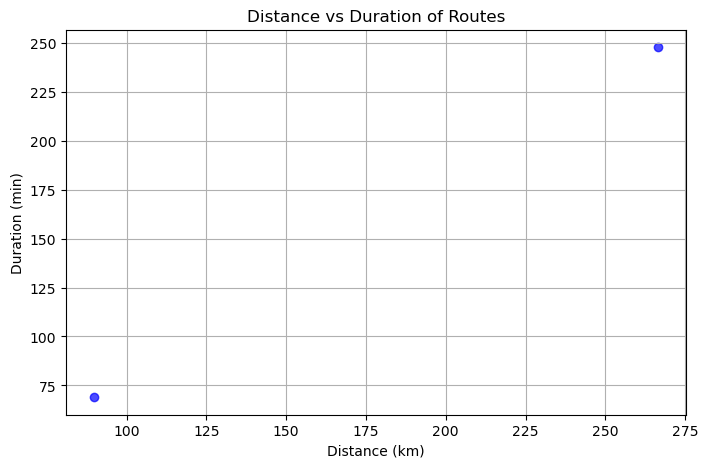

In [2]:
import folium
import requests
import time
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"  # Default OSRM port
service = "route"
version = "v1"
profile = "driving"

# Function to test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False
    except requests.HTTPError as e:
        print(f"OSRM server error: {str(e)}")
        return False

# Fetch routes from OSRM
def fetch_all_routes(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                routes.append({
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,
                    "duration": route["duration"] / 60,
                })
            return routes
        return None
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return None

# Function to log routes to CSV
def log_routes_to_csv(routes, filename="routes_log.csv"):
    df = pd.DataFrame(routes)
    df.to_csv(filename, index=False)
    print(f"Routes logged to {filename}")

# Function to plot distance vs duration
def plot_routes_analysis(routes):
    df = pd.DataFrame(routes)
    plt.figure(figsize=(8, 5))
    plt.scatter(df["distance"], df["duration"], color='blue', alpha=0.7)
    plt.xlabel("Distance (km)")
    plt.ylabel("Duration (min)")
    plt.title("Distance vs Duration of Routes")
    plt.grid()
    plt.show()

# Function to get live location (simulated)
def get_live_location():
    try:
        geolocator = Nominatim(user_agent="geoapi")
        location = geolocator.geocode("Rabat, Morocco")
        return Point(latitude=location.latitude, longitude=location.longitude)
    except GeocoderTimedOut:
        print("Geocoding timed out, using default location.")
        return Point(latitude=34.013325, longitude=-6.849747)

# Function to generate map
def get_folium_map(center_point, points, routes, best_route):
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude], zoom_start=7, tiles="CartoDB Positron"
    )
    
    # Add markers
    for point in points:
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"({point.latitude:.4f}, {point.longitude:.4f})",
            icon=folium.Icon(color="blue")
        ).add_to(folium_map)
    
    # Add routes
    colors = ["blue", "green", "purple"]
    for route, color in zip(routes, colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=color: {"color": c, "weight": 4}
            ).add_to(folium_map)
    
    # Highlight best route
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {"color": "red", "weight": 6}
        ).add_to(folium_map)
    
    return folium_map

# Define points
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = get_live_location()
points = [point_1, point_2, point_3]

# Main execution
if test_osrm_server():
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    routes_rabat_casablanca = fetch_all_routes(coords_rabat_casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_all_routes(coords_casablanca_marrakech, "Casablanca to Marrakech")
    all_routes = []
    if routes_rabat_casablanca:
        all_routes.extend(routes_rabat_casablanca)
    if routes_casablanca_marrakech:
        all_routes.extend(routes_casablanca_marrakech)
    
    # Find best route by duration
    best_route = min(all_routes, key=lambda x: x["duration"]) if all_routes else None
    if best_route:
        print(f"Best Route: {best_route['name']}")
    
    # Log and plot routes
    log_routes_to_csv(all_routes)
    plot_routes_analysis(all_routes)
    
    # Display map
    folium_map = get_folium_map(center_point, points, all_routes, best_route)
    display(folium_map)
else:
    print("Cannot proceed without OSRM server.")


In [16]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profiles = ["driving", "walking"]

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"OSRM server error: {str(e)}. Ensure it’s running on localhost:5000.")
        return False

# Function to fetch routes from OSRM with profile option
def fetch_route(coordinates, route_name="Route", profile="driving"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            route = route_data["routes"][0]
            return {
                "name": route_name,
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,  # km
                "duration": route["duration"] / 60,    # minutes
                "steps": route.get("legs", [{}])[0].get("steps", [])  # Extract steps
            }
        print(f"No routes found for {route_name}")
        return None
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return None

# Function to create the Folium map with step details
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap"
    )

    # Add tile layers
    folium.TileLayer("Stamen Toner").add_to(folium_map)

    # Add markers for cities
    city_names = ["Rabat", "Fes", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="green", icon="flag")
        ).add_to(folium_map)

    # Add routes with steps in popups
    route_colors = ["blue", "orange", "purple", "gray"]
    for route, color in zip(routes, route_colors):
        if route:
            # Use step['name'] if available, otherwise construct from maneuver
            steps_info = "<br>".join(
                f"Step {i+1}: {step.get('name', f'{step['maneuver']['type']} {step['maneuver'].get('modifier', '')}').strip()}"
                for i, step in enumerate(route["steps"][:5])  # Limit to first 5 steps
            ) if route["steps"] else "No detailed steps available."
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=color: {
                    "color": c,
                    "weight": 5,
                    "opacity": 0.7
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
                popup=folium.Popup(f"<b>{route['name']}</b><br>{steps_info}", max_width=300)
            ).add_to(folium_map)

    # Highlight best route
    if best_route:
        steps_info = "<br>".join(
            f"Step {i+1}: {step.get('name', f'{step['maneuver']['type']} {step['maneuver'].get('modifier', '')}').strip()}"
            for i, step in enumerate(best_route["steps"][:5])
        ) if best_route["steps"] else "No detailed steps available."
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 7,
                "opacity": 0.9
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
            popup=folium.Popup(f"<b>Best Route: {best_route['name']}</b><br>{steps_info}", max_width=300)
        ).add_to(folium_map)

    # Add legend
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid gray;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Fes</p>
        <p><span style="color: orange;">━</span> Fes to Casablanca</p>
        <p><span style="color: purple;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: gray;">━</span> Rabat to Marrakech (Walking)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    folium.LayerControl().add_to(folium_map)
    return folium_map

# Define points with Fes added
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=34.037150, longitude=-5.008585)  # Fes
point_3 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_4 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.3, longitude=-6.5)  # Adjusted center

points = [point_1, point_2, point_3, point_4]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch routes with waypoints
    coords_rabat_fes = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    coords_fes_casablanca = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    coords_casablanca_marrakech = f"{point_3.longitude},{point_3.latitude};{point_4.longitude},{point_4.latitude}"
    coords_rabat_marrakech_walk = f"{point_1.longitude},{point_1.latitude};{point_4.longitude},{point_4.latitude}"

    route_rabat_fes = fetch_route(coords_rabat_fes, "Rabat to Fes", profile="driving")
    route_fes_casablanca = fetch_route(coords_fes_casablanca, "Fes to Casablanca", profile="driving")
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech", profile="driving")
    route_rabat_marrakech_walk = fetch_route(coords_rabat_marrakech_walk, "Rabat to Marrakech (Walking)", profile="walking")

    routes = [route_rabat_fes, route_fes_casablanca, route_casablanca_marrakech, route_rabat_marrakech_walk]

    # Determine best route with a weighted score (60% distance, 40% duration)
    def calculate_score(distance, duration, max_distance=float("inf"), max_duration=float("inf")):
        return (0.6 * (distance / max_distance)) + (0.4 * (duration / max_duration)) if distance != float("inf") else float("inf")

    # Option 1: Rabat -> Fes -> Casablanca -> Marrakech
    total_distance_option1 = sum(
        r["distance"] for r in [route_rabat_fes, route_fes_casablanca, route_casablanca_marrakech] if r
    ) if all([route_rabat_fes, route_fes_casablanca, route_casablanca_marrakech]) else float("inf")
    total_duration_option1 = sum(
        r["duration"] for r in [route_rabat_fes, route_fes_casablanca, route_casablanca_marrakech] if r
    ) if all([route_rabat_fes, route_fes_casablanca, route_casablanca_marrakech]) else float("inf")

    # Option 2: Rabat -> Marrakech (Walking)
    total_distance_option2 = route_rabat_marrakech_walk["distance"] if route_rabat_marrakech_walk else float("inf")
    total_duration_option2 = route_rabat_marrakech_walk["duration"] if route_rabat_marrakech_walk else float("inf")

    # Normalize scores
    max_distance = max(total_distance_option1, total_distance_option2, 1)  # Avoid division by zero
    max_duration = max(total_duration_option1, total_duration_option2, 1)
    score_option1 = calculate_score(total_distance_option1, total_duration_option1, max_distance, max_duration)
    score_option2 = calculate_score(total_distance_option2, total_duration_option2, max_distance, max_duration)

    best_route = None
    if score_option1 < score_option2 and score_option1 < float("inf"):
        best_route = {
            "name": "Rabat -> Fes -> Casablanca -> Marrakech",
            "geometry": {
                "type": "MultiLineString",
                "coordinates": [
                    route_rabat_fes["geometry"]["coordinates"],
                    route_fes_casablanca["geometry"]["coordinates"],
                    route_casablanca_marrakech["geometry"]["coordinates"]
                ]
            },
            "distance": total_distance_option1,
            "duration": total_duration_option1,
            "steps": route_rabat_fes["steps"] + route_fes_casablanca["steps"] + route_casablanca_marrakech["steps"]
        }
        print(f"Best route: Rabat -> Fes -> Casablanca -> Marrakech")
        print(f"Total Distance: {total_distance_option1:.2f} km, Duration: {total_duration_option1:.2f} min")
    elif score_option2 < float("inf"):
        best_route = route_rabat_marrakech_walk
        print(f"Best route: Rabat -> Marrakech (Walking)")
        print(f"Total Distance: {total_distance_option2:.2f} km, Duration: {total_duration_option2:.2f} min")
    else:
        print("Could not determine the best route.")

    # Generate and display map
    folium_map = get_folium_map(center_point, points, routes, best_route)
    display(folium_map)

SyntaxError: f-string: f-string: unmatched '[' (3302208308.py, line 80)

In [3]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
HOST = "http://localhost:5000"
SERVICE = "route"
VERSION = "v1"
PROFILES = ["driving", "walking"]

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{HOST}/{SERVICE}/{VERSION}/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"OSRM server error: {str(e)}. Ensure it’s running on localhost:5000.")
        return False

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route", profile="driving"):
    url = f"{HOST}/{SERVICE}/{VERSION}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            route = route_data["routes"][0]
            return {
                "name": route_name,
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,  # km
                "duration": route["duration"] / 60,    # minutes
                "steps": route.get("legs", [{}])[0].get("steps", [])
            }
        print(f"No routes found for {route_name}")
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
    return None

# Function to create the Folium map
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    folium_map = folium.Map(location=[center_point.latitude, center_point.longitude], zoom_start=7, tiles="OpenStreetMap")
    city_names = ["Rabat", "Fes", "Casablanca", "Marrakech"]
    
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="green", icon="flag")
        ).add_to(folium_map)
    
    route_colors = ["blue", "orange", "purple", "gray"]
    for route, color in zip(routes, route_colors):
        if route:
            steps_info = "<br>".join(
                f"Step {i+1}: {step.get('name', step.get('maneuver', {}).get('type', 'Unknown'))}"
                for i, step in enumerate(route["steps"][:5])
            ) if route["steps"] else "No detailed steps available."
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _: {"color": color, "weight": 5, "opacity": 0.7},
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
                popup=folium.Popup(f"<b>{route['name']}</b><br>{steps_info}", max_width=300)
            ).add_to(folium_map)
    
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {"color": "red", "weight": 7, "opacity": 0.9},
            tooltip=f"Best Route: {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
            popup=folium.Popup(f"<b>Best Route</b><br>{steps_info}", max_width=300)
        ).add_to(folium_map)
    return folium_map

# Define points
points = [
    Point(latitude=34.013325, longitude=-6.849747),  # Rabat
    Point(latitude=34.037150, longitude=-5.008585),  # Fes
    Point(latitude=33.573075, longitude=-7.609918),  # Casablanca
    Point(latitude=31.791986, longitude=-7.091953)   # Marrakech
]
center_point = Point(latitude=33.3, longitude=-6.5)

if test_osrm_server():
    coords = [
        ("Rabat to Fes", f"{points[0].longitude},{points[0].latitude};{points[1].longitude},{points[1].latitude}"),
        ("Fes to Casablanca", f"{points[1].longitude},{points[1].latitude};{points[2].longitude},{points[2].latitude}"),
        ("Casablanca to Marrakech", f"{points[2].longitude},{points[2].latitude};{points[3].longitude},{points[3].latitude}"),
        ("Rabat to Marrakech (Walking)", f"{points[0].longitude},{points[0].latitude};{points[3].longitude},{points[3].latitude}", "walking")
    ]
    routes = [fetch_route(coord[1], coord[0], coord[2] if len(coord) > 2 else "driving") for coord in coords]
    best_route = min((route for route in routes if route), key=lambda r: r["distance"] + r["duration"], default=None)
    display(get_folium_map(center_point, points, routes, best_route))
else:
    print("Cannot proceed without a running OSRM server.")

OSRM server is running and accessible!


In [15]:
import folium
import requests
import math
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
from folium import Map
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives and steps from OSRM
def fetch_all_routes(coordinates, route_name="Route", steps=False):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps={str(steps).lower()}&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                route_info = {
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,
                    "duration": route["duration"] / 60
                }
                if steps and "legs" in route:
                    route_info["legs"] = route["legs"]
                routes.append(route_info)
            return routes
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Add compass to the map
def add_compass(folium_map: Map, location: tuple, bearing: int, size: int = 50, color: str = "red", weight: int = 2):
    lat, lon = location
    end_lat = lat + (math.cos(math.radians(bearing)) * size * 1e-5)
    end_lon = lon + (math.sin(math.radians(bearing)) * size * 1e-5)

    folium.Marker(
        location=location,
        icon=folium.DivIcon(html="""<div style="font-size: 12px; color: black;">📍</div>"""),
    ).add_to(folium_map)

    folium.PolyLine(
        locations=[location, (end_lat, end_lon)],
        color=color,
        weight=weight,
        tooltip=f"Bearing: {bearing}°"
    ).add_to(folium_map)

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], full_routes: list[dict], segmented_routes: dict, selected_full_route: dict = None, selected_segments: dict = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png",
        attr="© OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team"
    )

    # Add markers for main points
    city_names = ["Rabat", "Casablanca", "Settat", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=city,
            tooltip=city,
            icon=folium.Icon(color="green" if city == "Rabat" else "red" if city == "Marrakech" else "blue", icon="map-pin", prefix="fa")
        ).add_to(folium_map)

    # Add full routes faintly
    full_colors = ["#4285F4", "#34A853", "#FBBC05"]
    for i, route in enumerate(full_routes):
        folium.GeoJson(
            route["geometry"],
            style_function=lambda _, c=full_colors[i % len(full_colors)]: {
                "color": c,
                "weight": 3,
                "opacity": 0.5 if route != selected_full_route else 1.0
            },
            tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add segmented routes faintly if no full route is selected
    if not selected_full_route and segmented_routes:
        segment_colors = ["#87CEEB", "#98FB98", "#FFD700"]
        for i, (segment, routes) in enumerate(segmented_routes.items()):
            for route in routes:
                folium.GeoJson(
                    route["geometry"],
                    style_function=lambda _, c=segment_colors[i % len(segment_colors)]: {
                        "color": c,
                        "weight": 3,
                        "opacity": 0.3
                    },
                    tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
                ).add_to(folium_map)

    # Highlight selected route (full or segments) with step details
    total_distance = 0
    total_duration = 0
    step_colors = ['black', 'blue', 'purple']
    if selected_full_route and "legs" in selected_full_route:
        total_distance = selected_full_route["distance"]
        total_duration = selected_full_route["duration"]
        legs = selected_full_route["legs"]
        for leg in legs[:1]:  # Limit to first leg for simplicity
            steps = leg["steps"]
            for i, step in enumerate(steps):
                geometry = step["geometry"]
                coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
                color = step_colors[i % len(step_colors)]
                popup_text = f"""
                Distance: {step['distance']} m<br>Duration: {step['duration']} s<br>Name: {step['name']}<br>Driving side: {step['driving_side']}<br>Instruction: {step['maneuver']['modifier']}<br>Type: {step['maneuver']['type']}<br>Intersections: {len(step['intersections'])}
                """
                folium.PolyLine(
                    locations=coordinates,
                    color=color,
                    weight=6,
                    popup=folium.Popup(popup_text, max_width=300)
                ).add_to(folium_map)

                # Add compass at intersections
                for intersection in step["intersections"][1:]:
                    location = (intersection["location"][1], intersection["location"][0])
                    bearings = intersection["bearings"]
                    for j, bearing in enumerate(bearings):
                        allowed = intersection["entry"][j]
                        add_compass(folium_map, location, bearing, color="green" if allowed else "red", weight=5)

    elif selected_segments:
        for segment, route in selected_segments.items():
            if route and "legs" in route:
                total_distance += route["distance"]
                total_duration += route["duration"]
                legs = route["legs"]
                for leg in legs[:1]:
                    steps = leg["steps"]
                    for i, step in enumerate(steps):
                        geometry = step["geometry"]
                        coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
                        color = step_colors[i % len(step_colors)]
                        popup_text = f"""
                        Distance: {step['distance']} m<br>Duration: {step['duration']} s<br>Name: {step['name']}<br>Driving side: {step['driving_side']}<br>Instruction: {step['maneuver']['modifier']}<br>Type: {step['maneuver']['type']}<br>Intersections: {len(step['intersections'])}
                        """
                        folium.PolyLine(
                            locations=coordinates,
                            color=color,
                            weight=6,
                            popup=folium.Popup(popup_text, max_width=300)
                        ).add_to(folium_map)

                        for intersection in step["intersections"][1:]:
                            location = (intersection["location"][1], intersection["location"][0])
                            bearings = intersection["bearings"]
                            for j, bearing in enumerate(bearings):
                                allowed = intersection["entry"][j]
                                add_compass(folium_map, location, bearing, color="green" if allowed else "red", weight=5)

    # Add info box
    time_str = f"{int(total_duration // 60)}h {int(total_duration % 60)}m" if total_duration >= 60 else f"{int(total_duration)}m"
    info_html = f"""
    <div style="position: fixed; top: 10px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
        <h4>{'Full Route' if selected_full_route else 'Custom Route'}</h4>
        <p><strong>Total Distance:</strong> {total_distance:.2f} km</p>
        <p><strong>Total Duration:</strong> {time_str}</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(info_html))

    plugins.MiniMap().add_to(folium_map)
    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
settat = Point(latitude=33.001, longitude=-7.6166)  # Settat
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, settat, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Define full predefined routes
    full_routes = []
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_casablanca_marrakech = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_settat_marrakech = f"{rabat.longitude},{rabat.latitude};{settat.longitude},{settat.latitude};{marrakech.longitude},{marrakech.latitude}"

    direct_routes = fetch_all_routes(coords_rabat_marrakech, "Direct Rabat to Marrakech", steps=True)
    via_casablanca_routes = fetch_all_routes(coords_rabat_casablanca_marrakech, "Via Casablanca", steps=True)
    via_settat_routes = fetch_all_routes(coords_rabat_settat_marrakech, "Via Settat", steps=True)

    if direct_routes:
        full_routes.extend(direct_routes)
    if via_casablanca_routes:
        full_routes.extend(via_casablanca_routes)
    if via_settat_routes:
        full_routes.extend(via_settat_routes)

    # Extract waypoints from fastest direct route for segments
    fastest_route = min(direct_routes, key=lambda x: x["duration"]) if direct_routes else None
    segmented_routes = {}
    if fastest_route and "legs" in fastest_route:
        waypoints = [rabat]
        for step in fastest_route["legs"][0]["steps"]:
            if "maneuver" in step and "location" in step["maneuver"]:
                waypoints.append(Point(latitude=step["maneuver"]["location"][1], longitude=step["maneuver"]["location"][0]))
        waypoints.append(marrakech)

        for i in range(len(waypoints) - 1):
            start = waypoints[i]
            end = waypoints[i + 1]
            coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
            segment_name = f"Segment {i + 1}: ({start.latitude:.2f}, {start.longitude:.2f}) to ({end.latitude:.2f}, {end.longitude:.2f})"
            segmented_routes[segment_name] = fetch_all_routes(coords, segment_name, steps=True)

    if not full_routes and not segmented_routes:
        print("No routes available to display.")
    else:
        # Dropdown for full routes
        full_route_options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in full_routes]
        full_route_dropdown = widgets.Dropdown(
            options=[("Custom Segments", None)] + full_route_options,
            description="Full Routes:",
            disabled=False,
            layout={'width': 'max-content'}
        )

        # Dropdowns for segments
        segment_dropdowns = {}
        for segment, routes in segmented_routes.items():
            options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in routes]
            segment_dropdowns[segment] = widgets.Dropdown(
                options=options,
                description=segment + ":",
                disabled=False,
                layout={'width': 'max-content'}
            )

        # Update map based on selections
        def update_map(full_route, **segments):
            selected_full_route = full_route
            selected_segments = {segment: dropdown.value for segment, dropdown in segment_dropdowns.items()} if not full_route else {}
            folium_map = get_folium_map(center_point, points, full_routes, segmented_routes, selected_full_route, selected_segments)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        interactive_widget = widgets.interactive(
            update_map,
            full_route=full_route_dropdown,
            **{segment.replace(" ", "_"): dropdown for segment, dropdown in segment_dropdowns.items()}
        )

        # Initial map with fastest full route selected
        initial_selected_full = min(full_routes, key=lambda x: x["duration"]) if full_routes else None
        initial_map = get_folium_map(center_point, points, full_routes, segmented_routes, initial_selected_full)
        display(initial_map)
        display(interactive_widget)

OSRM server is running and accessible!


KeyError: 'modifier'

In [1]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets  # For interactive widgets
from IPython.display import clear_output  # To clear previous outputs

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"  # Default OSRM port
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()  # Raise an exception for bad status codes
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:5000.")
        return False
    except requests.HTTPError as e:
        print(f"OSRM server error: {str(e)}")
        return False

# Function to fetch all routes from OSRM with alternatives
def fetch_all_routes(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                routes.append({
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                })
            return routes
        print(f"No routes found for {route_name}")
        return None
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return None

# Function to create and populate the Folium map with enhanced features
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], selected_route: dict = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True  # Adds a scale bar
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers with clustering
    marker_cluster = plugins.MarkerCluster().add_to(folium_map)
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(marker_cluster)

    # Add all routes with dynamic colors and tooltips
    route_colors = ["blue", "green", "purple", "orange", "darkred"]
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=color: {
                    "color": c,
                    "weight": 4,
                    "opacity": 0.6,
                    "dashArray": "5, 5" if "Direct" in route["name"] else None
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Highlight the selected route
    if selected_route:
        folium.GeoJson(
            selected_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 6,
                "opacity": 1.0
            },
            tooltip=f"Selected Route ({selected_route['name']}): {selected_route['distance']:.2f} km, {selected_route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add a custom legend
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: rgba(255, 255, 255, 0.8); border: 1px solid grey; border-radius: 3px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Selected Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center of Morocco

points = [point_1, point_2, point_3]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch all possible routes with alternatives
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"

    routes_rabat_casablanca = fetch_all_routes(coords_rabat_casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_all_routes(coords_casablanca_marrakech, "Casablanca to Marrakech")
    routes_rabat_marrakech = fetch_all_routes(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    # Combine all routes into a single list
    all_routes = []
    if routes_rabat_casablanca:
        all_routes.extend(routes_rabat_casablanca)
    if routes_casablanca_marrakech:
        all_routes.extend(routes_casablanca_marrakech)
    if routes_rabat_marrakech:
        all_routes.extend(routes_rabat_marrakech)

    # Create a dropdown for route selection
    route_names = [route["name"] for route in all_routes]
    dropdown = widgets.Dropdown(
        options=route_names,
        description="Select Route:",
        disabled=False,
    )

    # Function to update the map based on user selection
    def update_map(selected_route_name):
        selected_route = next(route for route in all_routes if route["name"] == selected_route_name)
        folium_map = get_folium_map(center_point, points, all_routes, selected_route)
        clear_output(wait=True)  # Clear previous output
        display(folium_map)

    # Link the dropdown to the update function
    widgets.interact(update_map, selected_route_name=dropdown)

    # Display the initial map
    initial_map = get_folium_map(center_point, points, all_routes)
    display(initial_map)

OSRM server is running and accessible!


interactive(children=(Dropdown(description='Select Route:', options=('Rabat to Casablanca (Option 1)', 'Casabl…

In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output
from itertools import product

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives from OSRM
def fetch_all_routes(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            return [{
                "name": f"{route_name} (Option {i + 1})",
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,
                "duration": route["duration"] / 60
            } for i, route in enumerate(route_data["routes"])]
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Combine route geometries for full paths
def combine_routes(route_segments):
    combined_geometry = {"type": "LineString", "coordinates": []}
    total_distance = 0
    total_duration = 0
    name = " - ".join(route["name"] for route in route_segments)
    
    for route in route_segments:
        combined_geometry["coordinates"].extend(route["geometry"]["coordinates"])
        total_distance += route["distance"]
        total_duration += route["duration"]
    
    return {
        "name": name,
        "geometry": combined_geometry,
        "distance": total_distance,
        "duration": total_duration
    }

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], all_paths: list[dict], selected_path: dict = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(folium_map)

    # Add all paths faintly
    for i, path in enumerate(all_paths):
        folium.GeoJson(
            path["geometry"],
            style_function=lambda _, i=i: {
                "color": "gray",
                "weight": 3,
                "opacity": 0.3
            },
            tooltip=f"{path['name']}: {path['distance']:.2f} km, {path['duration']:.2f} min"
        ).add_to(folium_map)

    # Highlight selected path
    if selected_path:
        folium.GeoJson(
            selected_path["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 6,
                "opacity": 1.0
            },
            tooltip=f"Selected: {selected_path['name']} - {selected_path['distance']:.2f} km, {selected_path['duration']:.2f} min"
        ).add_to(folium_map)

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch alternative routes for each segment
    coords_rabat_casablanca = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude}"
    coords_casablanca_marrakech = f"{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"

    routes_rabat_casablanca = fetch_all_routes(coords_rabat_casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_all_routes(coords_casablanca_marrakech, "Casablanca to Marrakech")
    routes_rabat_marrakech = fetch_all_routes(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    # Generate all possible combinations
    all_paths = []
    
    # Direct route options
    if routes_rabat_marrakech:
        all_paths.extend(routes_rabat_marrakech)
    
    # Via Casablanca combinations
    if routes_rabat_casablanca and routes_casablanca_marrakech:
        for combo in product(routes_rabat_casablanca, routes_casablanca_marrakech):
            combined_path = combine_routes(combo)
            all_paths.append(combined_path)

    if not all_paths:
        print("No paths available to display.")
    else:
        # Create dropdown for path selection
        path_options = [(f"{path['name']} ({path['distance']:.2f} km, {path['duration']:.2f} min)", path) for path in all_paths]
        dropdown = widgets.Dropdown(
            options=path_options,
            description="Select Path:",
            disabled=False,
        )

        # Update map based on selection
        def update_map(selected_path):
            folium_map = get_folium_map(center_point, points, all_paths, selected_path)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        widgets.interact(update_map, selected_path=dropdown)

        # Initial map display
        initial_map = get_folium_map(center_point, points, all_paths, all_paths[0] if all_paths else None)
        display(initial_map)

OSRM server is running and accessible!


interactive(children=(Dropdown(description='Select Path:', options=(('Rabat to Marrakech (Direct) (Option 1) (…

In [10]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output
from itertools import product

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives from OSRM
def fetch_all_routes(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            return [{
                "name": f"{route_name} (Option {i + 1})",
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,
                "duration": route["duration"] / 60
            } for i, route in enumerate(route_data["routes"])]
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Combine route segments into a full path
def combine_routes(route_segments):
    combined_geometry = {"type": "LineString", "coordinates": []}
    total_distance = 0
    total_duration = 0
    name = " - ".join(route["name"] for route in route_segments)
    
    for route in route_segments:
        combined_geometry["coordinates"].extend(route["geometry"]["coordinates"])
        total_distance += route["distance"]
        total_duration += route["duration"]
    
    return {
        "name": name,
        "geometry": combined_geometry,
        "distance": total_distance,
        "duration": total_duration
    }

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], all_paths: list[dict], selected_path: dict = None) -> folium.Map:
    # Use a Google Maps-like tile layer (OSM as fallback)
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        attr="© OpenStreetMap contributors"
    )

    # Add markers with Google Maps-like icons
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=city,
            tooltip=city,
            icon=folium.Icon(color="green" if city == "Rabat" else "red" if city == "Marrakech" else "blue", icon="map-pin", prefix="fa")
        ).add_to(folium_map)

    # Add all paths with Google Maps-like styling
    colors = ["#4285F4", "#34A853", "#FBBC05"]  # Google Maps blue, green, yellow
    for i, path in enumerate(all_paths[:3]):  # Limit to 3 paths
        folium.GeoJson(
            path["geometry"],
            style_function=lambda _, c=colors[i % len(colors)]: {
                "color": c,
                "weight": 4,
                "opacity": 0.5 if path != selected_path else 1.0
            },
            tooltip=f"{path['name']}: {path['distance']:.2f} km, {path['duration']:.2f} min"
        ).add_to(folium_map)

    # Add detailed info for selected path
    if selected_path:
        duration_hours = int(selected_path["duration"] // 60)
        duration_minutes = int(selected_path["duration"] % 60)
        time_str = f"{duration_hours}h {duration_minutes}m" if duration_hours > 0 else f"{duration_minutes}m"
        info_html = f"""
        <div style="position: fixed; top: 10px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
            <h4>{selected_path['name']}</h4>
            <p><strong>Distance:</strong> {selected_path['distance']:.2f} km</p>
            <p><strong>Duration:</strong> {time_str}</p>
        </div>
        """
        folium_map.get_root().html.add_child(folium.Element(info_html))

    # Add minimap
    plugins.MiniMap().add_to(folium_map)

    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch alternative routes for each segment
    coords_rabat_casablanca = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude}"
    coords_casablanca_marrakech = f"{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"

    routes_rabat_casablanca = fetch_all_routes(coords_rabat_casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_all_routes(coords_casablanca_marrakech, "Casablanca to Marrakech")
    routes_rabat_marrakech = fetch_all_routes(coords_rabat_marrakech, "Rabat to Marrakech")

    # Generate all possible paths
    all_paths = []
    if routes_rabat_marrakech:
        all_paths.extend(routes_rabat_marrakech)
    if routes_rabat_casablanca and routes_casablanca_marrakech:
        for combo in product(routes_rabat_casablanca, routes_casablanca_marrakech):
            all_paths.append(combine_routes(combo))

    # Sort paths by duration (fastest first)
    all_paths = sorted(all_paths, key=lambda x: x["duration"])

    if not all_paths:
        print("No paths available to display.")
    else:
        # Create dropdown for path selection
        path_options = [
            (f"{path['name']} - {int(path['duration'] // 60)}h {int(path['duration'] % 60)}m ({path['distance']:.2f} km)", path) 
            for path in all_paths
        ]
        dropdown = widgets.Dropdown(
            options=path_options,
            description="Routes:",
            disabled=False,
            layout={'width': 'max-content'}
        )

        # Update map based on selection
        def update_map(selected_path):
            folium_map = get_folium_map(center_point, points, all_paths, selected_path)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        widgets.interact(update_map, selected_path=dropdown)

        # Initial map display with fastest route selected
        initial_map = get_folium_map(center_point, points, all_paths, all_paths[0])
        display(initial_map)

OSRM server is running and accessible!


interactive(children=(Dropdown(description='Routes:', layout=Layout(width='max-content'), options=(('Rabat to …

In [11]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output
from itertools import product

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"  # Note: OSRM doesn’t support transit; using driving as fallback

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives from OSRM
def fetch_all_routes(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            return [{
                "name": f"{route_name} (Option {i + 1})",
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,
                "duration": route["duration"] / 60
            } for i, route in enumerate(route_data["routes"])]
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Combine route segments into a full path
def combine_routes(route_segments):
    combined_geometry = {"type": "LineString", "coordinates": []}
    total_distance = 0
    total_duration = 0
    name = " - ".join(route["name"] for route in route_segments)
    
    for route in route_segments:
        combined_geometry["coordinates"].extend(route["geometry"]["coordinates"])
        total_distance += route["distance"]
        total_duration += route["duration"]
    
    return {
        "name": name,
        "geometry": combined_geometry,
        "distance": total_distance,
        "duration": total_duration
    }

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], all_paths: list[dict], selected_path: dict = None) -> folium.Map:
    # Use a transit-focused tile layer (OpenStreetMap HOT style highlights transport features)
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png",
        attr="© OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team"
    )

    # Add markers with transit-like icons
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=city,
            tooltip=city,
            icon=folium.Icon(
                color="green" if city == "Rabat" else "red" if city == "Marrakech" else "blue",
                icon="bus" if city != "Rabat" and city != "Marrakech" else "map-pin",  # Bus icon for waypoints
                prefix="fa"
            )
        ).add_to(folium_map)

    # Add all paths with Google Maps-like styling
    colors = ["#4285F4", "#34A853", "#FBBC05"]  # Google Maps blue, green, yellow
    for i, path in enumerate(all_paths[:3]):  # Limit to 3 paths
        folium.GeoJson(
            path["geometry"],
            style_function=lambda _, c=colors[i % len(colors)]: {
                "color": c,
                "weight": 4,
                "opacity": 0.5 if path != selected_path else 1.0
            },
            tooltip=f"{path['name']}: {path['distance']:.2f} km, {path['duration']:.2f} min"
        ).add_to(folium_map)

    # Add detailed info for selected path
    if selected_path:
        duration_hours = int(selected_path["duration"] // 60)
        duration_minutes = int(selected_path["duration"] % 60)
        time_str = f"{duration_hours}h {duration_minutes}m" if duration_hours > 0 else f"{duration_minutes}m"
        info_html = f"""
        <div style="position: fixed; top: 10px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
            <h4>{selected_path['name']}</h4>
            <p><strong>Distance:</strong> {selected_path['distance']:.2f} km</p>
            <p><strong>Duration:</strong> {time_str}</p>
        </div>
        """
        folium_map.get_root().html.add_child(folium.Element(info_html))

    # Add minimap
    plugins.MiniMap().add_to(folium_map)

    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch alternative routes for each segment
    coords_rabat_casablanca = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude}"
    coords_casablanca_marrakech = f"{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"

    routes_rabat_casablanca = fetch_all_routes(coords_rabat_casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_all_routes(coords_casablanca_marrakech, "Casablanca to Marrakech")
    routes_rabat_marrakech = fetch_all_routes(coords_rabat_marrakech, "Rabat to Marrakech")

    # Generate all possible paths
    all_paths = []
    if routes_rabat_marrakech:
        all_paths.extend(routes_rabat_marrakech)
    if routes_rabat_casablanca and routes_casablanca_marrakech:
        for combo in product(routes_rabat_casablanca, routes_casablanca_marrakech):
            all_paths.append(combine_routes(combo))

    # Sort paths by duration (fastest first)
    all_paths = sorted(all_paths, key=lambda x: x["duration"])

    if not all_paths:
        print("No paths available to display.")
    else:
        # Create dropdown for path selection
        path_options = [
            (f"{path['name']} - {int(path['duration'] // 60)}h {int(path['duration'] % 60)}m ({path['distance']:.2f} km)", path) 
            for path in all_paths
        ]
        dropdown = widgets.Dropdown(
            options=path_options,
            description="Routes:",
            disabled=False,
            layout={'width': 'max-content'}
        )

        # Update map based on selection
        def update_map(selected_path):
            folium_map = get_folium_map(center_point, points, all_paths, selected_path)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        widgets.interact(update_map, selected_path=dropdown)

        # Initial map display with fastest route selected
        initial_map = get_folium_map(center_point, points, all_paths, all_paths[0])
        display(initial_map)

OSRM server is running and accessible!


interactive(children=(Dropdown(description='Routes:', layout=Layout(width='max-content'), options=(('Rabat to …

In [13]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives and steps from OSRM
def fetch_all_routes(coordinates, route_name="Route", steps=False):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps={str(steps).lower()}&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                route_info = {
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,
                    "duration": route["duration"] / 60
                }
                if steps and "legs" in route:
                    route_info["steps"] = route["legs"][0]["steps"]
                routes.append(route_info)
            return routes
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], full_routes: list[dict], segmented_routes: dict, selected_full_route: dict = None, selected_segments: dict = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png",
        attr="© OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team"
    )

    # Add markers for main points
    city_names = ["Rabat", "Casablanca", "Settat", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=city,
            tooltip=city,
            icon=folium.Icon(color="green" if city == "Rabat" else "red" if city == "Marrakech" else "blue", icon="map-pin", prefix="fa")
        ).add_to(folium_map)

    # Add full routes faintly
    full_colors = ["#4285F4", "#34A853", "#FBBC05"]
    for i, route in enumerate(full_routes):
        folium.GeoJson(
            route["geometry"],
            style_function=lambda _, c=full_colors[i % len(full_colors)]: {
                "color": c,
                "weight": 3,
                "opacity": 0.5 if route != selected_full_route else 1.0
            },
            tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add segmented routes faintly if no full route is selected
    if not selected_full_route and segmented_routes:
        segment_colors = ["#87CEEB", "#98FB98", "#FFD700"]
        for i, (segment, routes) in enumerate(segmented_routes.items()):
            for route in routes:
                folium.GeoJson(
                    route["geometry"],
                    style_function=lambda _, c=segment_colors[i % len(segment_colors)]: {
                        "color": c,
                        "weight": 3,
                        "opacity": 0.3
                    },
                    tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
                ).add_to(folium_map)

    # Highlight selected route (full or segments)
    total_distance = 0
    total_duration = 0
    if selected_full_route:
        folium.GeoJson(
            selected_full_route["geometry"],
            style_function=lambda _: {"color": "red", "weight": 6, "opacity": 1.0},
            tooltip=f"Selected: {selected_full_route['name']} - {selected_full_route['distance']:.2f} km, {selected_full_route['duration']:.2f} min"
        ).add_to(folium_map)
        total_distance = selected_full_route["distance"]
        total_duration = selected_full_route["duration"]
    elif selected_segments:
        for segment, route in selected_segments.items():
            if route:
                folium.GeoJson(
                    route["geometry"],
                    style_function=lambda _: {"color": "red", "weight": 6, "opacity": 1.0},
                    tooltip=f"Selected: {route['name']} - {route['distance']:.2f} km, {route['duration']:.2f} min"
                ).add_to(folium_map)
                total_distance += route["distance"]
                total_duration += route["duration"]

    # Add info box
    time_str = f"{int(total_duration // 60)}h {int(total_duration % 60)}m" if total_duration >= 60 else f"{int(total_duration)}m"
    info_html = f"""
    <div style="position: fixed; top: 10px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
        <h4>{'Full Route' if selected_full_route else 'Custom Route'}</h4>
        <p><strong>Total Distance:</strong> {total_distance:.2f} km</p>
        <p><strong>Total Duration:</strong> {time_str}</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(info_html))

    plugins.MiniMap().add_to(folium_map)
    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
settat = Point(latitude=33.001, longitude=-7.6166)  # Settat (new waypoint)
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, settat, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Define full predefined routes
    full_routes = []
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_casablanca_marrakech = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_settat_marrakech = f"{rabat.longitude},{rabat.latitude};{settat.longitude},{settat.latitude};{marrakech.longitude},{marrakech.latitude}"

    direct_routes = fetch_all_routes(coords_rabat_marrakech, "Direct Rabat to Marrakech", steps=True)
    via_casablanca_routes = fetch_all_routes(coords_rabat_casablanca_marrakech, "Via Casablanca")
    via_settat_routes = fetch_all_routes(coords_rabat_settat_marrakech, "Via Settat")

    if direct_routes:
        full_routes.extend(direct_routes)
    if via_casablanca_routes:
        full_routes.extend(via_casablanca_routes)
    if via_settat_routes:
        full_routes.extend(via_settat_routes)

    # Extract waypoints from fastest direct route
    fastest_route = min(direct_routes, key=lambda x: x["duration"]) if direct_routes else None
    segmented_routes = {}
    if fastest_route and "steps" in fastest_route:
        waypoints = [rabat]
        for step in fastest_route["steps"]:
            if "maneuver" in step and "location" in step["maneuver"]:
                waypoints.append(Point(latitude=step["maneuver"]["location"][1], longitude=step["maneuver"]["location"][0]))
        waypoints.append(marrakech)

        for i in range(len(waypoints) - 1):
            start = waypoints[i]
            end = waypoints[i + 1]
            coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
            segment_name = f"Segment {i + 1}: ({start.latitude:.2f}, {start.longitude:.2f}) to ({end.latitude:.2f}, {end.longitude:.2f})"
            segmented_routes[segment_name] = fetch_all_routes(coords, segment_name)

    if not full_routes and not segmented_routes:
        print("No routes available to display.")
    else:
        # Dropdown for full routes
        full_route_options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in full_routes]
        full_route_dropdown = widgets.Dropdown(
            options=[("Custom Segments", None)] + full_route_options,
            description="Full Routes:",
            disabled=False,
            layout={'width': 'max-content'}
        )

        # Dropdowns for segments
        segment_dropdowns = {}
        for segment, routes in segmented_routes.items():
            options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in routes]
            segment_dropdowns[segment] = widgets.Dropdown(
                options=options,
                description=segment + ":",
                disabled=False,
                layout={'width': 'max-content'}
            )

        # Update map based on selections
        def update_map(full_route, **segments):
            selected_full_route = full_route
            selected_segments = {segment: dropdown.value for segment, dropdown in segment_dropdowns.items()} if not full_route else {}
            folium_map = get_folium_map(center_point, points, full_routes, segmented_routes, selected_full_route, selected_segments)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        interactive_widget = widgets.interactive(
            update_map,
            full_route=full_route_dropdown,
            **{segment.replace(" ", "_"): dropdown for segment, dropdown in segment_dropdowns.items()}
        )

        # Initial map with fastest full route selected
        initial_selected_full = min(full_routes, key=lambda x: x["duration"]) if full_routes else None
        initial_map = get_folium_map(center_point, points, full_routes, segmented_routes, initial_selected_full)
        display(initial_map)
        display(interactive_widget)

OSRM server is running and accessible!


interactive(children=(Dropdown(description='Full Routes:', layout=Layout(width='max-content'), options=(('Cust…

In [ ]:
import folium
import requests
import math
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
from folium import Map
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives and steps from OSRM
def fetch_all_routes(coordinates, route_name="Route", steps=False):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps={str(steps).lower()}&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                route_info = {
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,
                    "duration": route["duration"] / 60
                }
                if steps and "legs" in route:
                    route_info["legs"] = route["legs"]
                routes.append(route_info)
            return routes
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Add compass to the map
def add_compass(folium_map: Map, location: tuple, bearing: int, size: int = 50, color: str = "red", weight: int = 2):
    lat, lon = location
    end_lat = lat + (math.cos(math.radians(bearing)) * size * 1e-5)
    end_lon = lon + (math.sin(math.radians(bearing)) * size * 1e-5)

    folium.Marker(
        location=location,
        icon=folium.DivIcon(html="""<div style="font-size: 12px; color: black;">📍</div>"""),
    ).add_to(folium_map)

    folium.PolyLine(
        locations=[location, (end_lat, end_lon)],
        color=color,
        weight=weight,
        tooltip=f"Bearing: {bearing}°"
    ).add_to(folium_map)

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], full_routes: list[dict], segmented_routes: dict, selected_full_route: dict = None, selected_segments: dict = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png",
        attr="© OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team"
    )

    # Add markers for main points
    city_names = ["Rabat", "Casablanca", "Settat", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=city,
            tooltip=city,
            icon=folium.Icon(color="green" if city == "Rabat" else "red" if city == "Marrakech" else "blue", icon="map-pin", prefix="fa")
        ).add_to(folium_map)

    # Add full routes faintly
    full_colors = ["#4285F4", "#34A853", "#FBBC05"]
    for i, route in enumerate(full_routes):
        folium.GeoJson(
            route["geometry"],
            style_function=lambda _, c=full_colors[i % len(full_colors)]: {
                "color": c,
                "weight": 3,
                "opacity": 0.5 if route != selected_full_route else 1.0
            },
            tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add segmented routes faintly if no full route is selected
    if not selected_full_route and segmented_routes:
        segment_colors = ["#87CEEB", "#98FB98", "#FFD700"]
        for i, (segment, routes) in enumerate(segmented_routes.items()):
            for route in routes:
                folium.GeoJson(
                    route["geometry"],
                    style_function=lambda _, c=segment_colors[i % len(segment_colors)]: {
                        "color": c,
                        "weight": 3,
                        "opacity": 0.3
                    },
                    tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
                ).add_to(folium_map)

    # Highlight selected route (full or segments) with step details
    total_distance = 0
    total_duration = 0
    step_colors = ['black', 'blue', 'purple']
    if selected_full_route and "legs" in selected_full_route:
        total_distance = selected_full_route["distance"]
        total_duration = selected_full_route["duration"]
        legs = selected_full_route["legs"]
        for leg in legs[:1]:  # Limit to first leg for simplicity
            steps = leg["steps"]
            for i, step in enumerate(steps):
                geometry = step["geometry"]
                coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
                color = step_colors[i % len(step_colors)]
                modifier = step['maneuver'].get('modifier', 'N/A')
                popup_text = f"""
                Distance: {step['distance']} m<br>Duration: {step['duration']} s<br>Name: {step['name']}<br>Driving side: {step['driving_side']}<br>Instruction: {modifier}<br>Type: {step['maneuver']['type']}<br>Intersections: {len(step['intersections'])}
                """
                folium.PolyLine(
                    locations=coordinates,
                    color=color,
                    weight=6,
                    popup=folium.Popup(popup_text, max_width=300)
                ).add_to(folium_map)

                # Add compass at intersections
                for intersection in step["intersections"][1:]:
                    location = (intersection["location"][1], intersection["location"][0])
                    bearings = intersection["bearings"]
                    for j, bearing in enumerate(bearings):
                        allowed = intersection["entry"][j]
                        add_compass(folium_map, location, bearing, color="green" if allowed else "red", weight=5)

    elif selected_segments:
        for segment, route in selected_segments.items():
            if route and "legs" in route:
                total_distance += route["distance"]
                total_duration += route["duration"]
                legs = route["legs"]
                for leg in legs[:1]:
                    steps = leg["steps"]
                    for i, step in enumerate(steps):
                        geometry = step["geometry"]
                        coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
                        color = step_colors[i % len(step_colors)]
                        popup_text = f"""
                        Distance: {step['distance']} m<br>Duration: {step['duration']} s<br>Name: {step['name']}<br>Driving side: {step['driving_side']}<br>Instruction: {step['maneuver']['modifier']}<br>Type: {step['maneuver']['type']}<br>Intersections: {len(step['intersections'])}
                        """
                        folium.PolyLine(
                            locations=coordinates,
                            color=color,
                            weight=6,
                            popup=folium.Popup(popup_text, max_width=300)
                        ).add_to(folium_map)

                        for intersection in step["intersections"][1:]:
                            location = (intersection["location"][1], intersection["location"][0])
                            bearings = intersection["bearings"]
                            for j, bearing in enumerate(bearings):
                                allowed = intersection["entry"][j]
                                add_compass(folium_map, location, bearing, color="green" if allowed else "red", weight=5)

    # Add info box
    time_str = f"{int(total_duration // 60)}h {int(total_duration % 60)}m" if total_duration >= 60 else f"{int(total_duration)}m"
    info_html = f"""
    <div style="position: fixed; top: 10px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
        <h4>{'Full Route' if selected_full_route else 'Custom Route'}</h4>
        <p><strong>Total Distance:</strong> {total_distance:.2f} km</p>
        <p><strong>Total Duration:</strong> {time_str}</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(info_html))

    plugins.MiniMap().add_to(folium_map)
    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
settat = Point(latitude=33.001, longitude=-7.6166)  # Settat
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, settat, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Define full predefined routes
    full_routes = []
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_casablanca_marrakech = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_settat_marrakech = f"{rabat.longitude},{rabat.latitude};{settat.longitude},{settat.latitude};{marrakech.longitude},{marrakech.latitude}"

    direct_routes = fetch_all_routes(coords_rabat_marrakech, "Direct Rabat to Marrakech", steps=True)
    via_casablanca_routes = fetch_all_routes(coords_rabat_casablanca_marrakech, "Via Casablanca", steps=True)
    via_settat_routes = fetch_all_routes(coords_rabat_settat_marrakech, "Via Settat", steps=True)

    if direct_routes:
        full_routes.extend(direct_routes)
    if via_casablanca_routes:
        full_routes.extend(via_casablanca_routes)
    if via_settat_routes:
        full_routes.extend(via_settat_routes)

    # Extract waypoints from fastest direct route for segments
    fastest_route = min(direct_routes, key=lambda x: x["duration"]) if direct_routes else None
    segmented_routes = {}
    if fastest_route and "legs" in fastest_route:
        waypoints = [rabat]
        for step in fastest_route["legs"][0]["steps"]:
            if "maneuver" in step and "location" in step["maneuver"]:
                waypoints.append(Point(latitude=step["maneuver"]["location"][1], longitude=step["maneuver"]["location"][0]))
        waypoints.append(marrakech)

        for i in range(len(waypoints) - 1):
            start = waypoints[i]
            end = waypoints[i + 1]
            coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
            segment_name = f"Segment {i + 1}: ({start.latitude:.2f}, {start.longitude:.2f}) to ({end.latitude:.2f}, {end.longitude:.2f})"
            segmented_routes[segment_name] = fetch_all_routes(coords, segment_name, steps=True)

    if not full_routes and not segmented_routes:
        print("No routes available to display.")
    else:
        # Dropdown for full routes
        full_route_options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in full_routes]
        full_route_dropdown = widgets.Dropdown(
            options=[("Custom Segments", None)] + full_route_options,
            description="Full Routes:",
            disabled=False,
            layout={'width': 'max-content'}
        )

        # Dropdowns for segments
        segment_dropdowns = {}
        for segment, routes in segmented_routes.items():
            options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in routes]
            segment_dropdowns[segment] = widgets.Dropdown(
                options=options,
                description=segment + ":",
                disabled=False,
                layout={'width': 'max-content'}
            )

        # Update map based on selections
        def update_map(full_route, **segments):
            selected_full_route = full_route
            selected_segments = {segment: dropdown.value for segment, dropdown in segment_dropdowns.items()} if not full_route else {}
            folium_map = get_folium_map(center_point, points, full_routes, segmented_routes, selected_full_route, selected_segments)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        interactive_widget = widgets.interactive(
            update_map,
            full_route=full_route_dropdown,
            **{segment.replace(" ", "_"): dropdown for segment, dropdown in segment_dropdowns.items()}
        )

        # Initial map with fastest full route selected
        initial_selected_full = min(full_routes, key=lambda x: x["duration"]) if full_routes else None
        initial_map = get_folium_map(center_point, points, full_routes, segmented_routes, initial_selected_full)
        display(initial_map)
        display(interactive_widget)

OSRM server is running and accessible!


interactive(children=(Dropdown(description='Full Routes:', layout=Layout(width='max-content'), options=(('Cust…

In [2]:
import folium
import requests
import math
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
from folium import Map
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives and steps from OSRM
def fetch_all_routes(coordinates, route_name="Route", steps=False):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps={str(steps).lower()}&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            routes = []
            for i, route in enumerate(route_data["routes"]):
                route_info = {
                    "name": f"{route_name} (Option {i + 1})",
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,
                    "duration": route["duration"] / 60
                }
                if steps and "legs" in route:
                    route_info["legs"] = route["legs"]
                routes.append(route_info)
            return routes
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Add compass to the map (short arrow for visualization)
def add_compass(folium_map: Map, location: tuple, bearing: int, size: int = 50, color: str = "red", weight: int = 2):
    lat, lon = location
    end_lat = lat + (math.cos(math.radians(bearing)) * size * 1e-5)
    end_lon = lon + (math.sin(math.radians(bearing)) * size * 1e-5)

    folium.Marker(
        location=location,
        icon=folium.DivIcon(html="""<div style="font-size: 12px; color: black;">📍</div>"""),
    ).add_to(folium_map)

    folium.PolyLine(
        locations=[location, (end_lat, end_lon)],
        color=color,
        weight=weight,
        tooltip=f"Bearing: {bearing}°"
    ).add_to(folium_map)

# Create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], full_routes: list[dict], segmented_routes: dict, selected_full_route: dict = None, selected_segments: dict = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png",
        attr="© OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team"
    )

    # Add markers for main points
    city_names = ["Rabat", "Casablanca", "Settat", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=city,
            tooltip=city,
            icon=folium.Icon(color="green" if city == "Rabat" else "red" if city == "Marrakech" else "blue", icon="map-pin", prefix="fa")
        ).add_to(folium_map)

    # Add full routes faintly
    full_colors = ["#4285F4", "#34A853", "#FBBC05"]
    for i, route in enumerate(full_routes):
        folium.GeoJson(
            route["geometry"],
            style_function=lambda _, c=full_colors[i % len(full_colors)]: {
                "color": c,
                "weight": 3,
                "opacity": 0.5 if route != selected_full_route else 1.0
            },
            tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add segmented routes faintly if no full route is selected
    if not selected_full_route and segmented_routes:
        segment_colors = ["#87CEEB", "#98FB98", "#FFD700"]
        for i, (segment, routes) in enumerate(segmented_routes.items()):
            for route in routes:
                folium.GeoJson(
                    route["geometry"],
                    style_function=lambda _, c=segment_colors[i % len(segment_colors)]: {
                        "color": c,
                        "weight": 3,
                        "opacity": 0.3
                    },
                    tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
                ).add_to(folium_map)

    # Highlight selected route (full or segments) with step details
    total_distance = 0
    total_duration = 0
    step_colors = ['black', 'blue', 'purple']
    alternative_colors = ['green', 'orange', 'cyan']
    if selected_full_route and "legs" in selected_full_route:
        total_distance = selected_full_route["distance"]
        total_duration = selected_full_route["duration"]
        legs = selected_full_route["legs"]
        for leg in legs:
            steps = leg["steps"]
            for i, step in enumerate(steps):
                geometry = step["geometry"]
                coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
                color = step_colors[i % len(step_colors)]
                # Safely handle missing 'modifier' key
                modifier = step['maneuver'].get('modifier', 'N/A')  # Default to 'N/A' if not present
                popup_text = f"""
                Distance: {step['distance']} m<br>Duration: {step['duration']} s<br>Name: {step['name']}<br>Driving side: {step['driving_side']}<br>Instruction: {modifier}<br>Type: {step['maneuver']['type']}<br>Intersections: {len(step['intersections'])}
                """
                folium.PolyLine(
                    locations=coordinates,
                    color=color,
                    weight=6,
                    popup=folium.Popup(popup_text, max_width=300)
                ).add_to(folium_map)

                # At each intersection, fetch routes to the destination
                for intersection in step["intersections"][1:]:
                    location = (intersection["location"][1], intersection["location"][0])
                    bearings = intersection["bearings"]
                    for j, bearing in enumerate(bearings):
                        allowed = intersection["entry"][j]
                        add_compass(folium_map, location, bearing, color="green" if allowed else "red", weight=5)

                        # Fetch route from intersection to Marrakech
                        if allowed:
                            coords = f"{intersection['location'][0]},{intersection['location'][1]};{marrakech.longitude},{marrakech.latitude}"
                            alt_routes = fetch_all_routes(coords, f"From Intersection to Marrakech (Bearing {bearing}°)", steps=False)
                            for k, alt_route in enumerate(alt_routes):
                                folium.GeoJson(
                                    alt_route["geometry"],
                                    style_function=lambda _, c=alternative_colors[j % len(alternative_colors)]: {
                                        "color": c,
                                        "weight": 3,
                                        "opacity": 0.5
                                    },
                                    tooltip=f"Alternative: {alt_route['name']} - {alt_route['distance']:.2f} km, {alt_route['duration']:.2f} min"
                                ).add_to(folium_map)

    elif selected_segments:
        for segment, route in selected_segments.items():
            if route and "legs" in route:
                total_distance += route["distance"]
                total_duration += route["duration"]
                legs = route["legs"]
                for leg in legs:
                    steps = leg["steps"]
                    for i, step in enumerate(steps):
                        geometry = step["geometry"]
                        coordinates = [[point[1], point[0]] for point in geometry["coordinates"]]
                        color = step_colors[i % len(step_colors)]
                        modifier = step['maneuver'].get('modifier', 'N/A')  # Default to 'N/A' if not present
                        popup_text = f"""
                        Distance: {step['distance']} m<br>Duration: {step['duration']} s<br>Name: {step['name']}<br>Driving side: {step['driving_side']}<br>Instruction: {modifier}<br>Type: {step['maneuver']['type']}<br>Intersections: {len(step['intersections'])}
                        """
                        folium.PolyLine(
                            locations=coordinates,
                            color=color,
                            weight=6,
                            popup=folium.Popup(popup_text, max_width=300)
                        ).add_to(folium_map)

                        for intersection in step["intersections"][1:]:
                            location = (intersection["location"][1], intersection["location"][0])
                            bearings = intersection["bearings"]
                            for j, bearing in enumerate(bearings):
                                allowed = intersection["entry"][j]
                                add_compass(folium_map, location, bearing, color="green" if allowed else "red", weight=5)

                                if allowed:
                                    coords = f"{intersection['location'][0]},{intersection['location'][1]};{marrakech.longitude},{marrakech.latitude}"
                                    alt_routes = fetch_all_routes(coords, f"From Intersection to Marrakech (Bearing {bearing}°)", steps=False)
                                    for k, alt_route in enumerate(alt_routes):
                                        folium.GeoJson(
                                            alt_route["geometry"],
                                            style_function=lambda _, c=alternative_colors[j % len(alternative_colors)]: {
                                                "color": c,
                                                "weight": 3,
                                                "opacity": 0.5
                                            },
                                            tooltip=f"Alternative: {alt_route['name']} - {alt_route['distance']:.2f} km, {alt_route['duration']:.2f} min"
                                        ).add_to(folium_map)

    # Add info box
    time_str = f"{int(total_duration // 60)}h {int(total_duration % 60)}m" if total_duration >= 60 else f"{int(total_duration)}m"
    info_html = f"""
    <div style="position: fixed; top: 10px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 1px solid #ccc; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
        <h4>{'Full Route' if selected_full_route else 'Custom Route'}</h4>
        <p><strong>Total Distance:</strong> {total_distance:.2f} km</p>
        <p><strong>Total Duration:</strong> {time_str}</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(info_html))

    plugins.MiniMap().add_to(folium_map)
    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
settat = Point(latitude=33.001, longitude=-7.6166)  # Settat
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, casablanca, settat, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Define full predefined routes
    full_routes = []
    coords_rabat_marrakech = f"{rabat.longitude},{rabat.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_casablanca_marrakech = f"{rabat.longitude},{rabat.latitude};{casablanca.longitude},{casablanca.latitude};{marrakech.longitude},{marrakech.latitude}"
    coords_rabat_settat_marrakech = f"{rabat.longitude},{rabat.latitude};{settat.longitude},{settat.latitude};{marrakech.longitude},{marrakech.latitude}"

    direct_routes = fetch_all_routes(coords_rabat_marrakech, "Direct Rabat to Marrakech", steps=True)
    via_casablanca_routes = fetch_all_routes(coords_rabat_casablanca_marrakech, "Via Casablanca", steps=True)
    via_settat_routes = fetch_all_routes(coords_rabat_settat_marrakech, "Via Settat", steps=True)

    if direct_routes:
        full_routes.extend(direct_routes)
    if via_casablanca_routes:
        full_routes.extend(via_casablanca_routes)
    if via_settat_routes:
        full_routes.extend(via_settat_routes)

    # Extract waypoints from fastest direct route for segments
    fastest_route = min(direct_routes, key=lambda x: x["duration"]) if direct_routes else None
    segmented_routes = {}
    if fastest_route and "legs" in fastest_route:
        waypoints = [rabat]
        for step in fastest_route["legs"][0]["steps"]:
            if "maneuver" in step and "location" in step["maneuver"]:
                waypoints.append(Point(latitude=step["maneuver"]["location"][1], longitude=step["maneuver"]["location"][0]))
        waypoints.append(marrakech)

        for i in range(len(waypoints) - 1):
            start = waypoints[i]
            end = waypoints[i + 1]
            coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
            segment_name = f"Segment {i + 1}: ({start.latitude:.2f}, {start.longitude:.2f}) to ({end.latitude:.2f}, {end.longitude:.2f})"
            segmented_routes[segment_name] = fetch_all_routes(coords, segment_name, steps=True)

    if not full_routes and not segmented_routes:
        print("No routes available to display.")
    else:
        # Dropdown for full routes
        full_route_options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in full_routes]
        full_route_dropdown = widgets.Dropdown(
            options=[("Custom Segments", None)] + full_route_options,
            description="Full Routes:",
            disabled=False,
            layout={'width': 'max-content'}
        )

        # Dropdowns for segments
        segment_dropdowns = {}
        for segment, routes in segmented_routes.items():
            options = [(f"{route['name']} - {route['duration']:.2f} min ({route['distance']:.2f} km)", route) for route in routes]
            segment_dropdowns[segment] = widgets.Dropdown(
                options=options,
                description=segment + ":",
                disabled=False,
                layout={'width': 'max-content'}
            )

        # Update map based on selections
        def update_map(full_route, **segments):
            selected_full_route = full_route
            selected_segments = {segment: dropdown.value for segment, dropdown in segment_dropdowns.items()} if not full_route else {}
            folium_map = get_folium_map(center_point, points, full_routes, segmented_routes, selected_full_route, selected_segments)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        interactive_widget = widgets.interactive(
            update_map,
            full_route=full_route_dropdown,
            **{segment.replace(" ", "_"): dropdown for segment, dropdown in segment_dropdowns.items()}
        )

        # Initial map with fastest full route selected
        initial_selected_full = min(full_routes, key=lambda x: x["duration"]) if full_routes else None
        initial_map = get_folium_map(center_point, points, full_routes, segmented_routes, initial_selected_full)
        display(initial_map)
        display(interactive_widget)

Failed to connect to OSRM server: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002404BDF2290>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Cannot proceed without a running OSRM server.


In [7]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives from OSRM
def fetch_routes(start: Point, end: Point, route_name="Route"):
    coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
    url = f"{host}/{service}/{version}/{profile}/{coords}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            return [{
                "name": f"{route_name} (Option {i + 1})",
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,  # Convert to km
                "duration": route["duration"] / 60     # Convert to min
            } for i, route in enumerate(route_data["routes"])]
        print(f"No routes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Create and populate the Folium map
def get_folium_map(center: Point, points: list[Point], all_routes: list[dict], selected_route=None) -> folium.Map:
    folium_map = folium.Map(
        location=[center.latitude, center.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for point, city in zip(points, city_names):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude:.4f}, {point.longitude:.4f})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(folium_map)

    # Add all routes with colors
    colors = ["blue", "green", "purple", "orange", "darkred"]
    for i, route in enumerate(all_routes):
        folium.GeoJson(
            route["geometry"],
            style_function=lambda _, c=colors[i % len(colors)]: {
                "color": c,
                "weight": 4,
                "opacity": 0.6
            },
            tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
        ).add_to(folium_map)

    # Highlight selected route
    if selected_route:
        folium.GeoJson(
            selected_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 6,
                "opacity": 1.0
            },
            tooltip=f"Selected: {selected_route['name']} - {selected_route['distance']:.2f} km, {selected_route['duration']:.2f} min"
        ).add_to(folium_map)

    # Add legend
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: rgba(255, 255, 255, 0.8); border: 1px solid grey;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: red;">━</span> Selected Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points
rabat = Point(latitude=34.013325, longitude=-6.849747)
casablanca = Point(latitude=33.573075, longitude=-7.609918)
marrakech = Point(latitude=31.791986, longitude=-7.091953)
center = Point(latitude=33.126129, longitude=-7.183873)
points = [rabat, casablanca, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch alternative routes for each segment
    routes_rabat_casablanca = fetch_routes(rabat, casablanca, "Rabat to Casablanca")
    routes_casablanca_marrakech = fetch_routes(casablanca, marrakech, "Casablanca to Marrakech")
    routes_rabat_marrakech = fetch_routes(rabat, marrakech, "Rabat to Marrakech")

    # Combine all routes
    all_routes = routes_rabat_casablanca + routes_casablanca_marrakech + routes_rabat_marrakech

    if not all_routes:
        print("No routes available to display.")
    else:
        # Create dropdown for route selection
        route_options = [(route["name"], route) for route in all_routes]
        dropdown = widgets.Dropdown(
            options=route_options,
            description="Select Route:",
            disabled=False,
        )

        # Update map based on selection
        def update_map(selected_route):
            folium_map = get_folium_map(center, points, all_routes, selected_route)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget
        widgets.interact(update_map, selected_route=dropdown)

        # Initial map display
        initial_map = get_folium_map(center, points, all_routes)
        display(initial_map)

Failed to connect to OSRM server: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002404922DC90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Cannot proceed without a running OSRM server.


In [1]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives from OSRM
def fetch_routes(start: Point, end: Point, route_name="Route"):
    coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
    url = f"{host}/{service}/{version}/{profile}/{coords}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            return [{
                "name": f"{route_name} (Option {i + 1})",
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,
                "duration": route["duration"] / 60
            } for i, route in enumerate(route_data["routes"])]
        print(f"No Wroutes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Create and populate the Folium map
def get_folium_map(center: Point, points: list[Point], all_routes: dict, selected_routes: list[dict] = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center.latitude, center.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers for all points
    for point in points:
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"({point.latitude:.4f}, {point.longitude:.4f})",
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(folium_map)

    # Add all route options faintly
    colors = ["blue", "green", "purple", "orange", "darkred"]
    for segment, routes in all_routes.items():
        for i, route in enumerate(routes):
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=colors[i % len(colors)]: {
                    "color": c,
                    "weight": 3,
                    "opacity": 0.4
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Highlight selected routes
    if selected_routes:
        for route in selected_routes:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _: {
                    "color": "red",
                    "weight": 6,
                    "opacity": 1.0
                },
                tooltip=f"Selected: {route['name']} - {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points (main cities and intermediate waypoints)
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
mid_rabat_casa = Point(latitude=33.8000, longitude=-7.2000)  # Approx midway Rabat-Casablanca
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
mid_casa_marrakech = Point(latitude=32.6000, longitude=-7.3500)  # Approx midway Casablanca-Marrakech
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, mid_rabat_casa, casablanca, mid_casa_marrakech, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch routes for each segment with alternatives
    all_routes = {
        "Rabat to Midpoint": fetch_routes(rabat, mid_rabat_casa, "Rabat to Midpoint"),
        "Midpoint to Casablanca": fetch_routes(mid_rabat_casa, casablanca, "Midpoint to Casablanca"),
        "Casablanca to Midpoint": fetch_routes(casablanca, mid_casa_marrakech, "Casablanca to Midpoint"),
        "Midpoint to Marrakech": fetch_routes(mid_casa_marrakech, marrakech, "Midpoint to Marrakech")
    }

    if not any(all_routes.values()):
        print("No routes available to display.")
    else:
        # Create dropdowns for each segment
        dropdowns = {}
        for segment, routes in all_routes.items():
            if routes:
                options = [(route["name"], route) for route in routes]
                dropdowns[segment] = widgets.Dropdown(
                    options=options,
                    description=f"{segment}:",
                    disabled=False
                )

        # Update map based on selections
        def update_map(**kwargs):
            selected_routes = [dropdown.value for dropdown in dropdowns.values()]
            folium_map = get_folium_map(center, points, all_routes, selected_routes)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget with multiple dropdowns
        interactive_widget = widgets.interactive(update_map, **{segment: dropdown for segment, dropdown in dropdowns.items()})

        # Initial map display
        initial_selected = [routes[0] for routes in all_routes.values() if routes]
        initial_map = get_folium_map(center, points, all_routes, initial_selected)
        display(initial_map)
        display(interactive_widget)

Failed to connect to OSRM server: 400 Client Error: Bad Request for url: http://localhost:5000/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson
Cannot proceed without a running OSRM server.


In [4]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins
import ipywidgets as widgets
from IPython.display import clear_output

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration
host = "http://localhost:5000"
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        response.raise_for_status()
        print("OSRM server is running and accessible!")
        return True
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False

# Fetch routes with alternatives from OSRM
def fetch_routes(start: Point, end: Point, route_name="Route"):
    coords = f"{start.longitude},{start.latitude};{end.longitude},{end.latitude}"
    url = f"{host}/{service}/{version}/{profile}/{coords}?overview=full&steps=true&geometries=geojson&alternatives=true"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        route_data = response.json()
        if "routes" in route_data and route_data["routes"]:
            return [{
                "name": f"{route_name} (Option {i + 1})",
                "geometry": route["geometry"],
                "distance": route["distance"] / 1000,
                "duration": route["duration"] / 60
            } for i, route in enumerate(route_data["routes"])]
        print(f"No Wroutes found for {route_name}")
        return []
    except (ConnectionError, Timeout, requests.HTTPError) as e:
        print(f"Error fetching {route_name}: {str(e)}")
        return []

# Create and populate the Folium map
def get_folium_map(center: Point, points: list[Point], all_routes: dict, selected_routes: list[dict] = None) -> folium.Map:
    folium_map = folium.Map(
        location=[center.latitude, center.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
        control_scale=True
    )

    # Add tile layers
    folium.TileLayer("Stamen Terrain").add_to(folium_map)
    folium.TileLayer("CartoDB Positron").add_to(folium_map)

    # Add markers for all points
    for point in points:
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"({point.latitude:.4f}, {point.longitude:.4f})",
            icon=folium.Icon(color="blue", icon="map-marker")
        ).add_to(folium_map)

    # Add all route options faintly
    colors = ["blue", "green", "purple", "orange", "darkred"]
    for segment, routes in all_routes.items():
        for i, route in enumerate(routes):
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, c=colors[i % len(colors)]: {
                    "color": c,
                    "weight": 3,
                    "opacity": 0.4
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Highlight selected routes
    if selected_routes:
        for route in selected_routes:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _: {
                    "color": "red",
                    "weight": 6,
                    "opacity": 1.0
                },
                tooltip=f"Selected: {route['name']} - {route['distance']:.2f} km, {route['duration']:.2f} min"
            ).add_to(folium_map)

    # Add minimap and layer control
    plugins.MiniMap().add_to(folium_map)
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define points (main cities and intermediate waypoints)
rabat = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
mid_rabat_casa = Point(latitude=33.8000, longitude=-7.2000)  # Approx midway Rabat-Casablanca
casablanca = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
mid_casa_marrakech = Point(latitude=32.6000, longitude=-7.3500)  # Approx midway Casablanca-Marrakech
marrakech = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center = Point(latitude=33.126129, longitude=-7.183873)

points = [rabat, mid_rabat_casa, casablanca, mid_casa_marrakech, marrakech]

# Main execution
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server.")
else:
    # Fetch routes for each segment with alternatives
    all_routes = {
        "Rabat to Midpoint": fetch_routes(rabat, mid_rabat_casa, "Rabat to Midpoint"),
        "Midpoint to Casablanca": fetch_routes(mid_rabat_casa, casablanca, "Midpoint to Casablanca"),
        "Casablanca to Midpoint": fetch_routes(casablanca, mid_casa_marrakech, "Casablanca to Midpoint"),
        "Midpoint to Marrakech": fetch_routes(mid_casa_marrakech, marrakech, "Midpoint to Marrakech")
    }

    if not any(all_routes.values()):
        print("No routes available to display.")
    else:
        # Create dropdowns for each segment
        dropdowns = {}
        for segment, routes in all_routes.items():
            if routes:
                options = [(route["name"], route) for route in routes]
                dropdowns[segment] = widgets.Dropdown(
                    options=options,
                    description=f"{segment}:",
                    disabled=False
                )

        # Update map based on selections
        def update_map(**kwargs):
            selected_routes = [dropdown.value for dropdown in dropdowns.values()]
            folium_map = get_folium_map(center, points, all_routes, selected_routes)
            clear_output(wait=True)
            display(folium_map)

        # Interactive widget with multiple dropdowns
        interactive_widget = widgets.interactive(update_map, **{segment: dropdown for segment, dropdown in dropdowns.items()})

        # Initial map display
        initial_selected = [routes[0] for routes in all_routes.values() if routes]
        initial_map = get_folium_map(center, points, all_routes, initial_selected)
        display(initial_map)
        display(interactive_widget)

Failed to connect to OSRM server: 400 Client Error: Bad Request for url: http://localhost:5000/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson
Cannot proceed without a running OSRM server.


In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features like tooltips

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration - Updated to use port 5000
host = "http://localhost:5000"  # Using port 5000
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        if response.status_code == 200:
            print("OSRM server is running and accessible!")
            return True
        else:
            print(f"OSRM server responded with status code {response.status_code}: {response.text}")
            return False
    except ConnectionError as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:5000 (or update the 'host' variable).")
        return False
    except Timeout:
        print("Request to OSRM server timed out.")
        return False

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            route_data = response.json()
            if "routes" in route_data and route_data["routes"]:
                route = route_data["routes"][0]
                return {
                    "name": route_name,
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                }
            else:
                print(f"No routes found for {route_name}")
                return None
        else:
            print(f"Error fetching {route_name}: {response.text}")
            return None
    except ConnectionError as e:
        print(f"Connection error for {route_name}: {str(e)}")
        return None
    except Timeout:
        print(f"Timeout error for {route_name}: Request took too long")
        return None

# Function to create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
    )

    folium.TileLayer("CartoDB Positron").add_to(folium_map)
    folium.TileLayer("CartoDB Dark_Matter").add_to(folium_map)

    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for i, (point, city) in enumerate(zip(points, city_names), 1):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude}, {point.longitude})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(folium_map)

    route_colors = ["blue", "green", "purple"]
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, color=color: {
                    "color": color,
                    "weight": 5,
                    "opacity": 0.7,
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
            ).add_to(folium_map)

    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 8,
                "opacity": 0.9,
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
        ).add_to(folium_map)

    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 2px solid black; border-radius: 5px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center

points = [point_1, point_2, point_3]

# Test OSRM server before proceeding
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server. Please start the server and try again.")
else:
    # Fetch all possible routes
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")

    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")

    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"
    route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

    # Define route options
    route_options = []

    # Option 1: Rabat -> Casablanca -> Marrakech
    if route_rabat_casablanca and route_casablanca_marrakech:
        total_distance_option1 = route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
        total_duration_option1 = route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]
        option1 = {
            "name": "Rabat -> Casablanca -> Marrakech",
            "geometry": {
                "type": "MultiLineString",
                "coordinates": [
                    route_rabat_casablanca["geometry"]["coordinates"],
                    route_casablanca_marrakech["geometry"]["coordinates"]
                ]
            },
            "distance": total_distance_option1,
            "duration": total_duration_option1
        }
        route_options.append(option1)
        print(f"Option 1: {option1['name']}")
        print(f"  Distance: {option1['distance']:.2f} km")
        print(f"  Duration: {option1['duration']:.2f} min")

    # Option 2: Rabat -> Marrakech (Direct)
    if route_rabat_marrakech:
        option2 = route_rabat_marrakech
        route_options.append(option2)
        print(f"Option 2: {option2['name']}")
        print(f"  Distance: {option2['distance']:.2f} km")
        print(f"  Duration: {option2['duration']:.2f} min")

    # Prompt user to select the best route
    if route_options:
        print("\nAvailable Routes:")
        for i, route in enumerate(route_options, 1):
            print(f"{i}. {route['name']} - Distance: {route['distance']:.2f} km, Duration: {route['duration']:.2f} min")
        
        # Simulate user input (replace with actual input in an interactive environment)
        user_choice = input("Select the best route (enter 1 or 2): ").strip()
        try:
            choice_index = int(user_choice) - 1
            if 0 <= choice_index < len(route_options):
                best_route = route_options[choice_index]
                print(f"\nYou selected: {best_route['name']}")
                print(f"Distance: {best_route['distance']:.2f} km")
                print(f"Duration: {best_route['duration']:.2f} min")
            else:
                print("Invalid choice. Defaulting to the first option.")
                best_route = route_options[0]
        except ValueError:
            print("Invalid input. Defaulting to the first option.")
            best_route = route_options[0]

        # Create and display the Folium map with the selected best route
        folium_map = get_folium_map(center_point, points, routes, best_route)
        display(folium_map)
    else:
        print("No valid routes available to display.")

OSRM server is running and accessible!
Option 1: Rabat -> Casablanca -> Marrakech
  Distance: 356.24 km
  Duration: 316.65 min
Option 2: Rabat to Marrakech (Direct)
  Distance: 351.92 km
  Duration: 301.64 min

Available Routes:
1. Rabat -> Casablanca -> Marrakech - Distance: 356.24 km, Duration: 316.65 min
2. Rabat to Marrakech (Direct) - Distance: 351.92 km, Duration: 301.64 min


In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
from IPython.display import display
import folium.plugins as plugins  # For additional Folium features like tooltips

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration - Updated to use port 5000
host = "http://localhost:5000"  # Using port 5000
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        if response.status_code == 200:
            print("OSRM server is running and accessible!")
            return True
        else:
            print(f"OSRM server responded with status code {response.status_code}: {response.text}")
            return False
    except ConnectionError as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        print("Ensure the OSRM server is running on localhost:5000 (or update the 'host' variable).")
        return False
    except Timeout:
        print("Request to OSRM server timed out.")
        return False

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            route_data = response.json()
            if "routes" in route_data and route_data["routes"]:
                route = route_data["routes"][0]
                return {
                    "name": route_name,
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                }
            else:
                print(f"No routes found for {route_name}")
                return None
        else:
            print(f"Error fetching {route_name}: {response.text}")
            return None
    except ConnectionError as e:
        print(f"Connection error for {route_name}: {str(e)}")
        return None
    except Timeout:
        print(f"Timeout error for {route_name}: Request took too long")
        return None

# Function to create and populate the Folium map
def get_folium_map(center_point: Point, points: list[Point], routes: list[dict], best_route: dict) -> folium.Map:
    folium_map = folium.Map(
        location=[center_point.latitude, center_point.longitude],
        zoom_start=7,
        tiles="OpenStreetMap",
    )

    # Add alternative tile layers
    folium.TileLayer("CartoDB Positron").add_to(folium_map)
    folium.TileLayer("CartoDB Dark_Matter").add_to(folium_map)

    # Add markers for each point with tooltips
    city_names = ["Rabat", "Casablanca", "Marrakech"]
    for i, (point, city) in enumerate(zip(points, city_names), 1):
        folium.Marker(
            location=[point.latitude, point.longitude],
            popup=f"{city}: ({point.latitude}, {point.longitude})",
            tooltip=city,
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(folium_map)

    # Add all routes to the map with different colors
    route_colors = ["blue", "green", "purple"]
    for route, color in zip(routes, route_colors):
        if route:
            folium.GeoJson(
                route["geometry"],
                style_function=lambda _, color=color: {
                    "color": color,
                    "weight": 5,
                    "opacity": 0.7,
                },
                tooltip=f"{route['name']}: {route['distance']:.2f} km, {route['duration']:.2f} min",
            ).add_to(folium_map)

    # Highlight the best route
    if best_route:
        folium.GeoJson(
            best_route["geometry"],
            style_function=lambda _: {
                "color": "red",
                "weight": 8,
                "opacity": 0.9,
            },
            tooltip=f"Best Route ({best_route['name']}): {best_route['distance']:.2f} km, {best_route['duration']:.2f} min",
        ).add_to(folium_map)

    # Add a legend
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; padding: 10px; background-color: white; border: 2px solid black; border-radius: 5px;">
        <p><strong>Route Legend</strong></p>
        <p><span style="color: blue;">━</span> Rabat to Casablanca</p>
        <p><span style="color: green;">━</span> Casablanca to Marrakech</p>
        <p><span style="color: purple;">━</span> Rabat to Marrakech (Direct)</p>
        <p><span style="color: red;">━</span> Best Route</p>
    </div>
    """
    folium_map.get_root().html.add_child(folium.Element(legend_html))

    # Add a title to the map
    title_html = """
    <h3 align="center" style="font-size:20px"><b>Route Options: Rabat to Marrakech</b></h3>
    """
    folium_map.get_root().html.add_child(folium.Element(title_html))

    # Add layer control
    folium.LayerControl().add_to(folium_map)

    return folium_map

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center

points = [point_1, point_2, point_3]

# Test OSRM server before proceeding
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server. Please start the server and try again.")
else:
    # Fetch all possible routes
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")

    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")

    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"
    route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

    # Define route options
    route_options = []

    # Option 1: Rabat -> Casablanca -> Marrakech
    if route_rabat_casablanca and route_casablanca_marrakech:
        total_distance_option1 = route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
        total_duration_option1 = route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]
        option1 = {
            "name": "Rabat -> Casablanca -> Marrakech",
            "geometry": {
                "type": "MultiLineString",
                "coordinates": [
                    route_rabat_casablanca["geometry"]["coordinates"],
                    route_casablanca_marrakech["geometry"]["coordinates"]
                ]
            },
            "distance": total_distance_option1,
            "duration": total_duration_option1
        }
        route_options.append(option1)
        print(f"Option 1: {option1['name']}")
        print(f"  Distance: {option1['distance']:.2f} km")
        print(f"  Duration: {option1['duration']:.2f} min")

    # Option 2: Rabat -> Marrakech (Direct)
    if route_rabat_marrakech:
        option2 = route_rabat_marrakech
        route_options.append(option2)
        print(f"Option 2: {option2['name']}")
        print(f"  Distance: {option2['distance']:.2f} km")
        print(f"  Duration: {option2['duration']:.2f} min")

    # Prompt user to select the best route
    if route_options:
        print("\nAvailable Routes:")
        for i, route in enumerate(route_options, 1):
            print(f"{i}. {route['name']} - Distance: {route['distance']:.2f} km, Duration: {route['duration']:.2f} min")
        
        # Simulate user input (works in notebook with a cell execution)
        user_choice = input("Select the best route (enter 1 or 2): ").strip()
        try:
            choice_index = int(user_choice) - 1
            if 0 <= choice_index < len(route_options):
                best_route = route_options[choice_index]
                print(f"\nYou selected: {best_route['name']}")
                print(f"Distance: {best_route['distance']:.2f} km")
                print(f"Duration: {best_route['duration']:.2f} min")
            else:
                print("Invalid choice. Defaulting to the first option.")
                best_route = route_options[0]
        except ValueError:
            print("Invalid input. Defaulting to the first option.")
            best_route = route_options[0]

        # Create and display the Folium map with the selected best route
        folium_map = get_folium_map(center_point, points, routes, best_route)
        display(folium_map)  # This renders the map inline in the notebook
    else:
        print("No valid routes available to display.")

OSRM server is running and accessible!
Option 1: Rabat -> Casablanca -> Marrakech
  Distance: 356.24 km
  Duration: 316.65 min
Option 2: Rabat to Marrakech (Direct)
  Distance: 351.92 km
  Duration: 301.64 min

Available Routes:
1. Rabat -> Casablanca -> Marrakech - Distance: 356.24 km, Duration: 316.65 min
2. Rabat to Marrakech (Direct) - Distance: 351.92 km, Duration: 301.64 min


In [ ]:
import folium
import requests
from pydantic import BaseModel
from requests.exceptions import ConnectionError, Timeout
import folium.plugins as plugins  # For additional Folium features like tooltips

# Define the Point class
class Point(BaseModel):
    latitude: float
    longitude: float

# OSRM configuration - Updated to use port 5000
host = "http://localhost:5000"  # Using port 5000
service = "route"
version = "v1"
profile = "driving"

# Test OSRM server availability
def test_osrm_server():
    test_url = f"{host}/route/v1/driving/-6.849747,34.013325;-7.609918,33.573075?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(test_url, timeout=5)
        if response.status_code == 200:
            print("OSRM server is running and accessible!")
            return True
        else:
            print(f"OSRM server responded with status code {response.status_code}: {response.text}")
            return False
    except ConnectionError as e:
        print(f"Failed to connect to OSRM server: {str(e)}")
        return False
    except Timeout:
        print("Request to OSRM server timed out.")
        return False

# Function to fetch routes from OSRM
def fetch_route(coordinates, route_name="Route"):
    url = f"{host}/{service}/{version}/{profile}/{coordinates}?overview=full&steps=true&geometries=geojson"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            route_data = response.json()
            if "routes" in route_data and route_data["routes"]:
                route = route_data["routes"][0]
                return {
                    "name": route_name,
                    "geometry": route["geometry"],
                    "distance": route["distance"] / 1000,  # Convert to kilometers
                    "duration": route["duration"] / 60,    # Convert to minutes
                }
            else:
                print(f"No routes found for {route_name}")
                return None
        else:
            print(f"Error fetching {route_name}: {response.text}")
            return None
    except ConnectionError as e:
        print(f"Connection error for {route_name}: {str(e)}")
        return None
    except Timeout:
        print(f"Timeout error for {route_name}: Request took too long")
        return None

# Define the points for Rabat, Casablanca, and Marrakech
point_1 = Point(latitude=34.013325, longitude=-6.849747)  # Rabat
point_2 = Point(latitude=33.573075, longitude=-7.609918)  # Casablanca
point_3 = Point(latitude=31.791986, longitude=-7.091953)  # Marrakech
center_point = Point(latitude=33.126129, longitude=-7.183873)  # Center

points = [point_1, point_2, point_3]

# Test OSRM server before proceeding
if not test_osrm_server():
    print("Cannot proceed without a running OSRM server. Please start the server and try again.")
else:
    # Fetch all possible routes
    coords_rabat_casablanca = f"{point_1.longitude},{point_1.latitude};{point_2.longitude},{point_2.latitude}"
    route_rabat_casablanca = fetch_route(coords_rabat_casablanca, "Rabat to Casablanca")

    coords_casablanca_marrakech = f"{point_2.longitude},{point_2.latitude};{point_3.longitude},{point_3.latitude}"
    route_casablanca_marrakech = fetch_route(coords_casablanca_marrakech, "Casablanca to Marrakech")

    coords_rabat_marrakech = f"{point_1.longitude},{point_1.latitude};{point_3.longitude},{point_3.latitude}"
    route_rabat_marrakech = fetch_route(coords_rabat_marrakech, "Rabat to Marrakech (Direct)")

    routes = [route_rabat_casablanca, route_casablanca_marrakech, route_rabat_marrakech]

    # Define route options
    route_options = []

    # Option 1: Rabat -> Casablanca -> Marrakech
    if route_rabat_casablanca and route_casablanca_marrakech:
        total_distance_option1 = route_rabat_casablanca["distance"] + route_casablanca_marrakech["distance"]
        total_duration_option1 = route_rabat_casablanca["duration"] + route_casablanca_marrakech["duration"]
        option1 = {
            "name": "Rabat -> Casablanca -> Marrakech",
            "distance": total_distance_option1,
            "duration": total_duration_option1
        }
        route_options.append(option1)
        print(f"Option 1: {option1['name']}")
        print(f"  Distance: {option1['distance']:.2f} km")
        print(f"  Duration: {option1['duration']:.2f} min")

    # Option 2: Rabat -> Marrakech (Direct)
    if route_rabat_marrakech:
        option2 = route_rabat_marrakech
        route_options.append(option2)
        print(f"Option 2: {option2['name']}")
        print(f"  Distance: {option2['distance']:.2f} km")
        print(f"  Duration: {option2['duration']:.2f} min")

    # Prompt user to select the best route
    if route_options:
        print("\nAvailable Routes:")
        for i, route in enumerate(route_options, 1):
            print(f"{i}. {route['name']} - Distance: {route['distance']:.2f} km, Duration: {route['duration']:.2f} min")
        
        user_choice = input("Select the best route (enter 1 or 2): ").strip()
        try:
            choice_index = int(user_choice) - 1
            if 0 <= choice_index < len(route_options):
                best_route = route_options[choice_index]
                print(f"\nYou selected: {best_route['name']}")
                print(f"Distance: {best_route['distance']:.2f} km")
                print(f"Duration: {best_route['duration']:.2f} min")
            else:
                print("Invalid choice. Defaulting to the first option.")
                best_route = route_options[0]
        except ValueError:
            print("Invalid input. Defaulting to the first option.")
            best_route = route_options[0]


OSRM server is running and accessible!
Option 1: Rabat -> Casablanca -> Marrakech
  Distance: 356.24 km
  Duration: 316.65 min
Option 2: Rabat to Marrakech (Direct)
  Distance: 351.92 km
  Duration: 301.64 min

Available Routes:
1. Rabat -> Casablanca -> Marrakech - Distance: 356.24 km, Duration: 316.65 min
2. Rabat to Marrakech (Direct) - Distance: 351.92 km, Duration: 301.64 min
